In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm

In [2]:
v, v0, hc = sm.symbols("v, v0, h_c");
Hf = hc*(v**2)/(v**2 + v0**2)
Hfeq = sm.lambdify([hc, v, v0], Hf)
Hfeq

<function _lambdifygenerated(h_c, v, v0)>

In [3]:
hc_val = 1
v_val = np.linspace(0.1, 6, 40)

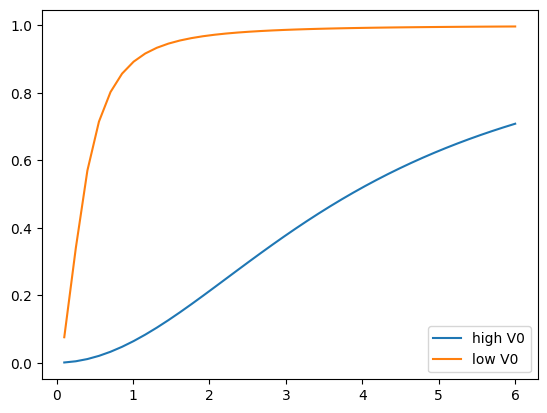

In [14]:
%matplotlib inline
plt.plot(v_val, Hfeq(hc_val, v_val, 3.85), label = "high V0")
plt.plot(v_val, Hfeq(hc_val, v_val, 0.35), label = "low V0")
plt.legend()
plt.show()
    

In [5]:
r, v, q = sm.symbols('r, v, q')

In [6]:
dvdt = r*v*(1-q*v) - hc*(v**2/(v**2 + v0**2))
dvdt

-h_c*v**2/(v**2 + v0**2) + r*v*(-q*v + 1)

In [7]:
hc0, t = sm.symbols('hc0, t')
hct = hc0*sm.sin(t)
hct

hc0*sin(t)

In [8]:
import random as rn
import pylab as pl

%matplotlib inline
def varying_extForce(N, Ts, ampl, mg):
    x0=pl.arange(0,N,Ts)
    sigs = np.zeros([10, len(x0)])

    phi = pl.linspace(0.001, 0.3, 100)
    amp = pl.linspace(2, 5, 100)

    for i in np.arange(10):

        amp1 = amp[rn.randint(0, 99)]
        phi1 = phi[rn.randint(0, 99)]

        y1= (amp1*pl.sin(phi1*pl.pi*x0) + mg)
        sigs[i:] = y1

    sigs1 = np.abs(ampl*np.apply_along_axis(np.mean, 0, sigs))
    plt.plot(sigs1)
    return(sigs1)

In [9]:
from scipy.integrate import solve_ivp
from scipy import stats
tend = 100
t_step = 0.01
t_span = (0, tend)
tint = np.linspace(0, tend, int(tend/t_step))
%matplotlib inline
hD= varying_extForce(tend+1, t_step, 2.51, 0.2)

In [10]:
def eqn1 (t, u, r, q, V0, tend, t_step, h):
    
    from scipy.interpolate import interp1d
    
    V = u
        
    xs = np.arange(len(h))
    y_interp = interp1d(xs, h)
    hrvc = y_interp(t/t_step)
    hC = hrvc
#     print(hC);
    dVdt = r*V*(1-q*V) - hC*(V**2/(V**2 + V0**2))
    
    return (dVdt)

In [11]:
import timeit

tend = 100
t_step = 0.01
t_span = (0, tend)
u0= [0.3]
p = (0.9, 1, 0.5, tend, t_step, hD)
start_time = timeit.default_timer()
sl2 = solve_ivp (eqn1, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

0.2644877729471773


In [12]:
tend = 100
t_step = 0.01
t_span = (0, tend)
u0= [0.3]
p = (1.5, 1, 1.995, tend, t_step, hD)
start_time = timeit.default_timer()
sl1 = solve_ivp (eqn1, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
print(timeit.default_timer() - start_time)

0.26257523498497903


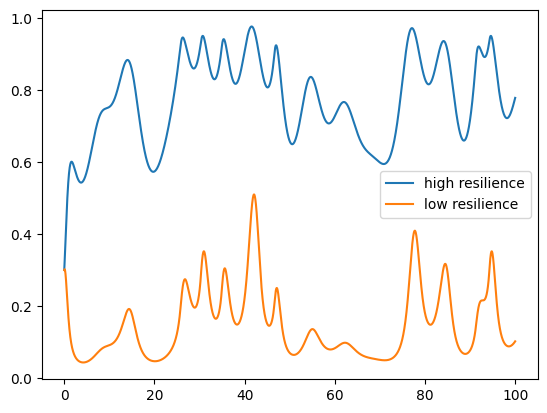

In [15]:
%matplotlib inline
#plt.plot(sl2.t, hD[0:10000], label = 'harvest')
plt.plot(sl1.t, sl1.y[0], label = 'high resilience')
plt.plot(sl2.t, sl2.y[0], label = 'low resilience')
plt.legend()
plt.show()

0.31133426100132056
0.29108073499810416
0
0.3387352840072708
0.3197019279905362
1
0.26288878900231794
0.26014446999761276
2
0.30558170498989057
0.3034138719958719
3
0.2721791460062377
0.2957354590034811
4
0.31189763799193315
0.2879570560035063
5
0.2768217450066004
0.2618182089936454
6
0.3169355599966366
0.28494496300118044
7
0.3241330430028029
0.30186860999674536
8
0.26711592500214465
0.2658204869949259
9
0.300144086999353
0.2929881970048882
10
0.2604972499975702
0.26603761801379733
11
0.310511513001984
0.2843295490019955
12
0.2824332849995699
0.27664651899249293
13
0.29115213100158144
0.2874161380022997
14
0.31600955199974123
0.2878057199995965
15
0.25763103300414514
0.2605959050124511
16
0.26788607699563727
0.24660146499809343
17
0.3350802310014842
0.28616835799766704
18
0.30402404999767896
0.2953752220055321
19
0.309539951995248
0.3012589930003742
20
0.28716300400265027
0.28865524400316644
21
0.280308529996546
0.25980362699192483
22
0.3043179109954508
0.2938613230071496
23
0.2502438

0.2620147779962281
194
0.2858984719932778
0.29113761099870317
195
0.2961344659997849
0.2710980749980081
196
0.2915754029963864
0.2739016840059776
197
0.24223381000047084
0.2481916300021112
198
0.26796428101079073
0.26582043401140254
199
0.26282179600093514
0.24999807300628163
200
0.3192612580023706
0.2849178629985545
201
0.28059310298704077
0.2596022810030263
202
0.37706425100623164
0.3320020129904151
203
0.34358940600941423
0.3137425099994289
204
0.3794987949950155
0.31826154999725986
205
0.2682964859995991
0.24922680700547062
206
0.2523515990033047
0.2545445510040736
207
0.2860456880007405
0.2842472979973536
208
0.23124671299592592
0.24588802800280973
209
0.2876762080122717
0.26928842801135033
210
0.2841075169999385
0.26858565300062764
211
0.215082568989601
0.22463853500084952
212
0.2973696280096192
0.2868254190107109
213
0.30256282999471296
0.29742391999752726
214
0.26747956599865574
0.26572273900092114
215
0.3023042229906423
0.28535568100051023
216
0.255443962989375
0.2544644320005

0.2858342069957871
0.28876759798731655
386
0.2774960109964013
0.26539981100359
387
0.40408975700847805
0.3232867750048172
388
0.2874096519954037
0.2654559789953055
389
0.305977651005378
0.2937908750027418
390
0.3206859480123967
0.31439322800724767
391
0.2590377559972694
0.28136803599772975
392
0.3277793629968073
0.2959704189997865
393
0.3932847770047374
0.34705649298848584
394
0.32403833299758844
0.29688480601180345
395
0.2876912439969601
0.29198798700235784
396
0.23940336899249814
0.2633660200081067
397
0.30782547300623264
0.28362995700445026
398
0.2432892439974239
0.25652829800674226
399
0.28069904500443954
0.2756018850050168
400
0.31055883898807224
0.2984440709988121
401
0.34180774800188374
0.3395132290024776
402
0.33297080799820833
0.28788668700144626
403
0.25557732400193345
0.24942635399929713
404
0.2376138879917562
0.24457266100216657
405
0.2994767479976872
0.28983028400398325
406
0.34954010699584614
0.31812354699650314
407
0.2530622800113633
0.2646403789985925
408
0.252167600003

0.2480101410037605
578
0.24180933499883395
0.25249880598858
579
0.33063135799602605
0.2949941429978935
580
0.35672872100258246
0.3084832719905535
581
0.2807793120009592
0.2731193789950339
582
0.34658673500234727
0.31845184198755305
583
0.3354825810092734
0.2996000359999016
584
0.29536339499463793
0.2899819540034514
585
0.30863088999467436
0.30122605100041255
586
0.3635243409953546
0.32551992298976984
587
0.2436722199927317
0.24988751200726256
588
0.36833204999857116
0.3259078109986149
589
0.32624932800536044
0.30563543099560775
590
0.30428224299976137
0.2671757100033574
591
0.1884971969993785
0.2048099679959705
592
0.2789756469865097
0.2610170390107669
593
0.34169624200148974
0.31487301300512627
594
0.3468408109911252
0.3402206189930439
595
0.2693645629915409
0.27473240401013754
596
0.35755426000105217
0.32992081900010817
597
0.3469139179942431
0.3010303750052117
598
0.26342652399034705
0.276326274004532
599
0.29268474600394256
0.2780152960040141
600
0.28566073600086384
0.2674385949940

0.31144615200173575
0.2845882969995728
770
0.1861401710048085
0.1903494190046331
771
0.31344208199880086
0.2767818340071244
772
0.22226310599944554
0.22979057299380656
773
0.2743328970100265
0.2816249839961529
774
0.23884156699932646
0.25216729199746624
775
0.3832587450015126
0.3327876190014649
776
0.21963988299830817
0.22134622400335502
777
0.3132197329978226
0.302955651000957
778
0.3114047009876231
0.3000132799934363
779
0.30787857600080315
0.27848185000766534
780
0.29319301299983636
0.2649675240099896
781
0.31644897199294064
0.29522799600090366
782
0.3892148630111478
0.34806230501271784
783
0.27721544199448545
0.26131455299037043
784
0.3169305219926173
0.2948237899981905
785
0.3601842889911495
0.3181744309986243
786
0.28392715701193083
0.27180029900046065
787
0.26758030900964513
0.2632590940047521
788
0.2502271420089528
0.25519023300148547
789
0.341621737999958
0.32220114399387967
790
0.25948146100563463
0.2514351879945025
791
0.2559437439922476
0.2724899379973067
792
0.295465946997

0.26446403699810617
961
0.27582632801204454
0.2720957540004747
962
0.36114837099739816
0.33366790000582114
963
0.28508655799669214
0.2663176750065759
964
0.36097831300867256
0.31974705500761047
965
0.27792441500059795
0.27455400400504004
966
0.31975816600606777
0.2948384229966905
967
0.27458833099808544
0.26936064500478096
968
0.30342040699906647
0.2863338330062106
969
0.284066834996338
0.2622787599975709
970
0.3034895710006822
0.29978592399857007
971
0.20216226199408993
0.21454980999988038
972
0.2469037849950837
0.23736573600035626
973
0.20959090199903585
0.22852012699877378
974
0.308681495997007
0.29664467100519687
975
0.27566386900434736
0.26447747700149193
976
0.2682497279893141
0.25664486800087616
977
0.4444998600083636
0.3722928809875157
978
0.3084774419985479
0.29224477599200327
979
0.3433559510012856
0.3146502080053324
980
0.37033664899354335
0.3110807300108718
981
0.3098505660018418
0.2927439699997194
982
0.3104996490001213
0.2853562999953283
983
0.2309304069931386
0.248724757

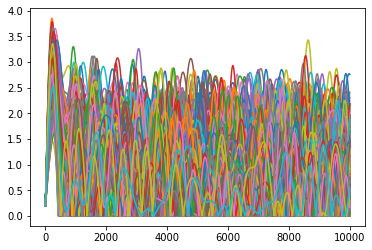

In [144]:
for i in np.arange(1000):

    hD = varying_extForce(tend+0.01, t_step, 0.995, 0.2)
    hD1 = hD[:-1]

    tend = 100
    t_step = 0.01
    t_span = (0, tend)
    u0 = [0.3]
    p = (0.9, 1, 0.5, tend, t_step, hD)
    start_time = timeit.default_timer()
    sl2 = solve_ivp (eqn1, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    print(timeit.default_timer() - start_time)
    
    
    tend = 100
    t_step = 0.01
    t_span = (0, tend)
    u0 = [0.3]
    p = (1.5, 1, 1.995, tend, t_step, hD)
    start_time = timeit.default_timer()
    sl1 = solve_ivp (eqn1, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
    print(timeit.default_timer() - start_time)
    

    id ='{0:04}'.format(i)
    sdms_df = pd.DataFrame({'low': sl2.y[0], 'high' : sl1.y[0], 'force': hD1})
    fnm = "/home/karthik/jupyter_dir/SDMS/ecological_model/simu_" + id + ".csv"
    sdms_df.to_csv(fnm)
    print(i)

In [22]:
import import_ipynb
%run /home/karthik/jupyter_dir/SDMS/IRI_calc.ipynb

In [23]:
def extremums(ts):
    
    from scipy.signal import argrelextrema

    fitt = ts

    maxs = np.array(argrelextrema(np.array(fitt), np.greater))
    mins = np.array(argrelextrema(np.array(fitt), np.less))
    pks = np.concatenate(([0], maxs.ravel(), mins.ravel(), [9999]))
    pks1 = np.sort(pks)
    
    cyc_pks1 = np.concatenate(([0], mins.ravel(), [9999]))
    
    return([pks1, cyc_pks1])

In [24]:
import os
fls1 = os.listdir('ecological_model/')
fls = list(filter(lambda f:f.endswith('.csv'), fls1))
len(fls)

1000

In [25]:
def extremums(ts):
    
    from scipy.signal import argrelextrema

    fitt = ts

    maxs = np.array(argrelextrema(np.array(fitt), np.greater))
    mins = np.array(argrelextrema(np.array(fitt), np.less))
    pks = np.concatenate(([0], maxs.ravel(), mins.ravel(), [9999]))
    pks1 = np.sort(pks)
    
    cyc_pks1 = np.concatenate(([0], mins.ravel(), [9999]))
    
    return([pks1, cyc_pks1])

In [26]:
beta_Frrts =np.zeros([1,7])

for i in np.arange(len(fls)):
    
    df0 = pd.read_csv('ecological_model/' + fls[i])
    df0 = df0.rename(columns = {'Unnamed: 0':'id'})
    
    df = df0.iloc[500:,:] 
    
    leco = resilience_calc_func(np.array(df.low))
    heco = resilience_calc_func(np.array(df.high))
    
    rrts0 = np.vstack((leco, heco))
    beta_Frrts = np.vstack((beta_Frrts, rrts0))

    print(i)

[  nan  329.  198.  218.  187.  173.  145.  106.  320.   35.  119.  116.
   nan   nan  391.  601.  512.  492.  563.  615. 1063.  375.  765.  885.]
[  35.  106.  116.  119.  145.  173.  187.  198.  218.  320.  329.  375.
  391.  492.  512.  563.  601.  615.  765.  885. 1063.]
[ 22. 115. 215.  nan 180.  nan 160. 159. 137.  nan 106. 360. 186. 143.
  nan 120. 308. 291. 402.  nan 549.  nan 473. 464. 488.  nan 543. 975.
 354. 634.  nan 802.]
[ 22. 106. 115. 120. 137. 143. 159. 160. 180. 186. 215. 291. 308. 354.
 360. 402. 464. 473. 488. 543. 549. 634. 802. 975.]
0
[351.  68.  nan 533. 216. 167.  nan  nan  nan  nan 157.  92. 449. 207.
  41.  84.  nan  nan  nan  nan  nan 168.  nan  nan  nan  nan 756.  nan
  nan 887. 390. 244.]
[ 41.  68.  84.  92. 157. 167. 168. 207. 216. 244. 351. 390. 449. 533.
 756. 887.]
[ 83. 112.  51.  54.  nan 176.  nan  nan  nan  nan  nan  nan  nan 130.
 159.  71.  nan 194. 116. 163. 343. 482. 456. 453.  nan 557.  nan  nan
  nan  nan  nan  nan  nan 659. 610. 392.  nan 

[  nan  210.  332.  125.  725.   91.   80.   nan   nan  112.   94. 1055.
  185.   nan  571.  419.   nan   nan  396. 1022.   nan   nan  734.   nan
   nan   nan]
[  80.   91.   94.  112.  125.  185.  210.  332.  396.  419.  571.  725.
  734. 1022. 1055.]
[ nan  nan 174. 393. 139.  95. 166. 118. 305.  nan 122. 141.  75. 258.
  nan 176.  nan  nan 490. 413. 501. 659. 380. 941. 345.  nan 653. 459.
  nan  nan  nan 567.]
[ 75.  95. 118. 122. 139. 141. 166. 174. 176. 258. 305. 345. 380. 393.
 413. 459. 490. 501. 567. 653. 659. 941.]
16
[ 40.  76.  78.  77.  nan 403. 167. 153. 296.  nan 289. 146. 307.  74.
 310. 298. 348. 232. 533.  nan  nan  nan 514.  nan  nan  nan 373.  nan
  nan 510. 402. 391.]
[ 40.  74.  76.  77.  78. 146. 153. 167. 232. 289. 296. 298. 307. 310.
 348. 373. 391. 402. 403. 510. 514. 533.]
[134. 113.  85. 129.  71.  87. 191. 135.  96.  nan 234. 136. 538. 104.
  98.  nan 225. 263. 363. 233. 455. 412. 388. 358. 484. 528. 284.  nan
 414.  nan  nan 303. 469.  nan 420. 434.]
[ 71. 

[357.  nan 134. 101. 139. 128.  78.  70. 436. 103.  nan  nan 174.  98.
 120.  nan 130.  91. 777.  nan 453. 274. 677. 322. 577.  nan  nan 332.
  nan  nan 284. 401. 399.  nan 344.  nan]
[ 70.  78.  91.  98. 101. 103. 120. 128. 130. 134. 139. 174. 274. 284.
 322. 332. 344. 357. 399. 401. 436. 453. 577. 677. 777.]
31
[776.  98.  81.  nan 506.  73.  nan  nan  nan 109.  nan  nan 151.  78.
  nan  nan  nan 161.  nan 730.  nan  nan  nan 305.  nan  nan  nan  nan
  nan  nan  nan 520.  nan  nan  nan 413.]
[ 73.  78.  81.  98. 109. 151. 161. 305. 413. 506. 520. 730. 776.]
[ 90. 183. 159. 103. 148. 161.  nan  nan  nan  nan  99.  67.  61.  nan
 103.  nan  nan  nan 145. 700. 677. 480. 812. 485. 270.  nan  nan  nan
  nan 392. 317. 393.  nan 452.  nan  nan  nan 368.]
[ 61.  67.  90.  99. 103. 103. 145. 148. 159. 161. 183. 270. 317. 368.
 392. 393. 452. 480. 485. 677. 700. 812.]
32
[ 65.  35. 110.  nan  nan 247. 237.  81.  74.  37.  84. 358.  23. 153.
 584. 447. 357. 751.  nan  nan 934. 528. 310. 456. 22

[ 86. 204.  nan  nan  nan 148. 104. 103.  43. 215. 103. 104. 100. 158.
 364.  71. 109.  55.  nan 232.  nan  nan  nan  nan  nan 373. 249. 312.
  nan  nan 351. 390. 561.  nan  nan 224. 316. 573.  nan 457.]
[ 43.  55.  71.  86. 100. 103. 103. 104. 104. 109. 148. 158. 204. 215.
 224. 232. 249. 312. 316. 351. 364. 373. 390. 457. 561. 573.]
[111.  nan  nan  nan  nan 126. 128. 110.  70. 105. 122. 125. 123. 181.
  87. 133. 114.  78.  nan  nan 196. 596.  nan  nan  nan  nan 352. 245.
 299. 469. 204. 335. 369. 512. 532. 335. 219. 304. 463.  nan  nan 441.]
[ 70.  78.  87. 105. 110. 111. 114. 122. 123. 125. 126. 128. 133. 181.
 196. 204. 219. 245. 299. 304. 335. 335. 352. 369. 441. 463. 469. 512.
 532. 596.]
47
[  nan   nan  607.   nan  212.  221.  115.  321.   97.  207.  584.   nan
  311.   nan   nan   nan   nan  491.  408.  408. 1071.  811.   nan   nan
   nan  682.]
[  97.  115.  207.  212.  221.  311.  321.  408.  408.  491.  584.  607.
  682.  811. 1071.]
[  nan  569.  129.   nan  173.  221.  1

[ 33.  nan  nan 210.  nan  nan 425.  67. 132. 105.  76.  nan  nan  nan
 115.  46.  67.  76. 431.  nan  nan  nan  nan  nan  nan 206. 297. 345.
 892.  nan  nan  nan 408. 299. 401. 237.]
[ 33.  46.  67.  67.  76.  76. 105. 115. 132. 206. 210. 237. 297. 299.
 345. 401. 408. 425. 431. 892.]
[ 41. 105.  nan  nan 172.  45.  41. 129.  nan 137. 119. 107.  nan  nan
 195. 113. 107.  99. 171.  nan 178. 386.  nan  nan 669. 361. 561. 411.
  nan 286. 321. 817.  nan  nan 297. 365. 278. 357. 203.  nan]
[ 41.  41.  45.  99. 105. 107. 107. 113. 119. 129. 137. 171. 172. 178.
 195. 203. 278. 286. 297. 321. 357. 361. 365. 386. 411. 561. 669. 817.]
63
[  85.  198.  282.  285.  128.  412.   nan  266.  165.   nan   nan  370.
   64.  756.  449.  487.  866.   nan   nan   nan 1036.   nan   nan   nan
   nan   nan]
[  64.   85.  128.  165.  198.  266.  282.  285.  370.  412.  449.  487.
  756.  866. 1036.]
[ nan 111. 245. 268. 368. 172. 128.  nan 234. 194.  61.  66.  97. 123.
  nan 664. 444. 472. 887. 600. 354.  na

[553.  nan 184. 112. 123.  81.  64.  nan  nan  nan  nan  nan 120. 197.
  nan  nan  96.  78.  nan 226. 177.  nan  nan 419. 265. 223. 396. 328.
  nan  nan  nan  nan  nan 692. 495.  nan  nan 579. 404.  nan 458. 435.]
[ 64.  78.  81.  96. 112. 120. 123. 177. 184. 197. 223. 226. 265. 328.
 396. 404. 419. 435. 458. 495. 553. 579. 692.]
78
[442. 110.  nan 187. 316.  50. 118. 291. 427.  56.  92. 690. 231.  nan
  nan  nan 121.  nan  nan  nan 337. 687.  nan  nan 516.  nan  nan 557.
  nan  nan]
[ 50.  56.  92. 110. 118. 121. 187. 231. 291. 316. 337. 427. 442. 516.
 557. 687. 690.]
[114.  nan  nan  nan 153.  81. 103.  nan 105.  nan 310. 137. 101. 162.
 618. 246.  nan  nan 423.  nan  nan  nan 510. 287. 312.  nan 580.  nan
 944. 428. 466.  nan 619. 564.  nan  nan]
[ 81. 101. 103. 105. 114. 137. 153. 162. 246. 287. 310. 312. 423. 428.
 466. 510. 564. 580. 618. 619. 944.]
79
[380.  nan 170. 373. 106. 211. 172. 102.  nan 193.  57. 169.  nan  nan
 470.  nan  nan  nan  nan 276. 886. 239. 582.  nan 522. 3

[ nan  nan 548.  nan 105. 107.  nan  nan 180.  nan  76.  55. 136. 159.
 538.  nan  nan  nan  nan  nan 636.  nan  nan  nan  nan  nan 461. 482.
 509. 526. 708.  nan]
[ 55.  76. 105. 107. 136. 159. 180. 461. 482. 509. 526. 538. 548. 636.
 708.]
[532.  85. 482.  nan  94.  nan 121.  86.  83.  nan  nan 126.  99.  nan
 135.  nan 155.  nan 532.  nan  nan  nan  nan  nan 486.  nan 376. 301.
 504.  nan  nan 396. 421.  nan 458.  nan 479.  nan 713.  nan]
[ 83.  85.  86.  94.  99. 121. 126. 135. 155. 301. 376. 396. 421. 458.
 479. 482. 486. 504. 532. 532. 713.]
94
[ nan 301. 222.  nan  nan 157. 147. 344.  nan 136. 132. 149. 155. 470.
  nan  nan 585. 599.  nan  nan 503.  nan  nan  nan 581. 576. 440.  nan
  nan  nan]
[132. 136. 147. 149. 155. 157. 222. 301. 344. 440. 470. 503. 576. 581.
 585. 599.]
[  nan   nan  249.  243.   nan   nan  142.  157.   78.   nan  135.  195.
  181.  182.   78.   nan   nan   nan  521.  570.   nan   nan  446.  698.
  313.   nan  521.  548.  417. 1081.  412.   nan]
[  78.   7

[ nan 359.  nan 160.  51.  nan 221.  nan 415. 560.  nan  nan 218.  nan
  nan  nan  nan  nan 411. 662.  nan 567.  nan  nan  nan  nan  nan  nan
  nan  nan]
[ 51. 160. 218. 221. 359. 411. 415. 560. 567. 662.]
[124. 113.  nan 153.  93.  nan  nan 193.  nan  nan  98.  95.  nan  nan
 219.  67.  76. 529. 324.  nan 377. 542.  nan  nan 499.  nan  nan 803.
 500.  nan  nan 587. 516.  nan]
[ 67.  76.  93.  95.  98. 113. 124. 153. 193. 219. 324. 377. 499. 500.
 516. 529. 542. 587. 803.]
110
[  75.  196.   nan  125.   60.   nan  186.  279.   69.   nan   nan  289.
  471.  349.   nan  627.  666.   nan  709. 1459.  688.   nan   nan 1031.]
[  60.   69.   75.  125.  186.  196.  279.  289.  349.  471.  627.  666.
  688.  709. 1031. 1459.]
[121.  nan 187.  nan  nan 110. 133.  nan 195.  nan 261. 695.  nan  90.
  nan  nan 256. 415.  nan 318.  nan  nan 515. 611.  nan 646.  nan  nan
  nan  nan 593.  nan  nan 926.]
[ 90. 110. 121. 133. 187. 195. 256. 261. 318. 415. 515. 593. 611. 646.
 695. 926.]
111
[110.  50. 

[ nan 543. 278.  98.  nan  nan  nan  nan  nan  nan 168.  nan 135.  95.
 483. 129.  74.  nan  nan  nan  nan 569. 405.  nan  nan  nan  nan  nan
  nan 345.  nan 491.  nan  nan 419. 583.  nan  nan]
[ 74.  95.  98. 129. 135. 168. 278. 345. 405. 419. 483. 491. 543. 569.
 583.]
125
[ nan 366.  18. 157.  nan 162. 195. 171.  59. 171.  44. 170.  66. 155.
  nan  nan  nan  nan  nan 418. 420.  nan 357. 315. 661. 414. 959. 728.
  nan  nan 310.  nan  nan  nan]
[ 18.  44.  59.  66. 155. 157. 162. 170. 171. 171. 195. 310. 315. 357.
 366. 414. 418. 420. 661. 728. 959.]
[311.  92.  85.  nan 143.  nan 144. 199. 202. 232. 219.  97. 211.  nan
 149.  nan  nan  nan  nan 328. 374.  nan 387.  nan 338. 289. 528. 332.
 939. 653. 671.  nan 305.  nan  nan  nan]
[ 85.  92.  97. 143. 144. 149. 199. 202. 211. 219. 232. 289. 305. 311.
 328. 332. 338. 374. 387. 528. 653. 671. 939.]
126
[ 90.  nan 518.  36.  nan 117. 153. 175.  nan  nan 286.  30. 352.  nan
 121. 470. 142.  14.  nan  nan  nan 424.  nan  nan  nan 458.  nan

[150. 150.  nan  nan  nan 174.  nan  nan 364.  nan 232. 126. 671. 562.
  nan  nan  nan  nan  nan  nan 365.  nan 683. 702.]
[126. 150. 150. 174. 232. 364. 365. 562. 671. 683. 702.]
[219. 180. 170.  nan  nan  nan  nan 249.  nan 154. 240. 630. 123. 136.
  nan 208. 153.  nan 636. 525.  nan  nan  nan  nan 377.  nan 629. 241.
  nan 769. 348.  nan 613. 640.]
[123. 136. 153. 154. 170. 180. 208. 219. 240. 241. 249. 348. 377. 525.
 613. 629. 630. 636. 640. 769.]
140
[ nan 304. 211.  nan 156. 341. 111.  58. 591.  65.  59.  92. 249.  nan
 791. 770.  nan  nan  nan 387.  nan  nan 756. 327.  nan  nan]
[ 58.  59.  65.  92. 111. 156. 211. 249. 304. 327. 341. 387. 591. 756.
 770. 791.]
[ nan 303.  nan 182.  nan  nan 138. 323. 143.  93. 120. 125. 197. 110.
 164.  nan 720.  nan 690.  nan  nan  nan  nan 371. 592. 556. 627. 332.
 536. 216.]
[ 93. 110. 120. 125. 138. 143. 164. 182. 197. 216. 303. 323. 332. 371.
 536. 556. 592. 627. 690. 720.]
141
[ 89. 108.  nan  nan 206.  76.  nan 409.  nan 247.  nan 462.  

[ 198.   93.   nan   nan   nan  731.  175.   nan  217.  292.  507.   nan
 1019.  707.   nan   nan   nan  793.  499.   nan  808.  706. 1105.   nan]
[  93.  175.  198.  217.  292.  499.  507.  706.  707.  731.  793.  808.
 1019. 1105.]
155
[365. 102.  34. 283.  67. 195.  14. 163. 227.  nan  nan 702. 765. 906.
 756. 708. 915. 690. 772.  nan]
[ 14.  34.  67. 102. 163. 195. 227. 283. 365. 690. 702. 708. 756. 765.
 772. 906. 915.]
[341. 160. 126. 335. 310. 106.  nan 175. 121. 176. 356.  nan  nan  nan
  nan 642. 630.  nan  nan 669.  nan 609. 759. 620. 825.  nan  nan  nan]
[106. 121. 126. 160. 175. 176. 310. 335. 341. 356. 609. 620. 630. 642.
 669. 759. 825.]
156
[  nan  559.  100.  238.   nan   nan  221.   nan  177.  220.  421.   nan
   nan 1591. 1398.   nan   nan  577.   nan  531.  491.  903.]
[ 100.  177.  220.  221.  238.  421.  491.  531.  559.  577.  903. 1398.
 1591.]
[  nan  500.  250.  290.   nan   nan  237.   nan  239.  275.  610.   nan
   nan 1469. 1337.   nan   nan  544.   nan  456

[1111.  249.  103.   26.  105.   nan   nan  216.   67.  103.   73.   57.
   nan  160.   60.   26.  100.   nan  354.  356.  592.  586.   nan   nan
  360.  559.  725.  581.  300.   nan  379.  409.  292.   nan]
[  26.   26.   57.   60.   67.   73.  100.  103.  103.  105.  160.  216.
  249.  292.  300.  354.  356.  360.  379.  409.  559.  581.  586.  592.
  725. 1111.]
[  86.  234.  117.   77.   nan  120.   nan   nan   nan  169.   88.   nan
  117.  177.   nan   nan  144.   99.  120.  145. 1037.  366.  318.  456.
   nan  520.   nan   nan   nan  334.  461.   nan  613.  479.   nan   nan
  348.  347.  261.  146.]
[  77.   86.   88.   99.  117.  117.  120.  120.  144.  145.  146.  169.
  177.  234.  261.  318.  334.  347.  348.  366.  456.  461.  479.  520.
  613. 1037.]
171
[ nan 349.  nan  nan  nan 199.  nan  nan 396.  nan 149. 163. 947. 141.
  nan 167.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 471.
  nan  nan 435.  nan 390.  nan]
[141. 149. 163. 167. 199. 349. 390. 396. 435. 471

[ nan 550.  nan 158.  nan  91.  50.  nan  nan  nan 172.  nan  nan  nan
  97.  nan  nan  nan 538.  nan  nan 551.  nan 287.  nan 363. 456.  nan
  nan  nan 253.  nan  nan  nan 616.  nan  nan  nan 893.  nan]
[ 50.  91.  97. 158. 172. 253. 287. 363. 456. 538. 550. 551. 616. 893.]
186
[  73.  229.   79.   nan  485.   nan   nan   nan  417.   nan  217.  109.
  380.   84.   nan   nan   nan   nan   nan   nan   nan   nan 1424.   nan
  313.   nan   nan  276.]
[  73.   79.   84.  109.  217.  229.  276.  313.  380.  417.  485. 1424.]
[  nan  116.   nan  104.   72.  113.   nan   nan   nan  422.  362.  214.
  118.  114.  157.   nan  521.   nan  549.  505.  437.   nan   nan   nan
 1324.  423.  300.  532.  346.  260.]
[  72.  104.  113.  114.  116.  118.  157.  214.  260.  300.  346.  362.
  422.  423.  437.  505.  521.  532.  549. 1324.]
187
[280.  85. 436.  nan  nan 184. 261. 120.  nan 443. 193.  49. 328.  nan
 357.  nan  nan  nan  nan 844. 311.  nan  nan  nan 435.  nan  nan  nan]
[ 49.  85. 120. 184.

[ nan 205.  85.  59. 197.  78.  nan  nan  nan 164. 129.  nan  nan 108.
 469. 118. 111. 408. 249.  nan 339. 484. 423. 352. 581.  nan  nan  nan
 399. 320.  nan  nan 594. 566. 546. 357. 834. 289.]
[ 59.  78.  85. 108. 111. 118. 129. 164. 197. 205. 249. 289. 320. 339.
 352. 357. 399. 408. 423. 469. 484. 546. 566. 581. 594. 834.]
201
[  nan  231.  204.  431.   37.  497.  133.  231.   nan   nan  373.   80.
  202.   nan 1152.   nan   nan   nan   nan  429.   nan   nan   nan   nan
  435.   nan]
[  37.   80.  133.  202.  204.  231.  231.  373.  429.  431.  435.  497.
 1152.]
[ nan  nan  nan 192. 237. 200.  86. 109. 134. 174.  nan 194.  83.  87.
 108. 124.  nan 178.  nan  nan  nan  nan  nan 696. 389. 535. 480. 390.
  nan 617. 423. 409. 347. 398.  nan  nan]
[ 83.  86.  87. 108. 109. 124. 134. 174. 178. 192. 194. 200. 237. 347.
 389. 390. 398. 409. 423. 480. 535. 617. 696.]
202
[ 12. 265.  nan 189. 240.  nan 142.  nan  nan  nan 458. 143. 219. 218.
  nan  nan  nan 764. 572.  nan  nan  nan  nan  nan 

[331.  nan 168. 379. 132.  19.  39.  nan 141.  nan  nan 176.  99. 116.
  nan  nan  nan  nan  nan 118.  78.  nan  nan 792. 520. 655. 343. 449.
  nan 379.  nan  nan 312. 399. 349.  nan  nan  nan  nan  nan 397.  nan]
[ 19.  39.  78.  99. 116. 118. 132. 141. 168. 176. 312. 331. 343. 349.
 379. 379. 397. 399. 449. 520. 655. 792.]
217
[ 63. 140.  nan  nan 511.  nan 261. 477. 170.  nan  nan 367.  15.  47.
 516.  nan  nan  nan  nan  nan 402. 989. 602.  nan  nan 880. 571.  nan]
[ 15.  47.  63. 140. 170. 261. 367. 402. 477. 511. 516. 571. 602. 880.
 989.]
[159. 156.  64.  56. 457.  nan  nan 255. 568. 205.  nan  nan 365. 115.
 149. 494. 536. 385.  nan  nan  nan  nan 336. 953. 559.  nan  nan 811.
 504.  nan]
[ 56.  64. 115. 149. 156. 159. 205. 255. 336. 365. 385. 457. 494. 504.
 536. 559. 568. 811. 953.]
218
[ nan 549. 112.  nan 141.  nan  nan  nan  nan 221.  nan 103.  39.  45.
  57.  nan  nan  nan 725.  nan 567.  nan  nan  nan  nan 950.  nan 947.
 577. 330.  nan  nan]
[ 39.  45.  57. 103. 112. 14

[ nan 258.  nan  nan  nan 208. 734. 238. 267.  nan 308.  nan  nan 200.
 393.  84.  nan  nan  nan  nan  nan  nan  nan 543.  nan  nan  nan  nan
  nan  nan  nan 353.]
[ 84. 200. 208. 238. 258. 267. 308. 353. 393. 543. 734.]
[486.  nan  nan  nan  nan 213. 638.  nan 250.  nan 239. 628. 143.  nan
  nan 172.  56. 144.  nan  nan  nan  nan  nan  nan  nan  nan 448.  nan
  nan  nan 268.  nan  nan 650. 352. 324.]
[ 56. 143. 144. 172. 213. 239. 250. 268. 324. 352. 448. 486. 628. 638.
 650.]
232
[ nan 352. 152.  nan 639. 155. 224. 187. 144.  nan  nan 130.  nan 183.
 178. 557.  nan  nan  nan  nan  nan 367. 303. 519. 628.  nan  nan 935.
  nan 438.  nan  nan]
[130. 144. 152. 155. 178. 183. 187. 224. 303. 352. 367. 438. 519. 557.
 628. 639. 935.]
[341.  95. 176. 102. 547. 170.  nan 200. 190. 165.  nan  nan 111.  nan
  nan 161. 174. 477.  nan 309. 461.  nan  nan 346.  nan 281. 485. 569.
  nan  nan 647.  nan  nan 390.  nan  nan]
[ 95. 102. 111. 161. 165. 170. 174. 176. 190. 200. 281. 309. 341. 346.
 390. 

[ nan  nan  93.  56. 214. 150.  nan 131.  nan 176. 380. 195.  74.  nan
  nan  nan 694. 334. 978. 723.  nan 780.  nan  nan  nan 750. 401.  nan]
[ 56.  74.  93. 131. 150. 176. 195. 214. 334. 380. 401. 694. 723. 750.
 780. 978.]
[ nan  nan  nan  91. 196. 225.  nan 144.  nan 141.  nan  nan 178. 121.
 232. 144.  nan  nan  nan  nan 551. 320. 938.  nan 652.  nan 660.  nan
  nan 667. 346. 729. 374.  nan]
[ 91. 121. 141. 144. 144. 178. 196. 225. 232. 320. 346. 374. 551. 652.
 660. 667. 729. 938.]
248
[ 570.  564.   nan  325.  197.  137.  477.   nan  147.   nan  164.   95.
  144.   nan  995.   nan 1122.  507.   nan   nan   nan  654.   nan  745.
  276.   nan]
[  95.  137.  144.  147.  164.  197.  276.  325.  477.  507.  564.  570.
  654.  745.  995. 1122.]
[  78.  704.   nan  296.  226.  160.  170.   nan  151.   nan  153.   nan
  156.  523. 1047.   nan 1045.  490.  785.  455.   nan  602.   nan  678.
   nan   nan]
[  78.  151.  153.  156.  160.  170.  226.  296.  455.  490.  523.  602.
  678.  704

[420.  nan 222.  nan 207.  74. 760. 306. 270. 184. 933. 115. 832.  nan
 453.  nan 495.  nan  nan 841. 337.  nan  nan 594.]
[ 74. 115. 184. 207. 222. 270. 306. 337. 420. 453. 495. 594. 760. 832.
 841. 933.]
[ nan 462.  nan 197.  nan 186. 109.  78.  nan 299.  nan 244. 200. 102.
 143.  nan 815.  nan 412.  nan 455. 694. 675.  nan 790.  nan 316. 620.
 833. 543.]
[ 78. 102. 109. 143. 186. 197. 200. 244. 299. 316. 412. 455. 462. 543.
 620. 675. 694. 790. 815. 833.]
263
[ 33. 565.  nan 149. 134. 160. 111.  nan 350.  nan  nan  nan 192.  nan
  nan  nan  nan  nan 685. 336. 542. 713.  nan 865.  nan  nan  nan  nan
  nan  nan]
[ 33. 111. 134. 149. 160. 192. 336. 350. 542. 565. 685. 713. 865.]
[ 97.  46.  nan  nan 121. 212. 163. 137.  nan  nan 293.  nan  nan  nan
 152. 121. 100. 416. 433.  nan  nan 568. 361. 502. 630.  nan  nan 781.
  nan  nan  nan 725. 374. 458.]
[ 46.  97. 100. 121. 121. 137. 152. 163. 212. 293. 361. 374. 416. 433.
 458. 502. 568. 630. 725. 781.]
264
[ nan 218. 179. 111.  10.  31. 

[  5.  nan 507.  nan 167. 169. 110. 258. 182.  nan 385.  nan 216.  nan
  nan  nan  nan  nan  nan  nan 504. 607. 262. 590. 183.  nan  nan  nan
 561.  nan  nan  nan]
[  5. 110. 167. 169. 182. 183. 216. 258. 262. 385. 504. 507. 561. 590.
 607.]
[135.  81.  89.  nan 141. 183.  nan 260. 167.  70. 139.  nan 197.  nan
  nan  nan 598. 673. 452.  nan 444. 567.  nan 532. 558. 511. 373.  nan
 498.  nan  nan  nan]
[ 70.  81.  89. 135. 139. 141. 167. 183. 197. 260. 373. 444. 452. 498.
 511. 532. 558. 567. 598. 673.]
279
[ 555.   nan   nan  170.   nan  407.  582.   nan  586.   nan  229.  109.
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan 1321.  820.]
[ 109.  170.  229.  407.  555.  582.  586.  820. 1321.]
[ 123.   nan   nan  151.   93.  158.   nan  243.  147.  150.   nan  204.
  184.  512.   nan   nan  457.  478.  333.   nan  693.  841.  515.   nan
 1097.  773.]
[  93.  123.  147.  150.  151.  158.  184.  204.  243.  333.  457.  478.
  512.  515.  693.  773.  841. 1097.]
280
[ nan 232

[  36.  303.   nan   nan  161.   nan  143.  984.  296.  553.  172.   nan
   nan   nan   nan 1017.   nan   nan   nan   nan   nan  701.]
[  36.  143.  161.  172.  296.  303.  553.  701.  984. 1017.]
[171.  nan  nan  nan 140.  nan 126. 115. 387.  nan  nan  nan 250.  93.
 261.  nan 474.  nan  nan  nan 821.  nan 579.  nan  nan  nan  nan  nan
 659. 491. 695.  nan]
[ 93. 115. 126. 140. 171. 250. 261. 387. 474. 491. 579. 659. 695. 821.]
295
[  nan   nan  375.   68.  366.   27.   nan   nan  292.   nan   nan  177.
   nan  230.   nan   nan  151.  186.   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan  584.   nan 1018.   nan   nan  579.  610.]
[  27.   68.  151.  177.  186.  230.  292.  366.  375.  579.  584.  610.
 1018.]
[ 28.  80. 119. 109.  96.  92.  92.  65. 104.  nan  nan 152.  nan 229.
  nan  nan  nan 130. 206. 295. 431. 350. 467. 327. 358. 288. 559. 263.
  nan  nan 524.  nan 969.  nan  nan  nan 511. 585.]
[ 28.  65.  80.  92.  92.  96. 104. 109. 119. 130. 152. 206. 229. 26

[ 51.  84.  70.  82. 113. 124. 243.  nan  nan  nan 142. 274.  nan 268.
  nan 137. 249. 450. 419. 414. 355. 483. 693.  nan  nan  nan 908. 426.
  nan 602.  nan  nan]
[ 51.  70.  82.  84. 113. 124. 137. 142. 243. 249. 268. 274. 355. 414.
 419. 426. 450. 483. 602. 693. 908.]
310
[ nan  nan 604. 111. 476.  nan 224.  89.  nan 175.  81.  nan 212.  nan
  nan 101.  46.  55.  nan  nan  nan  nan  nan  nan 286. 470.  nan 465.
 263.  nan 582.  nan  nan 754. 669.  nan]
[ 46.  55.  81.  89. 101. 111. 175. 212. 224. 263. 286. 465. 470. 476.
 582. 604. 669. 754.]
[ 47.  78.  73.  65.  nan 126.  81.  nan  nan 160.  93.  nan  nan 140.
 156.  nan 191.  nan  nan  nan  82.  nan  85.  nan  83. 124. 363. 225.
 434.  nan 461. 434.  nan  nan 292. 403.  nan  nan 417. 233.  nan 539.
  nan  nan  nan 541.  nan 439.  nan 432.]
[ 47.  65.  73.  78.  81.  82.  83.  85.  93. 124. 126. 140. 156. 160.
 191. 225. 233. 292. 363. 403. 417. 432. 434. 434. 439. 461. 539. 541.]
311
[ 60. 118. 251.  nan 224.  nan  nan 260. 116.

[506. 286. 263. 123. 278.  80. 325. 291. 686.  17. 193.  nan 469. 684.
 374. 477.  nan  nan  nan  nan 758. 576.]
[ 17.  80. 123. 193. 263. 278. 286. 291. 325. 374. 469. 477. 506. 576.
 684. 686. 758.]
[473.  nan 265. 266. 208.  nan 251. 104.  nan 323. 137. 109. 258.  nan
  nan  nan 410. 648. 323.  nan 447. 710.  nan 682. 621. 670. 568.  nan]
[104. 109. 137. 208. 251. 258. 265. 266. 323. 323. 410. 447. 473. 568.
 621. 648. 670. 682. 710.]
326
[ nan  nan 160. 539.  nan 269.  nan 126.  25. 159. 111.  58. 395. 206.
 159.  96. 221.  nan 115.  nan  nan  nan  nan  nan 506.  nan 381.  nan
  nan 282.  nan  nan  nan  nan 460. 699.  nan  nan]
[ 25.  58.  96. 111. 115. 126. 159. 159. 160. 206. 221. 269. 282. 381.
 395. 460. 506. 539. 699.]
[ nan  nan  nan 131. 460.  nan 255.  nan 113.  72.  nan 118.  75.  74.
  nan 185.  nan 107. 202.  nan 101.  nan  nan  nan  nan  nan  nan 512.
  nan 348. 399.  nan 279. 419. 349.  nan 601.  nan 417. 638.  nan  nan]
[ 72.  74.  75. 101. 107. 113. 118. 131. 185. 20

[ 405.   nan   nan   nan   nan   nan   nan  127.  198.  269.   nan  154.
   nan   nan   nan   nan   nan   nan   nan  836.  983. 1626.   nan  620.]
[ 127.  154.  198.  269.  405.  620.  836.  983. 1626.]
[ 186.   nan   nan   nan   nan   nan   nan  129.   nan  198.  365.   nan
  162.  343.   nan   nan   nan   nan   nan   nan  681.   nan  846. 1518.
   nan  520.]
[ 129.  162.  186.  198.  343.  365.  520.  681.  846. 1518.]
340
[  69.   18.   77.  264.   15.  273.   25.  156.   54.  309.  126.   82.
   75.   nan  106.  304.   50.   nan   nan  258.  206.  439.   64.   nan
   nan   nan   nan   nan   nan   nan   nan  338.  231.  458.   nan   nan
   nan  317.   nan   nan  484. 1049.]
[  15.   18.   25.   50.   54.   64.   69.   75.   77.   82.  106.  126.
  156.  206.  231.  258.  264.  273.  304.  309.  317.  338.  439.  458.
  484. 1049.]
[ nan 103.  nan  86.  64.  80.  84.  74.  nan  74.  48.  nan 127. 128.
  94.  nan  95.  71. 116.  nan  nan  nan 202.  nan 189. 445.  nan 362.
  nan 423. 2

[ nan 656.  58.  nan 391.  nan 112. 356. 168. 130. 202.  77. 550.  98.
 387.  nan  nan 210.  nan  nan  nan  nan  nan  nan 510. 693. 681. 394.
 323.  nan  nan  nan  nan  nan  nan 522.]
[ 58.  77.  98. 112. 130. 168. 202. 210. 323. 356. 387. 391. 394. 510.
 522. 550. 656. 681. 693.]
[ 78. 181. 216. 109. 125. 127. 249. 169. 111. 248. 229.  98. 280.  67.
 108. 210. 289. 123.  nan  nan 272. 179.  nan  nan 226. 244.  nan  nan
 837.  nan 249. 571.  nan  nan 248. 214. 496. 448.  nan  nan  nan  nan]
[ 67.  78.  98. 108. 109. 111. 123. 125. 127. 169. 179. 181. 210. 214.
 216. 226. 229. 244. 248. 248. 249. 249. 272. 280. 289. 448. 496. 571.
 837.]
355
[ 436.   79.  112.  478.  530.   nan   nan  631.  136.  724.   nan  897.
  683.   nan   nan   nan   nan 1257.   nan   nan]
[  79.  112.  136.  436.  478.  530.  631.  683.  724.  897. 1257.]
[ 155.  117.   nan  125.   nan  442.  106.   nan   nan  235.   nan  619.
  151.   58.   nan  426.  669.   nan  595.   nan 1062.  445.   nan   nan
  361.   nan 1

[ nan  nan  nan 561. 558.  48.  34.  nan  nan  nan 615.  nan  nan  nan
 219.  96.  nan  nan  nan  nan 225.  nan  nan  nan  nan 856. 282.  nan
  nan  nan  nan  nan  nan  nan  nan 238. 410.  nan  nan  nan  nan 281.]
[ 34.  48.  96. 219. 225. 238. 281. 282. 410. 558. 561. 615. 856.]
[ 74. 139. 113. 120.  nan 544. 115.  75.  46.  39.  57.  73.  nan  nan
  nan  nan 164. 103.  nan  nan  nan  nan 168. 634. 386. 343. 502.  nan
 819. 256. 390. 296. 439. 177. 422.  nan  nan  nan  nan 247. 349.  nan
  nan  nan  nan 280.]
[ 39.  46.  57.  73.  74.  75. 103. 113. 115. 120. 139. 164. 168. 177.
 247. 256. 280. 296. 343. 349. 386. 390. 422. 439. 502. 544. 634. 819.]
370
[506.  87. 176.  69.  52. 163.  nan  nan 184.  94.  nan 155.  nan  nan
  nan  nan  nan  nan  nan 317. 412.  nan  nan  nan  nan 457.  nan 755.
  nan  nan  nan  nan]
[ 52.  69.  87.  94. 155. 163. 176. 184. 317. 412. 457. 506. 755.]
[ 99.  nan  92.  98. 108.  92.  nan 164.  58.  83.  88.  nan 106.  nan
 146.  nan  nan  nan  nan 416.  nan

[124. 129. 148. 164.  nan  nan  93.  61. 104.  nan 199. 182.  nan 186.
  nan 127.  78. 410. 302. 384. 280.  nan  nan 434. 405. 845.  nan 584.
 505.  nan 579.  nan 383. 484.]
[ 61.  78.  93. 104. 124. 127. 129. 148. 164. 182. 186. 199. 280. 302.
 383. 384. 405. 410. 434. 484. 505. 579. 584. 845.]
384
[ nan 512. 196. 157.  92.  nan 157. 156. 136.  58.  nan 295.  nan  nan
  nan 151. 164. 260.  nan  nan 247. 273. 570.  nan 586. 547. 346.  nan
  nan  nan  nan  nan  nan 723.  nan 261.]
[ 58.  92. 136. 151. 156. 157. 157. 164. 196. 247. 260. 261. 273. 295.
 346. 512. 547. 570. 586. 723.]
[291.  47. 233. 151. 100.  nan 151. 214. 153.  83.  42.  81.  nan  nan
  nan 132.  nan 149. 189.  nan  nan 437. 293. 269. 499.  nan 538. 529.
 342. 432. 449. 269.  nan  nan  nan 650.  nan 541. 203.  nan]
[ 42.  47.  81.  83. 100. 132. 149. 151. 151. 153. 189. 203. 214. 233.
 269. 269. 291. 293. 342. 432. 437. 449. 499. 529. 538. 541. 650.]
385
[192.  51.  nan 226. 201. 162. 284. 149.  nan  nan  74. 217.  nan 

[  66.   75.  201.   nan  127.   48.  130.  356.   nan   nan  550.   92.
  163.  882.  406.  905.   nan  425.  488.   nan   nan   nan   nan 1080.
  571.  596.]
[  48.   66.   75.   92.  127.  130.  163.  201.  356.  406.  425.  488.
  550.  571.  596.  882.  905. 1080.]
[ 133.  220.  230.   nan  136.   97.   nan  129.  105.   nan   nan  653.
  132.  203.   nan  775.  388.  856.   nan  392.  437.   nan  562.  325.
   nan   nan 1058.  511.  584.   nan]
[  97.  105.  129.  132.  133.  136.  203.  220.  230.  325.  388.  392.
  437.  511.  562.  584.  653.  775.  856. 1058.]
400
[147.  47.  85. 186.  nan 122. 209. 128. 137.  nan 144.  13.  71. 391.
  nan  nan 201. 574. 416. 558. 540.  nan 619. 451. 406. 462.  nan 579.
 255.  nan  nan  nan  nan  nan]
[ 13.  47.  71.  85. 122. 128. 137. 144. 147. 186. 201. 209. 255. 391.
 406. 416. 451. 462. 540. 558. 574. 579. 619.]
[166. 127. 126.  nan 177.  nan 119. 212. 157. 165.  nan 133. 135.  93.
  94.  nan  nan 171. 539. 389. 512.  nan 507.  nan 554.

[225.  nan  nan 172.  nan  nan 237.  66.  nan 189.  90.  nan  nan 258.
  nan  nan 201.  62. 648.  89. 242.  nan  nan  nan  nan  nan  nan 517.
  nan 299.  nan  nan  nan  nan  nan  nan 489.  nan  nan  nan]
[ 62.  66.  89.  90. 172. 189. 201. 225. 237. 242. 258. 299. 489. 517.
 648.]
[223.  nan  nan 145.  54.  70. 116.  94.  nan  nan 164. 103.  72.  64.
 127.  nan  nan 195. 104.  71.  nan 105. 258.  nan  nan 643. 328. 368.
 212. 457.  nan  nan 287. 353. 385. 379. 225.  nan  nan 454. 331. 461.
  nan  nan]
[ 54.  64.  70.  71.  72.  94. 103. 104. 105. 116. 127. 145. 164. 195.
 212. 223. 225. 258. 287. 328. 331. 353. 368. 379. 385. 454. 457. 461.
 643.]
415
[ 307.  150.   nan  110.  330.  202.  120.  179.   nan   nan  132.   nan
  377.  363.   nan  668.  459. 1059.  524. 1120.   nan   nan   nan   nan]
[ 110.  120.  132.  150.  179.  202.  307.  330.  363.  377.  459.  524.
  668. 1059. 1120.]
[ 350.  158.   nan  113.   nan  274.  218.  199.  207.   nan  260.   nan
  132.  387.   74.  439.  3

[  nan   nan  551.  134.  194.   nan  136.  211.  140.  109.   nan  154.
  296.   nan   nan 1039.  670.  527.   nan  859.  711.  559.  629.   nan
  665.  596.]
[ 109.  134.  136.  140.  154.  194.  211.  296.  527.  551.  559.  596.
  629.  665.  670.  711.  859. 1039.]
430
[852.  nan  nan 293. 281. 119.  nan 389.  nan  nan  nan 214.  91.  nan
  nan  nan 537. 638.  nan  nan  nan  nan  nan  nan 395. 680.]
[ 91. 119. 214. 281. 293. 389. 395. 537. 638. 680. 852.]
[ 81.  nan  nan  nan 293. 371. 142. 137. 106.  nan  nan  nan 184. 111.
  nan 772.  nan  nan  nan 420. 629. 701. 739. 356.  nan  nan  nan 367.
 586.  nan]
[ 81. 106. 111. 137. 142. 184. 293. 356. 367. 371. 420. 586. 629. 701.
 739. 772.]
431
[ nan 705.  99.  24. 139. 174. 109.   8. 127. 155. 193.  87.  nan 164.
  89.  nan  nan  nan  nan 455. 379. 641. 412. 442. 598. 514. 497. 393.
 345.  nan 302. 408.  nan  nan]
[  8.  24.  87.  89.  99. 109. 127. 139. 155. 164. 174. 193. 302. 345.
 379. 393. 408. 412. 442. 455. 497. 514. 598. 641

[ 115.  146.  215.  464.   nan   nan  276.  109.   50.  100.   40.  701.
 1001.   nan   nan   nan   nan  744. 1057.  148.  845.  711.]
[  40.   50.  100.  109.  115.  146.  148.  215.  276.  464.  701.  711.
  744.  845. 1001. 1057.]
[232. 162.  nan 201. 110.  nan  nan  nan 232. 172.  nan 115. 296. 691.
 898.  nan 648. 404.  nan  nan  nan 628. 978.  nan 643. 699.]
[110. 115. 162. 172. 201. 232. 232. 296. 404. 628. 643. 648. 691. 699.
 898. 978.]
445
[160.  85.  nan 739. 478.  nan 524. 136. 171.  68. 314.  nan 241. 575.
  nan  nan  nan  nan  nan  nan 556. 371. 537. 526.  nan 428.]
[ 68.  85. 136. 160. 171. 241. 314. 371. 428. 478. 524. 526. 537. 556.
 575. 739.]
[ 184.  161.   nan  677.  553.  110.  100.   nan  129.  198.   91.   nan
  313.   nan  193.  514.   nan   nan   nan 1154.  558.  492.   nan  499.
  391.  469.   nan  480.   nan  396.]
[  91.  100.  110.  129.  161.  184.  193.  198.  313.  391.  396.  469.
  480.  492.  499.  514.  553.  558.  677. 1154.]
446
[ 37. 172. 492.  na

[149.  58. 255. 170. 253.  nan  nan 157.  95. 165. 200. 110.  82. 327.
 149.  94. 105. 307.  nan  nan  nan  nan  nan  nan 511. 673. 396. 406.
 237.  nan  nan 201. 574. 106.]
[ 58.  82.  94.  95. 105. 106. 110. 149. 149. 157. 165. 170. 200. 201.
 237. 253. 255. 307. 327. 396. 406. 511. 574. 673.]
[ nan 156.  78. 106.  nan  nan 140. 102.  nan  nan 137. 133. 186. 193.
 156.  98. 112.  nan 104. 163.  nan 300. 479. 221.  nan  nan 542. 225.
  nan  nan 447. 621. 385. 399. 210. 546. 309.  nan 494. 592.]
[ 78.  98. 102. 104. 106. 112. 133. 137. 140. 156. 156. 163. 186. 193.
 210. 221. 225. 300. 309. 385. 399. 447. 479. 494. 542. 546. 592. 621.]
460
[ nan 205.  nan 132. 114. 138. 133. 190.  62.  77.  94. 100. 135.  nan
  nan 920.  nan 649. 532. 580. 279. 517. 296. 724. 364. 413.  nan  nan]
[ 62.  77.  94. 100. 114. 132. 133. 135. 138. 190. 205. 279. 296. 364.
 413. 517. 532. 580. 649. 724. 920.]
[ nan  nan 168.  nan  nan 133.  nan 115.  nan 134.  nan 198. 121. 100.
 156. 125. 157.  60.  nan  nan

[163. 184. 469. 163.  68. 140. 135. 176. 363. 155. 136. 183.  94. 155.
  nan 290. 154.  nan  nan 410. 225.  nan  nan 324. 226. 245. 245.  nan
  nan 364. 249. 303. 254.  nan  nan  nan  nan  nan  nan  nan]
[ 68.  94. 135. 136. 140. 154. 155. 155. 163. 163. 176. 183. 184. 225.
 226. 245. 245. 249. 254. 290. 303. 324. 363. 364. 410. 469.]
475
[ 164.  110.  301.  171.  288.  207.   nan  619.  647.  709.   nan   nan
 1295.  560.   nan 1500.]
[ 110.  164.  171.  207.  288.  301.  560.  619.  647.  709. 1295. 1500.]
[ 224.  169.  378.   nan  278.   nan  198.   nan   nan  108.   nan  594.
  648. 1094.   nan 1220.   nan  503.   nan   nan  711.   nan]
[ 108.  169.  198.  224.  278.  378.  503.  594.  648.  711. 1094. 1220.]
476
[ nan 928.  nan  nan 260.  nan 137. 157. 150. 708.  nan  nan 155.  81.
  nan  nan  nan  nan 768.  nan 561. 406.  nan  nan  nan  nan 374. 571.]
[ 81. 137. 150. 155. 157. 260. 374. 406. 561. 571. 708. 768. 928.]
[ 51.  51.  nan  nan 226.  nan 133. 199.  nan 132.  50.  nan  n

[137. 184. 114.  nan 346.  nan  nan 199.  nan  nan 145. 161. 121. 194.
 174.  nan 543. 713. 115.  nan  nan  nan  nan 301.  nan  nan 516. 687.
 438. 224. 383.  nan]
[114. 115. 121. 137. 145. 161. 174. 184. 194. 199. 224. 301. 346. 383.
 438. 516. 543. 687. 713.]
490
[ 30.  nan  nan 729.  nan 340. 174. 109. 504.  nan 135. 141. 129.  nan
 165.  nan 176.  nan  nan  nan  nan  nan 442. 341.  nan  nan  nan 848.
 434. 226.  nan 508.  nan 470.]
[ 30. 109. 129. 135. 141. 165. 174. 176. 226. 340. 341. 434. 442. 470.
 504. 508. 729. 848.]
[133.  60. 158. 636.  nan  nan 250. 163. 128.  51.  nan 115. 162. 175.
  nan 135.  nan 160. 413. 517.  nan  nan  nan  nan 432. 320. 601. 436.
  nan 729. 426. 219.  nan 455.  nan 429.]
[ 51.  60. 115. 128. 133. 135. 158. 160. 162. 163. 175. 219. 250. 320.
 413. 426. 429. 432. 436. 455. 517. 601. 636. 729.]
491
[ 86. 109.  nan  nan 162.  nan 328. 110.  31.  68. 273.  16.  55.  43.
  85. 109.  nan 142. 474.  nan 253. 299. 272.  nan  nan  nan  nan  nan
 832. 166.  na

[ 33.  nan 152.  nan 121.  nan  nan 178.  52.  55.  nan 220.  82.  42.
  74.  nan 212.  nan 156.  nan  nan 301.  nan 626.  nan 663.  nan  nan
 640. 363. 478.  nan 325. 455. 371. 325.  nan 263.  nan 444.  nan  nan]
[ 33.  42.  52.  55.  74.  82. 121. 152. 156. 178. 212. 220. 263. 301.
 325. 325. 363. 371. 444. 455. 478. 626. 640. 663.]
505
[144.  61.  78. 106. 109.  nan 113.  nan  nan 311.  nan 177.  99. 152.
 268.  86.   5. 125. 155. 458. 444. 433. 445. 364.  nan  nan  nan  nan
  nan  nan 403. 669. 282. 395. 623. 174. 400. 253.]
[  5.  61.  78.  86.  99. 106. 109. 113. 125. 144. 152. 155. 174. 177.
 253. 268. 282. 311. 364. 395. 400. 403. 433. 444. 445. 458. 623. 669.]
[152. 103. 123. 137. 143.  nan 110.  72.  70. 106.  nan 165. 119.  nan
  nan 229.  96.  nan 135.  nan 442. 415. 410. 424. 347.  nan 481. 362.
 449. 292.  nan 383. 627.  nan  nan 400. 525.  nan 378.  nan]
[ 70.  72.  96. 103. 106. 110. 119. 123. 135. 137. 143. 152. 165. 229.
 292. 347. 362. 378. 383. 400. 410. 415. 424. 4

[ 10. 461. 358. 811. 270.  nan 155. 586.  nan 124. 318. 229. 167.  nan
  nan  nan  nan 440.  nan 503. 727.  nan  nan  nan 474.  nan]
[ 10. 124. 155. 167. 229. 270. 318. 358. 440. 461. 474. 503. 586. 727.
 811.]
[185.  92.  nan 286. 672. 302.  nan 145.  nan 589.  nan 107. 184. 225.
 179. 728. 412.  nan  nan  nan 492.  nan 429.  nan 704.  nan 606. 280.
 460.  nan]
[ 92. 107. 145. 179. 184. 185. 225. 280. 286. 302. 412. 429. 460. 492.
 589. 606. 672. 704. 728.]
520
[1096.   87.   nan   nan  238.   nan  276.   68.  911.   nan  108.   29.
   nan   nan  725.   nan   nan  371.   nan  443.   nan   nan   nan  683.
  664.   nan]
[  29.   68.   87.  108.  238.  276.  371.  443.  664.  683.  725.  911.
 1096.]
[108.  nan 104.  nan  nan 204.  nan 251.  91.  88.  nan 112. 138.  nan
 905.  nan 606.  nan  nan 332.  nan 429. 604. 851.  nan 543. 599.  nan]
[ 88.  91. 104. 108. 112. 138. 204. 251. 332. 429. 543. 599. 604. 606.
 851. 905.]
521
[651.  34. 168. 146.  nan 301.  97.  nan 127.  39. 108.  nan 2

[ nan  nan  nan  nan  nan 412. 174. 291. 280. 292. 424.  nan 235.  nan
  nan  nan  nan  nan  nan 666. 992. 482. 658. 676.  nan 658.]
[174. 235. 280. 291. 292. 412. 424. 482. 658. 658. 666. 676. 992.]
[ nan  80.  32.  70.  64.  50.  61. 206. 359.  nan 252. 266. 502.  nan
  nan 205.  nan 540. 272. 360. 328. 502. 355. 623. 995.  nan 439. 583.
 692.  nan  nan 586.]
[ 32.  50.  61.  64.  70.  80. 205. 206. 252. 266. 272. 328. 355. 359.
 360. 439. 502. 502. 540. 583. 586. 623. 692. 995.]
535
[623. 230. 363.  nan  nan  nan  nan 183. 163.  nan 198.  86.  49.  67.
 773. 153.  nan  nan  nan  nan  nan  nan  nan 801.  nan  nan  nan 371.
 233.  nan  nan 647.]
[ 49.  67.  86. 153. 163. 183. 198. 230. 233. 363. 371. 623. 647. 773.
 801.]
[516.  nan 215. 132.  nan  nan  nan  nan 144.  nan  nan 134.  76. 140.
 104. 120.  85. 612. 150.  nan  nan 387. 302.  nan  nan  nan  nan 559.
  nan  nan 381. 355. 165. 332. 219.  nan  nan 578.]
[ 76.  85. 104. 120. 132. 134. 140. 144. 150. 165. 215. 219. 302. 332.
 3

[226.  nan  nan 139. 208. 211.  83. 108. 178.  nan 172. 181. 128.  nan
 129.  47.  94. 387.  nan  nan 638. 532. 507. 527. 290. 463.  nan 636.
 511. 341.  nan 591. 387.  nan]
[ 47.  83.  94. 108. 128. 129. 139. 172. 178. 181. 208. 211. 226. 290.
 341. 387. 387. 463. 507. 511. 527. 532. 591. 636. 638.]
550
[323.  63.  75.  nan  nan 247.  nan  nan  91. 336.  19.  nan  nan  nan
  94. 321.  23. 122.  nan 129. 283.  56.  nan  nan 207.  nan  nan  nan
  nan  nan  nan  nan  nan 408.  nan  nan  nan  nan  nan 545. 231.  nan
  nan  nan 421.  nan]
[ 19.  23.  56.  63.  75.  91.  94. 122. 129. 207. 231. 247. 283. 321.
 323. 336. 408. 421. 545.]
[ 23.  nan 114.  41.  36.  66.  nan 250.  99.  85.  89.  nan  nan  nan
 218.  96.  85.  87.  nan  nan 116.  79. 113.  nan 271.  nan 535. 321.
 466. 221.  nan 340. 371. 288. 359.  nan  nan  nan 278. 395. 278. 446.
  nan  nan 513. 252. 360.  nan]
[ 23.  36.  41.  66.  79.  85.  85.  87.  89.  96.  99. 113. 114. 116.
 218. 221. 250. 252. 271. 278. 278. 288. 321.

[227.  58. 249. 141.  nan 268. 102.  nan 360.  66.  45. 209. 464. 253.
  nan  nan 940. 386. 438.  nan 351.  nan  nan  nan 496. 411.  nan  nan
 473.  nan]
[ 45.  58.  66. 102. 141. 209. 227. 249. 253. 268. 351. 360. 386. 411.
 438. 464. 473. 496. 940.]
[ 73. 103.  nan 207. 152.  nan  nan 228. 110.  74. 108. 111. 125. 197.
 400. 268.  nan 219. 865.  nan 373. 398.  nan  nan 356. 535. 514. 338.
 445. 373.  nan  nan 490.  nan]
[ 73.  74. 103. 108. 110. 111. 125. 152. 197. 207. 219. 228. 268. 338.
 356. 373. 373. 398. 400. 445. 490. 514. 535. 865.]
566
[  92. 1361.  174.   94.  421.  355.  150.  228.   nan  796.  162.   nan
   nan  688.  479.  531.  384.  455.   nan   nan   nan  552.]
[  92.   94.  150.  162.  174.  228.  355.  384.  421.  455.  479.  531.
  552.  688.  796. 1361.]
[ 200. 1228.  231.  202.   nan   nan  177.  254.  572.  122.  219.   nan
 1229.  663.  390.   nan   nan  388.   nan   nan  735.  528.]
[ 122.  177.  200.  202.  219.  231.  254.  388.  390.  528.  572.  663.
  735

[ 124.  146.  142.   70.   51.   31.  278.   nan   nan  253.   nan  711.
   63.   nan   nan  455.  371.  598.  284. 1410.   nan   nan  595.   nan
 1675.  501.]
[  31.   51.   63.   70.  124.  142.  146.  253.  278.  284.  371.  455.
  501.  595.  598.  711. 1410. 1675.]
[ 181.   nan  153.  121.   95.   nan  296.   nan   nan  219.   nan  775.
  185.  700.   nan  425.  343.  505.   nan 1374.   nan   nan  528.   nan
 1556.  494.]
[  95.  121.  153.  181.  185.  219.  296.  343.  425.  494.  505.  528.
  700.  775. 1374. 1556.]
582
[ 43. 205.  nan 220. 211.  nan  nan 166.  nan 548. 315. 427. 798. 699.
  nan 639. 600.  nan  nan  nan  nan  nan  nan  nan]
[ 43. 166. 205. 211. 220. 315. 427. 548. 600. 639. 699. 798.]
[  nan   93.   nan   nan  184.   nan  231.   nan  195.   nan   nan   nan
  138.   75.  103.  440.   90.   nan   nan  572.   nan   nan  615.   nan
  602.   nan  541.   nan   nan   nan  503.  529.  466. 1052.  384.   nan]
[  75.   90.   93.  103.  138.  184.  195.  231.  384.  440. 

[ nan 109. 166.  59.  nan 294. 252.  nan 143. 582. 140. 414.  nan  nan
  nan 191.  nan 465. 615. 569.  nan 689. 441.  nan  nan  nan  nan  nan
  nan  nan  nan 395.]
[ 59. 109. 140. 143. 166. 191. 252. 294. 395. 414. 441. 465. 569. 582.
 615. 689.]
597
[178. 643.  nan  nan  nan 142. 253.  52.  86.  nan 166. 268.  nan  nan
  nan  nan  nan 558. 673. 640. 856.  nan 631.  nan]
[ 52.  86. 142. 166. 178. 253. 268. 558. 631. 640. 643. 673. 856.]
[  nan  179.   94.   nan   nan   nan  154.   nan  264.  150.  127.   nan
  158.  344.   nan 1057.  529.   nan   nan   nan  488.   nan  625.  555.
  770.   nan  530.  525.]
[  94.  127.  150.  154.  158.  179.  264.  344.  488.  525.  529.  530.
  555.  625.  770. 1057.]
598
[323.  nan 170.  nan 407.  72.  nan 160.  63. 339.  94. 218. 116.  nan
 525.  nan  nan  nan  nan 382.  nan 534. 409. 406.  nan  nan  nan  nan]
[ 63.  72.  94. 116. 160. 170. 218. 323. 339. 382. 406. 407. 409. 525.
 534.]
[ nan 320.  nan 184.  83.  92. 163.  nan 168. 141.  nan 337. 11

[  3.  67.  77. 100.  nan 117. 102.  87. 161.  nan 121. 110.  71.  nan
 190.  97.  nan 104. 102.  nan  nan  nan 195. 392. 255. 343.  nan 589.
 252. 493. 363.  nan 337. 229. 483.  nan 437. 317.  nan 433. 451.  nan
  nan  nan]
[  3.  67.  71.  77.  87.  97. 100. 102. 102. 104. 110. 117. 121. 161.
 190. 195. 229. 252. 255. 317. 337. 343. 363. 392. 433. 437. 451. 483.
 493. 589.]
612
[424. 147. 279. 130.  nan  nan 145. 391.  39.  nan  nan 205. 150. 102.
  nan  nan  nan 637.  nan  nan  nan  nan 786.  nan  nan 668. 705. 431.]
[ 39. 102. 130. 145. 147. 150. 205. 279. 391. 424. 431. 637. 668. 705.
 786.]
[140. 150. 131. 143.  nan  nan  nan 112.  95. 106.  nan  nan  nan 187.
 149. 186.  nan 429. 661. 280. 588.  nan  nan  nan 551. 320. 623.  nan
  nan  nan 608. 604. 439.  nan]
[ 95. 106. 112. 131. 140. 143. 149. 150. 186. 187. 280. 320. 429. 439.
 551. 588. 604. 608. 623. 661.]
613
[ 90. 144.  nan  99.  58. 276. 297.  nan 117.  nan 181.  nan  nan 129.
 140.  30. 236.  64.  nan 370. 564. 390.  na

[ 566.   nan  116.  266.  352.  246.  102.  198.   69.  210.   nan   nan
  663.  987.  858. 1288.  560.  436. 1117.  712.]
[  69.  102.  116.  198.  210.  246.  266.  352.  436.  560.  566.  663.
  712.  858.  987. 1117. 1288.]
[ 118.   nan  177.  371.   nan  389.  310.  135.  206.  103.  237.  531.
   nan  580. 1027.   nan  834. 1266.  513.  427.  897.  657.]
[ 103.  118.  135.  177.  206.  237.  310.  371.  389.  427.  513.  531.
  580.  657.  834.  897. 1027. 1266.]
628
[ nan  nan 258.  44. 594.  nan  nan 177.  65.  39. 244.  96. 194.  nan
  nan  nan  91. 433. 100.  nan  nan  nan  nan 595.  nan  nan 399. 336.
 569. 542. 449. 461.  nan  nan  nan  nan  nan 487.]
[ 39.  44.  65.  91.  96. 100. 177. 194. 244. 258. 336. 399. 433. 449.
 461. 487. 542. 569. 594. 595.]
[117.  76.  87.  72.  48.  nan  nan  nan 138.  95.  77. 419. 118.  nan
 171.  nan  nan 229.  89.  71. 144. 369. 325. 243. 362. 405.  nan  nan
  nan 377. 312. 511. 709. 418.  nan 445.  nan  nan 329. 474. 374. 473.]
[ 48.  71. 

[ nan 155. 116. 585.  88. 136.  nan 177. 200.  74.  nan  nan 172. 371.
  88.  94.  nan  nan 198. 108.  nan 374.  nan  nan 266. 283.  nan 414.
 428. 491.  nan  nan  nan  nan 490. 271.  nan  nan 458. 531.]
[ 74.  88.  88.  94. 108. 116. 136. 155. 172. 177. 198. 200. 266. 271.
 283. 371. 374. 414. 428. 458. 490. 491. 531. 585.]
644
[249. 240. 114.  nan  94. 475. 124.  35. 135.  nan 206.  nan  nan 132.
  nan  nan 242. 172.  nan  nan  nan 520. 233.  nan  nan  nan 520. 138.
 357.  nan 344.  nan  nan  nan  nan  nan  nan  nan  nan  nan]
[ 35.  94. 114. 124. 132. 135. 138. 172. 206. 233. 240. 242. 249. 344.
 357. 475. 520. 520.]
[ 55.  nan 241. 170. 183.  98.  69.  nan 126.  nan 140.  nan  nan 160.
  nan  nan 112.  64.  72.  nan  nan 149.  67.  41. 239.  nan 513. 213.
 199. 389. 401.  nan 447.  nan 331.  nan  nan 326.  nan  nan 503. 293.
 443.  nan  nan 433. 423.  nan]
[ 41.  55.  64.  67.  69.  72.  98. 112. 126. 140. 149. 160. 170. 183.
 199. 213. 239. 241. 293. 326. 331. 389. 401. 423. 433. 

[  nan  868.  197.   98.   nan  302.   nan  497.  166.  129.   27.   nan
 1376.  786.  575.   nan  554.   nan  993.  683.  791.  707.]
[  27.   98.  129.  166.  197.  302.  497.  554.  575.  683.  707.  786.
  791.  868.  993. 1376.]
[1050.  294.   nan  358.   88.  192.  725.  336.  332.   nan   nan  585.
   nan  537.  547.   nan   nan  546.  462.   nan]
[  88.  192.  294.  332.  336.  358.  462.  537.  546.  547.  585.  725.
 1050.]
660
[  nan  373.   40.  253.   12.  199.  296.   nan   nan  179.   nan  503.
   nan   nan 1173.  629.  668.  506.  351.   nan   nan  577.   nan  896.]
[  12.   40.  179.  199.  253.  296.  351.  373.  503.  506.  577.  629.
  668.  896. 1173.]
[ 139.  306.   95.   nan  261.  107.  230.  324.   nan   nan  177.   nan
   nan  207.  239.   nan   nan 1081.   nan  578.  539.  467.  350.   nan
   nan  516.   nan   nan  389.   nan]
[  95.  107.  139.  177.  207.  230.  239.  261.  306.  324.  350.  389.
  467.  516.  539.  578. 1081.]
661
[ 85.  65. 174. 377.  76.

[477. 100.  nan 131.  70. 167.  nan 108. 128. 130.  nan  nan  94. 139.
  nan 153.  nan 105. 135. 104. 159.  nan 265.  nan 387. 437. 378.  nan
 483. 466. 204.  nan  nan 516. 500.  nan 335.  nan 413. 182. 393. 448.]
[ 70.  94. 100. 104. 105. 108. 128. 130. 131. 135. 139. 153. 159. 167.
 182. 204. 265. 335. 378. 387. 393. 413. 437. 448. 466. 477. 483. 500.
 516.]
675
[273. 132. 233.  nan  nan 239. 957.  79. 270. 113. 325. 488. 946.  nan
  nan  nan  nan 587. 678. 718.]
[ 79. 113. 132. 233. 239. 270. 273. 325. 488. 587. 678. 718. 946. 957.]
[366. 252. 145. 313.  nan  nan  nan 215. 196. 134. 516. 162.  nan 339.
 425. 945.  nan  nan  nan 978. 936. 532. 842. 644.]
[134. 145. 162. 196. 215. 252. 313. 339. 366. 425. 516. 532. 644. 842.
 936. 945. 978.]
676
[ 77.  60.  nan 197. 257.  nan  nan 676. 189.  nan  nan  nan 190. 762.
 563.  nan 576.  nan  nan  nan  nan 773.  nan  nan  nan 719.]
[ 60.  77. 189. 190. 197. 257. 563. 576. 676. 719. 762. 773.]
[136. 161.  nan 205.  nan 225.  87.  88.  77.  n

[ 428.  141.   nan   nan  101.  208.   67.   17.   nan  633.  256.  423.
  267.  106.   71.   nan  630.   nan   nan   nan   nan  340.   nan   nan
   nan  477.  565.  610. 1071.  285.]
[  17.   67.   71.  101.  106.  141.  208.  256.  267.  285.  340.  423.
  428.  477.  565.  610.  630.  633. 1071.]
[ 21.  87. 147.  nan  nan  85.  85. 100.  68.  65.  83. 274.  nan 343.
 260. 188. 592. 148. 169. 386. 573.  nan  nan 501. 199. 309. 422. 323.
 556. 497.  nan 549. 552.  nan  nan 280.]
[ 21.  65.  68.  83.  85.  85.  87. 100. 147. 148. 169. 188. 199. 260.
 274. 280. 309. 323. 343. 386. 422. 497. 501. 549. 552. 556. 573. 592.]
691
[124.  nan 911.  90. 210. 246.  76. 140.  nan 396. 146.  nan  nan  nan
 208.  nan  nan 636. 894.  nan 653. 766.]
[ 76.  90. 124. 140. 146. 208. 210. 246. 396. 636. 653. 766. 894. 911.]
[154.  nan 715.  nan 206.  nan 110.  nan 151.  nan  nan  nan  nan 362.
 203.  nan  nan  nan  nan  nan 635.  nan 540.  nan 791.  nan  nan  nan
  nan 527. 709.  nan]
[110. 151. 154. 203

[ nan 384.  nan  nan 175. 265.  20. 301.  31.  nan 111.  82.  nan 119.
 170. 159.  59.  nan 116.  nan 148. 110.  nan  nan  nan  nan  nan  nan
  nan  nan 263.  nan 729. 429.  nan 417. 463. 490. 300.  nan 490.  nan
 389. 263.]
[ 20.  31.  59.  82. 110. 111. 116. 119. 148. 159. 170. 175. 263. 263.
 265. 300. 301. 384. 389. 417. 429. 463. 490. 490. 729.]
[130. 138.  nan  nan 216. 147.  75. 194. 101.  69. 193. 192. 225. 139.
 241. 134. 254. 142. 145.  81. 346. 136. 273. 115. 232.  nan  nan  nan
  nan 277. 190. 273. 278.  nan  nan  nan  nan  nan  nan  nan  nan 498.
 338.  nan  nan  nan  nan 340.]
[ 69.  75.  81. 101. 115. 130. 134. 136. 138. 139. 142. 145. 147. 190.
 192. 193. 194. 216. 225. 232. 241. 254. 273. 273. 277. 278. 338. 340.
 346. 498.]
707
[ 639.   nan  161.   nan  199.  265.   nan  294.  299.   92.  129.  110.
   nan   nan   nan  623.   nan 1293.   nan   nan   nan  695.  395.  275.
   nan   nan]
[  92.  110.  129.  161.  199.  265.  275.  294.  299.  395.  623.  639.
  695. 1293

[ nan 159.  91.  nan  nan 140.  nan  nan 149.  58.  93.  96.  nan 139.
 108.  nan 114.  91. 129.  nan 354. 474.  nan  nan 582.  nan  nan 528.
 395. 270. 450.  nan 421. 683.  nan 553. 395. 432.]
[ 58.  91.  91.  93.  96. 108. 114. 129. 139. 140. 149. 159. 270. 354.
 395. 395. 421. 432. 450. 474. 528. 553. 582. 683.]
722
[ nan 917. 116. 354.  nan 212. 171. 120.  21. 192. 164.  nan 142. 168.
  nan  nan 809. 624.  nan 408. 264. 414.  nan  nan 388.  nan 623. 500.]
[ 21. 116. 120. 142. 164. 168. 171. 192. 212. 264. 354. 388. 408. 414.
 500. 623. 624. 809. 917.]
[ 41.  72.  nan 129.  nan  nan 296.  nan 187. 194. 129.  79.  nan 184.
  nan 143.  nan 157. 276. 626.  nan 726.  nan  nan 528.  nan 379. 251.
 371. 588.  nan 360.  nan 557.  nan 447.]
[ 41.  72.  79. 129. 129. 143. 157. 184. 187. 194. 251. 276. 296. 360.
 371. 379. 447. 528. 557. 588. 626. 726.]
723
[ 193.  218.  281.  226.   nan  352.  141.  131.   nan  121.  218.  543.
  319. 1344.  771.   nan  905.  221.  672.   nan  830.  510.]
[ 

[  nan  647.  129.   86.  100.  300.    6.  476.   nan   nan   nan  223.
  112.  208.  181.   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan  516.  272. 1019.   nan]
[   6.   86.  100.  112.  129.  181.  208.  223.  272.  300.  476.  516.
  647. 1019.]
[ 21.  65.  nan 136.  nan 107.  89.  71.  58.  nan  nan  nan  nan 175.
 172. 217. 550. 216. 266. 521.  nan 545.  nan 470. 257. 503. 417.  nan
  nan  nan  nan 464. 250.  nan  nan 952.]
[ 21.  58.  65.  71.  89. 107. 136. 172. 175. 216. 217. 250. 257. 266.
 417. 464. 470. 503. 521. 545. 550. 952.]
738
[ nan 527. 239. 209. 390.  87. 191. 158.   7. 139. 647.  nan  nan  nan
  89.  nan  nan 586.  nan  nan 338. 431. 482. 347.  nan  nan  nan  nan
  nan  nan]
[  7.  87.  89. 139. 158. 191. 209. 239. 338. 347. 390. 431. 482. 527.
 586. 647.]
[246.  75.  nan 211. 221. 118. 137. 197.  nan 132.  94.  nan 122.  87.
  nan  nan 193.  81.  nan  nan 461.  nan 543. 938. 373. 313. 435.  nan
 414. 318.  nan 424. 578.  nan  nan 231. 530.  na

[ 203.  126.  578.   nan  277.   nan  393.  155.  187.   48.  840.   nan
   nan   nan 1234.   nan 1115. 1159.  601.  721.]
[  48.  126.  155.  187.  203.  277.  393.  578.  601.  721.  840. 1115.
 1159. 1234.]
[ 233.  197.   91.   nan  273.   nan   nan  176.  183.  239.  103.  814.
  570.  523.   nan 1170.   nan   nan  346. 1063.  596.  657.]
[  91.  103.  176.  183.  197.  233.  239.  273.  346.  523.  570.  596.
  657.  814. 1063. 1170.]
754
[ nan 158.  nan  nan  93.  nan 298.  nan 111. 284.  nan  98. 317.  49.
  nan  nan 495.  nan 917.  nan  nan  nan  nan  nan  nan 802. 485.  nan
  nan 318.  nan  nan  nan  nan]
[ 49.  93.  98. 111. 158. 284. 298. 317. 318. 485. 495. 802. 917.]
[ nan 148.  nan  nan  nan  85.  35.  96.  nan  nan  97.  nan  nan 259.
  nan 105.  96. 109.  91.  69. 120.  nan 656.  nan  nan  nan 483. 354.
 258.  nan  nan 535.  nan  nan 468.  nan 391. 279. 406. 485. 424. 422.]
[ 35.  69.  85.  91.  96.  96.  97. 105. 109. 120. 148. 258. 259. 279.
 354. 391. 406. 422. 424. 

[158.  93.  60.  nan  nan 138. 200.  nan 117.  68.  nan 129.  86.  nan
  nan 183. 467. 503. 593. 417.  nan  nan 510. 455.  nan 370. 448.  nan
 398. 359.  nan  nan 671. 969.]
[ 60.  68.  86.  93. 117. 129. 138. 158. 183. 200. 359. 370. 398. 417.
 448. 455. 467. 503. 510. 593. 671. 969.]
769
[  nan  132.  194.  147.   67.  289.   nan   nan  150.   45.  125.  175.
   55.  122.  333.   nan   nan 1062.  239.  287.   nan   nan   nan   nan
  477.  315.  789.  675.  501.   nan   nan   nan]
[  45.   55.   67.  122.  125.  132.  147.  150.  175.  194.  239.  287.
  289.  315.  333.  477.  501.  675.  789. 1062.]
[ nan  nan 116.  nan 140.  79.  82.  nan  nan 121. 121. 145. 182. 134.
  nan 117.  89.  nan  nan  nan 948.  nan 286. 455. 264.  nan  nan 419.
 294. 734. 597. 479.  nan 557. 301.  nan]
[ 79.  82.  89. 116. 117. 121. 121. 134. 140. 145. 182. 264. 286. 294.
 301. 419. 455. 479. 557. 597. 734. 948.]
770
[531.  nan 256.  nan 337.  45.  80. 225. 220.  nan 159. 192.  65. 489.
 243.  nan  nan  n

[ nan 109. 132.  nan 176. 117.  nan 158. 101. 256.  nan  nan 180. 185.
  nan  96.  nan  nan 639. 656.  nan 335. 380.  nan 635. 463. 526.  nan
  nan 307. 362.  nan 553.  nan]
[ 96. 101. 109. 117. 132. 158. 176. 180. 185. 256. 307. 335. 362. 380.
 463. 526. 553. 635. 639. 656.]
784
[709.  nan 144.  nan  nan 266.  47. 328.  27. 289.  nan  nan  nan 235.
  28.  nan  nan 707.  nan  nan 531.  nan  nan  nan  nan  nan  nan  nan
 785.  nan]
[ 27.  28.  47. 144. 235. 266. 289. 328. 531. 707. 709. 785.]
[603.  nan  nan 173.  nan  nan  nan 259. 101. 109.  99. 156.  nan  nan
  nan 232. 140.  nan  nan  nan  nan 624.  nan  nan  nan 494. 421. 278.
 411. 231.  nan  nan  nan 682.  nan  nan]
[ 99. 101. 109. 140. 156. 173. 231. 232. 259. 278. 411. 421. 494. 603.
 624. 682.]
785
[154. 208. 312. 156.  nan 238.  nan 537.  16. 161. 187. 204. 216. 737.
  nan  nan 423.  nan  nan  nan  nan 487. 537. 540. 272. 308.]
[ 16. 154. 156. 161. 187. 204. 208. 216. 238. 272. 308. 312. 423. 487.
 537. 537. 540. 737.]
[  nan

[ nan  nan  nan 430.  nan  nan  nan  nan 285. 226.  nan 148.  78. 135.
 114. 308.  nan  nan  nan  nan  nan  nan  nan  nan 409. 270.  nan 769.
 744. 583.  nan  nan]
[ 78. 114. 135. 148. 226. 270. 285. 308. 409. 430. 583. 744. 769.]
[130.  59.  74.  95.  nan  nan  nan  nan  nan 249.  nan  nan 139. 148.
 214. 144.  72.  nan 980. 339. 323. 356.  nan  nan  nan  nan  nan 359.
  nan  nan 665. 678. 566. 574. 256.  nan]
[ 59.  72.  74.  95. 130. 139. 144. 148. 214. 249. 256. 323. 339. 356.
 359. 566. 574. 665. 678. 980.]
799
[ 547.   85.  629.  276.   nan   nan  136.  234.  107.  950. 1494.   nan
   nan  506.   nan   nan  770.  328.   nan   nan]
[  85.  107.  136.  234.  276.  328.  506.  547.  629.  770.  950. 1494.]
[  nan  615.  134.   80.   nan  243.   nan   nan   nan  148.  272.  125.
  660.   nan   nan 1423.  459.  540.   nan  439.   nan   nan   nan  685.
  328.   nan   nan   nan]
[  80.  125.  134.  148.  243.  272.  328.  439.  459.  540.  615.  660.
  685. 1423.]
800
[339.  21.  60.  5

[273.  57.  87.  84. 209.  nan 175.  nan 167. 158.  nan  nan 164.  nan
 149. 508. 164. 119. 477. 595. 356. 481. 478.  nan 387.  nan 504. 696.
  nan  nan 357.  nan  nan  nan 216. 424.]
[ 57.  84.  87. 119. 149. 158. 164. 164. 167. 175. 209. 216. 273. 356.
 357. 387. 424. 477. 478. 481. 504. 508. 595. 696.]
814
[486.  nan 183.  52. 719. 272. 200. 118.  58.  nan 370. 244.  nan 149.
  19.  nan  nan  nan  nan 399.  nan  nan 496. 984. 329.  nan  nan  nan
 292.  nan 577. 172.  nan  nan]
[ 19.  52.  58. 118. 149. 172. 183. 200. 244. 272. 292. 329. 370. 399.
 486. 496. 577. 719. 984.]
[ 83.  nan 161.  85. 633.  nan 234. 199. 159.  87.  68. 113. 269.  nan
 130.  nan  nan  nan 436.  nan 372.  nan  nan  nan 451. 907. 322. 437.
 350. 315. 310.  nan 474.  nan  nan  nan]
[ 68.  83.  85.  87. 113. 130. 159. 161. 199. 234. 269. 310. 315. 322.
 350. 372. 436. 437. 451. 474. 633. 907.]
815
[719. 298. 236. 159. 634. 138. 183.  nan 169.  81.  84.  nan 155.  82.
  88. 178.  nan 489. 703.  nan  nan 506. 298.

[ 156.  272.   nan  130.  179.   61.  206.  465.  201.  374.  195.   93.
  614. 1027.   nan  746.  642.  255.   nan   nan   nan   nan  393.   nan]
[  61.   93.  130.  156.  179.  195.  201.  206.  255.  272.  374.  393.
  465.  614.  642.  746. 1027.]
[ nan 151. 262. 464.  nan 127.  nan 169. 177. 214.  42. 119. 192.  95.
  nan 171. 115.  nan 564.  nan  nan  nan 683.  nan 591. 227. 402. 608.
 411. 620. 343.  nan 379. 364.]
[ 42.  95. 115. 119. 127. 151. 169. 171. 177. 192. 214. 227. 262. 343.
 364. 379. 402. 411. 464. 564. 591. 608. 620. 683.]
830
[ nan  nan  nan  nan  nan  nan 671. 208. 130.  nan  nan 109.  nan 110.
 162.  nan 144.  nan  nan  nan  nan  nan  nan  nan 495. 470.  nan  nan
 614.  nan 583. 411.  nan  nan]
[109. 110. 130. 144. 162. 208. 411. 470. 495. 583. 614. 671.]
[ 93. 252. 157.  63. 192.  95. 279. 320. 131. 121.  nan 264. 222.  nan
 295. 181. 298. 104.  nan 275. 183. 395. 292. 191. 292. 244.  nan  nan
 420.  nan  nan  nan  nan  nan 296.  nan  nan  nan  nan  nan]
[ 63.  

[316. 122. 153. 128.  nan 621.  nan 189.  nan  nan  nan  nan 170.  nan
  nan  nan 489. 666.  nan  nan  nan  nan 696.  nan  nan  nan  nan 171.
  nan  nan]
[122. 128. 153. 170. 171. 189. 316. 489. 621. 666. 696.]
[153. 167. 187. 185.  79. 148.  nan 161.  nan  nan  nan  nan 140. 101.
 332. 116. 464. 303. 425. 602. 441. 558. 492.  nan 607.  nan  nan  nan
  nan 520.  nan  nan  nan  nan]
[ 79. 101. 116. 140. 148. 153. 161. 167. 185. 187. 303. 332. 425. 441.
 464. 492. 520. 558. 602. 607.]
846
[ nan  nan 290.  nan 243. 542.  nan 130. 202. 350. 141.  nan 211.  nan
  nan  nan  nan  nan  nan  nan 636. 463. 391. 402.  nan 824.]
[130. 141. 202. 211. 243. 290. 350. 391. 402. 463. 542. 636. 824.]
[123. 165. 180.  nan  nan 205.  85.  nan  nan 112.  nan 197. 299. 146.
  nan 194.  nan 668. 777. 250.  nan  nan 875. 473.  nan  nan 531.  nan
 412. 417. 365.  nan 691.  nan]
[ 85. 112. 123. 146. 165. 180. 194. 197. 205. 250. 299. 365. 412. 417.
 473. 531. 668. 691. 777. 875.]
847
[  nan  185.   nan  252.  1

[ 534.  295.   nan   nan  139.   nan  401.   nan  165.  111.   nan  381.
   63.  102.   nan  464.   nan   nan  559.   nan 1109.   nan  470.   nan
   nan   nan  390.   nan]
[  63.  102.  111.  139.  165.  295.  381.  390.  401.  464.  470.  534.
  559. 1109.]
[ 469.   nan   nan   nan  131.   nan   nan  415.   nan  152.   nan  150.
  119.  124.  185.   nan   nan   nan   nan   nan  479.   nan   nan 1045.
   nan  418.   nan 1228.  359.  349.   nan   nan]
[ 119.  124.  131.  150.  152.  185.  349.  359.  415.  418.  469.  479.
 1045. 1228.]
861
[ nan 302. 130. 230.  nan 464.  83.  nan 221. 222. 174.  nan 308.  34.
  nan  nan 347.  nan  nan  nan 887.  nan 401. 306. 631.  nan 642.  nan]
[ 34.  83. 130. 174. 221. 222. 230. 302. 306. 308. 347. 401. 464. 631.
 642. 887.]
[117. 125. 165. 273. 162.  35. 126.  nan  nan 181.  nan 161.  nan 442.
  94. 503. 279. 312. 855. 371. 408. 547.  nan  nan 374.  nan 573.  nan
 762. 879.]
[ 35.  94. 117. 125. 126. 161. 162. 165. 181. 273. 279. 312. 371. 374.
 40

[ 849.   nan   nan   nan   nan   nan  181.  104.   nan  169.  111.  784.
   nan  205.   nan   nan   nan   nan   nan   nan   nan  408. 1087.   nan
  702.   nan   nan   nan  469.   nan]
[ 104.  111.  169.  181.  205.  408.  469.  702.  784.  849. 1087.]
[707.  nan  nan 288.  nan  nan 153. 143. 566.  nan  nan 143. 169.  23.
  nan  nan  nan 171.  nan  nan  nan  nan 347.  nan  nan 371.  nan  nan
  nan  nan 613. 792. 616.  nan  nan  nan 422.  nan]
[ 23. 143. 143. 153. 169. 171. 288. 347. 371. 422. 566. 613. 616. 707.
 792.]
876
[ nan  nan 650. 112.  nan 124. 134. 254.  98. 123.  nan  nan  nan  nan
 142. 279.  76.  nan  nan  nan  nan 439.  nan 395. 188. 777. 531. 500.
  nan  nan  nan  nan 143.  nan 390.  nan]
[ 76.  98. 112. 123. 124. 134. 142. 143. 188. 254. 279. 390. 395. 439.
 500. 531. 650. 777.]
[ 95.  nan 524.  nan 135.  nan 131.  nan 383.  nan 111.  nan 135.  nan
  nan  nan  nan  nan 123.  96. 141.  nan  nan  nan  nan  nan 393.  nan
 354.  nan 779.  nan 446.  nan 445.  nan  nan  nan  n

[  46.  135.  131.   nan  497.  101.  115.  102.  632.   nan  149.   nan
   nan  132.  651.  316.  851.   nan 1160.  509.  622.   nan   nan   nan
  467.   nan   nan  564.]
[  46.  101.  102.  115.  131.  132.  135.  149.  316.  467.  497.  509.
  564.  622.  632.  651.  851. 1160.]
[  98.   nan  155.   nan  122.   nan   nan   nan  479.  158.   nan  122.
  145.   54.   nan   nan  135.   nan   nan  133.  483.   nan  297.   nan
  588.   nan   nan   nan 1063.  480.   nan  545.  470.  429.   nan   nan
  409.   nan   nan  496.]
[  54.   98.  122.  122.  133.  135.  145.  155.  158.  297.  409.  429.
  470.  479.  480.  483.  496.  545.  588. 1063.]
891
[ nan 141. 167.  nan 198.  40. 623.  59. 265.  32.  nan 131.  nan 140.
  16. 314. 132.  nan  nan  nan 607. 320.  nan 433.  nan  nan  nan  nan
 766.  nan 432.  nan 478.  nan  nan 265.  nan  nan]
[ 16.  32.  40.  59. 131. 132. 140. 141. 167. 198. 265. 265. 314. 320.
 432. 433. 478. 607. 623. 766.]
[ nan 115. 197. 179. 189.  77. 102.  89.  58.  8

[ 62. 230.  nan 142.  nan  nan 586. 456. 172.  nan 351.  nan  nan 219.
 518. 821.  nan  nan  nan  nan  nan 714.  nan  nan  nan  nan  nan 465.]
[ 62. 142. 172. 219. 230. 351. 456. 465. 518. 586. 714. 821.]
[ nan 113. 226.  nan  nan 136.  74.  84.  69.  nan  nan 176.  44. 162.
  nan  nan 179.  nan 461. 756.  nan  nan 586. 313. 357. 496.  nan  nan
 765. 390. 312.  nan  nan 423.]
[ 44.  69.  74.  84. 113. 136. 162. 176. 179. 226. 312. 313. 357. 390.
 423. 461. 496. 586. 756. 765.]
906
[627. 128.  nan  nan 185. 151. 115. 267.  nan 222. 403.  63. 201.  nan
  nan 143.  15.  nan 512.  nan  nan 705. 230. 605. 323.  nan  nan  nan
 584. 930.  nan  nan 434.  nan]
[ 15.  63. 115. 128. 143. 151. 185. 201. 222. 230. 267. 323. 403. 434.
 512. 584. 605. 627. 705. 930.]
[ 89. 171. 234.  nan 150.  nan 115. 239.  nan 173. 350.  96. 200.  nan
  nan 117.  82. 578. 506. 367.  nan 637.  nan 543. 384.  nan 174.  nan
 523. 899.  nan  nan 381. 321.]
[ 82.  89.  96. 115. 117. 150. 171. 173. 174. 200. 234. 239. 32

[ nan 124. 202. 179. 150.  88. 272. 307. 215.  nan 137.  66.  nan 140.
 140. 104.  nan 162.  nan 700. 656. 480. 183. 523. 395. 583. 410.  nan
 513. 355.  nan 549. 390. 392.  nan 467.]
[ 66.  88. 104. 124. 137. 140. 140. 150. 162. 179. 183. 202. 215. 272.
 307. 355. 390. 392. 395. 410. 467. 480. 513. 523. 549. 583. 656. 700.]
921
[ 123.  866.  150.  112.  295.   nan   nan   nan  173.  245.   nan   nan
  700.  767.  897.   nan   nan   nan  785. 1261.]
[ 112.  123.  150.  173.  245.  295.  700.  767.  785.  866.  897. 1261.]
[ nan 141. 764.  nan 162. 188. 305.  nan  nan  nan 157. 257. 299.  nan
  nan  nan  nan  nan 635. 696. 798.  nan  nan  nan 698.  nan  nan  nan]
[141. 157. 162. 188. 257. 299. 305. 635. 696. 698. 764. 798.]
922
[492. 156. 463.  nan 141.  57.  nan 218. 132. 147. 530. 249. 171. 453.
  nan  nan  nan  nan 409. 522.  nan 618. 753. 261. 799. 718.  nan  nan]
[ 57. 132. 141. 147. 156. 171. 218. 249. 261. 409. 453. 463. 492. 522.
 530. 618. 718. 753. 799.]
[453.  nan 158. 417.  

[  nan   nan  340.  227.  175.  274.  393.   23.  368.  586.   nan   nan
 1169.  621.  793.   nan   nan  574.   nan   nan]
[  23.  175.  227.  274.  340.  368.  393.  574.  586.  621.  793. 1169.]
[  nan   nan   nan   nan  319.  245.  178.   nan  281.   87.  113.  521.
  147.   nan   nan   nan   nan 1067.  592.  722.   nan  983.  342.  489.
 1210.  507.]
[  87.  113.  147.  178.  245.  281.  319.  342.  489.  507.  521.  592.
  722.  983. 1067. 1210.]
937
[ 67. 106.  nan  nan 316.   8.  47. 148.  nan 265.  73. 120. 198.  nan
 193. 279. 422.  nan  nan  nan  nan 334. 334.  nan  nan  nan 917. 196.
 468.  nan 406. 606.]
[  8.  47.  67.  73. 106. 120. 148. 193. 196. 198. 265. 279. 316. 334.
 334. 406. 422. 468. 606. 917.]
[112. 118.  18.  51.  68.  86. 103. 159.  61.  88. 107. 335.  nan 180.
  nan 340. 162. 335.  98. 392. 531. 296. 339. 263. 300. 301. 444. 408.
 249.  nan  nan  nan 418.  nan 397. 379. 659.  nan]
[ 18.  51.  61.  68.  86.  88.  98. 103. 107. 112. 118. 159. 162. 180.
 249. 26

[405.  nan 179. 116.  nan 150. 574.  nan 132.  98. 531.  nan 232.  28.
 553.  nan  nan  nan 250. 392.  nan  nan  nan  nan 780.  nan  nan  nan
 542.  nan  nan  nan]
[ 28.  98. 116. 132. 150. 179. 232. 250. 392. 405. 531. 542. 553. 574.
 780.]
[364.  nan  nan 137.  nan 130.  54.  nan 121. 154. 466.  nan  nan  nan
 194.  95.  93.  nan  nan  nan  nan  nan 330.  nan 438. 462.  nan 670.
  nan  nan  nan  nan  nan 472. 598. 485.  nan  nan]
[ 54.  93.  95. 121. 130. 137. 154. 194. 330. 364. 438. 462. 466. 472.
 485. 598. 670.]
952
[360.  83. 372. 236.  nan 189. 325. 289.  nan 208. 137. 143.  nan  nan
 876.  nan  nan  nan 982. 517. 785.  nan 362. 556.  nan  nan]
[ 83. 137. 143. 189. 208. 236. 289. 325. 360. 362. 372. 517. 556. 785.
 876. 982.]
[308. 134.  nan 432.  nan  nan 184. 380.  nan 226.  nan 241. 183. 179.
 147.  nan 730.  nan 982.  nan  nan 864. 522.  nan 246.  nan 275. 503.
 678.  nan]
[134. 147. 179. 183. 184. 226. 241. 246. 275. 308. 380. 432. 503. 522.
 678. 730. 864. 982.]
953
[  97

[ 473.  164.  237.  125.  128.   nan  167.  117.  178.   35.  265.   82.
   96.   nan  478.  715.  568.  489.   nan  319. 1100.  498.  443.  394.
  684.  211.]
[  35.   82.   96.  117.  125.  128.  164.  167.  178.  211.  237.  265.
  319.  394.  443.  473.  478.  489.  498.  568.  684.  715. 1100.]
[ 424.  183.   nan  209.  146.  172.   nan  142.   nan  104.   nan  158.
  109.  232.   93.   nan   nan  465.   nan  639.  506.  475.   nan  300.
   nan 1005.   nan  449.  378.  404.  543.   nan]
[  93.  104.  109.  142.  146.  158.  172.  183.  209.  232.  300.  378.
  404.  424.  449.  465.  475.  506.  543.  639. 1005.]
967
[1007.   nan  705.  100.  299.  378.   nan  156.   nan  175.  216.  351.
   nan   nan   nan   nan   nan  754.   nan  258.   nan  268.   nan   nan]
[ 100.  156.  175.  216.  258.  268.  299.  351.  378.  705.  754. 1007.]
[  nan   nan   nan   nan   nan   nan  163.  234.  116.  101.   nan  168.
   nan   nan  190.   nan   nan   nan   nan   nan   nan  594.  531.  288.
 10

[ 87. 105.  nan 209. 166.  nan  nan  nan 175. 215. 200. 103.  nan 155.
  nan 645. 740.  nan 396. 643.  nan  nan  nan 618. 624. 453. 446.  nan
 347.  nan]
[ 87. 103. 105. 155. 166. 175. 200. 209. 215. 347. 396. 446. 453. 618.
 624. 643. 645. 740.]
982
[471. 289. 137. 127. 213.  93.  50.  60. 164.  91. 220. 211.  nan  98.
  nan 318.  nan 425. 471.  nan  nan 504. 293. 486. 411. 316. 289. 537.
  nan  nan  nan  nan]
[ 50.  60.  91.  93.  98. 127. 137. 164. 211. 213. 220. 289. 289. 293.
 316. 318. 411. 425. 471. 471. 486. 504. 537.]
[107. 286. 182. 154.  nan 139. 114.  90. 161. 131.  nan 208.  nan  99.
 537.  92.  nan 446. 427. 424. 644.  nan 469. 277. 432. 398. 291.  nan
 522.  nan  nan  nan 290.  nan]
[ 90.  92.  99. 107. 114. 131. 139. 154. 161. 182. 208. 277. 286. 290.
 291. 398. 424. 427. 432. 446. 469. 522. 537. 644.]
983
[ nan  nan  nan 569.  nan 142.  12.  nan  nan  nan 175.  nan  nan  nan
  nan  nan 347. 150. 258.  nan  nan  nan  nan  nan  nan 523. 390.  nan
  nan  nan  nan  nan  na

[ 66.  47.  81. 266.  nan  nan 147.  nan  nan  nan 232.  69.  66.  47.
  nan 155.  nan  nan 184. 420. 226. 615. 535.  nan  nan  nan  nan  nan
  nan  nan 319. 375. 459.  nan 547.  nan  nan 449.]
[ 47.  47.  66.  66.  69.  81. 147. 155. 184. 226. 232. 266. 319. 375.
 420. 449. 459. 535. 547. 615.]
[ nan 100. 142.  97.  nan 244.  nan  nan 122. 105.  87.  57.  76. 112.
 101.  97.  nan 159.  nan  nan 150.  nan 374. 202. 551.  nan 483.  nan
  nan 644. 408. 318. 490. 215. 299. 341. 415.  nan 511.  nan  nan 413.]
[ 57.  76.  87.  97.  97. 100. 101. 105. 112. 122. 142. 150. 159. 202.
 215. 244. 299. 318. 341. 374. 408. 413. 415. 483. 490. 511. 551. 644.]
997
[  49.   nan  304.   nan  218.   nan   nan   nan  193.   nan  120. 1294.
   nan  814.   nan  732.   nan   nan   nan  723.   nan  566.]
[  49.  120.  193.  218.  304.  566.  723.  732.  814. 1294.]
[ 132.   nan   nan  256.   nan   nan  232.  333.   nan   nan  209.   nan
  130. 1183.   nan   nan  690.   nan   nan  378.  345.   nan   nan  654.

In [28]:
beta_Frrts0 = np.delete(beta_Frrts, 0, 0)
beta_Frrts0 = pd.DataFrame(beta_Frrts0)
beta_Frrts0

,0,1,2,3,4,5,6
0,0.000919,0.221842,777.083333,0.125000,0.000291,0.122875,738.754977
1,0.000270,0.049755,581.000000,0.250000,0.000115,0.018076,1073.228773
2,0.000805,0.211630,573.625000,0.500000,0.000249,0.160043,876.758661
3,0.000249,0.047193,460.150000,0.450000,0.000139,0.016069,881.253965
4,0.000805,0.158260,577.000000,0.531250,0.000297,0.159450,839.716619
...,...,...,...,...,...,...,...
1995,0.000362,0.052584,446.428571,0.333333,0.000144,0.016637,658.796739
1996,0.000824,0.246983,718.818182,0.545455,0.000252,0.129918,1358.150815
1997,0.000185,0.056431,606.846154,0.538462,0.000096,0.010336,1275.972450
1998,0.000844,0.204498,615.428571,0.466667,0.000185,0.141796,954.424338


In [29]:
ret_zscore = beta_Frrts0

In [30]:
ret_zscore.drop(ret_zscore.columns[3], axis=1, inplace=True)

In [31]:
ret_zscore.head()

,0,1,2,4,5,6
0,0.000919,0.221842,777.083333,0.000291,0.122875,738.754977
1,0.000270,0.049755,581.000000,0.000115,0.018076,1073.228773
2,0.000805,0.211630,573.625000,0.000249,0.160043,876.758661
3,0.000249,0.047193,460.150000,0.000139,0.016069,881.253965
4,0.000805,0.158260,577.000000,0.000297,0.159450,839.716619


In [32]:
from scipy import stats

retrt = stats.zscore(ret_zscore, axis=0)
np.mean(retrt.iloc[:,1])

-2.4416024757556444e-15

In [33]:
retrt1 = np.apply_along_axis(np.mean, 1, retrt)
np.shape(retrt1)

(2000,)

In [34]:
resl_indx = 1/np.exp(retrt1); resl_indx

array([0.37814737, 1.70527483, 0.49612835, ..., 1.55401889, 0.53828743,
       2.12168933])

In [35]:
resl_indx0 = resl_indx.reshape(1000,2)
resl_indx0_df = pd.DataFrame(resl_indx0)
resl_indx0_df.columns = ['Low resilience', 'High resilience']
resl_indx0_df.to_csv('ecological_model_results.csv')

In [1]:
resl_indx0 = resl_indx.reshape(1000,2)

%matplotlib inline
plt.hist(resl_indx0[:,1] - resl_indx0[:,0])

NameError: name 'resl_indx' is not defined

In [38]:
np.quantile((resl_indx0[:,1] - resl_indx0[:,0]), [0.025, 0.5, 0.975])

array([0.8639974 , 1.51292469, 2.29016098])

In [39]:
np.mean((resl_indx0[:,1] - resl_indx0[:,0]))

1.530775759995344

## Gradient of harvesting pressure ##

In [287]:
def sdms_simu(j):

    iters = np.linspace(0.05, 3, 25)
    sdms_dt = np.zeros((1,4))
    
    for i in np.arange(len(iters)):
        
        tend = 100
        t_step = 0.01
        
        hD = varying_extForce(tend+0.01, t_step, iters[i], 0.2)
        hD1 = hD[:-1]

        
        t_span = (0, tend)
        u0 = [0.3]
        p = (0.9, 1, 0.5, tend, t_step, hD)
        start_time = timeit.default_timer()
        LP_deq = solve_ivp (eqn1, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
        print(timeit.default_timer() - start_time)


        t_span = (0, tend)
        u0 = [0.3]
        p = (1.5, 1, 1.995, tend, t_step, hD)
        start_time = timeit.default_timer()
        HP_deq = solve_ivp (eqn1, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-06, atol=1e-06)
        print(timeit.default_timer() - start_time)


        deq = np.vstack((LP_deq.y[0], HP_deq.y[0], hD1, np.repeat(iters[i], len(hD1))))
        sdms_dt = np.vstack((sdms_dt, np.transpose(deq)))
 
    sdms_dtt = np.delete(sdms_dt, 0, 0)
    id='{0:02}'.format(j)
    DF = pd.DataFrame(sdms_dtt)
    fnm = "/home/karthik/jupyter_dir/SDMS/simu_gradientF_ecological/simu_" + id + ".csv"
    DF.to_csv(fnm)
    print(j)

In [289]:
from joblib import Parallel, delayed
Parallel(n_jobs=8)(delayed(sdms_simu)(j) for j in np.arange(50))

0.4068799390079221
0.36697102899779566
0.3687422980001429
0.3755385260010371
0.4372938470041845
0.4497268340055598
0.42335090799315367
0.452820314996643
0.4469101540016709
0.47054815001320094
0.48981766300858
0.43741577900073025
0.48780188099772204
0.5141228669963311
0.6755001669953344
0.4823769259965047
0.56230877499911
0.5479490099969553
0.6088352549995761
0.5557890029886039
0.587500914989505
0.5525501959928079
0.7233463180018589
0.6387280909984838
0.7423555439891061
0.68058212599135
0.5725368130079005
0.5807994909991976
0.6433110819925787
0.6109156780003104
0.5809879580046982
0.5567548019898823
0.6617447359894868
0.6143276880029589
0.6329869110049913
0.6035811740002828
0.6975886829895899
0.6867854500014801
0.6723929639993003
0.6136030920024496
0.5032343769998988
0.5400386580004124
0.5235826560092391
0.5623088290012674
0.611614453009679
0.7057867410039762
0.7245245410013013
0.7286498440080322
0.7099563390074763
0.6178166619938565
5
0.33738334200461395
0.3331015199946705
0.39715915199

0.3676328509900486
0.299394878995372
0.34714353999879677
0.38993806501093786
0.5053523539972957
0.42398272300488316
0.521282492991304
0.4825486310000997
0.44663329698960297
0.43507438999949954
0.4576711600093404
0.4618908999982523
0.4259047320083482
0.46672421001130715
0.7985254269879078
0.5570722190022934
0.5083449029916665
0.4897131120087579
0.5429351180064259
0.48459261500102
0.5408028349920642
0.5177176230063196
0.5254808430036064
0.522749087002012
0.49918051800341345
0.5090285670012236
0.5359048780082958
0.4983271929959301
0.4365839360107202
0.494440284994198
0.6197031990013784
0.5838579650007887
0.6914685090014245
0.6689789249940077
0.5931505539920181
0.5535831559973303
0.6732254800008377
0.6613094189960975
0.7334227440005634
0.6430681469937554
0.6529358330008108
0.6509729139943374
0.684432937996462
0.7082694389973767
0.7565090020070784
0.8031437739991816
0.5997616289969301
0.5697121279954445
0.6421678440092364
0.6180871160031529
7
0.28045957900758367
0.2760814509965712
0.3799635

0.43878883600700647
0.33521062300133053
0.4359502860024804
0.39226267200137954
0.46653877300559543
0.41935533299692906
0.46208650300104637
0.4341721709934063
0.5196927249926375
0.5071402530011255
0.5229650050023338
0.5058838949917117
0.5441190639976412
0.5242987310048193
0.70446549000917
0.5644034139986616
0.5981303239968838
0.5446638889989117
0.6001783310057363
0.5513087319995975
0.6511934239970287
0.5582707150024362
0.6731006329937372
0.5790510749939131
0.6519072239898378
0.569977759005269
0.7494520090112928
0.6380188850016566
0.7471218739956385
0.5838945400028024
0.6753997170017101
0.6542181449913187
0.6156864679942373
0.5767876460013213
0.6763218830019468
0.6180200509988936
0.6941149780031992
0.6876798449957278
0.6516895610111533
0.5841644559986889
0.846480583990342
0.6894756779947784
0.6835274479963118
0.7484939749992918
0.6761109429935459
0.6677835739974398
0.6233870260039112
0.6188837950030575
0.600196731989854
0.6129437999916263
4
0.31900345800386276
0.2937617660063552
0.375928

0.3938641290005762
0.32940067299932707
0.41219363499840256
0.41578517299785744
0.39641913400555495
0.3841067769972142
0.49121790600474924
0.4777756330004195
0.322492911000154
0.3991181460005464
0.5875487660086947
0.5416615419962909
0.532408031009254
0.5107476120028878
0.6604870559967821
0.5667743489902932
0.6486600409989478
0.5947049069945933
0.5215116040053545
0.5015540129970759
0.6013290010014316
0.5983579960011411
0.5396703059959691
0.620894010993652
0.545045006001601
0.5278608819935471
0.5432636769983219
0.5171257600013632
0.7021163500030525
0.6388183920062147
0.5903340499935439
0.5153889610082842
0.5620408539980417
0.541600135009503
0.6358561350061791
0.6285799129982479
0.6311988520028535
0.5443720589973964
0.5697997600072995
0.6088605359982466
0.5805561710003531
0.5141461309976876
0.5099097469937988
0.6078845390002243
0.5226243849901948
0.5461420169885969
0.5834099590138067
0.6735206529992865
0.6126855279871961
0.5947459590097424
3
0.31523895100690424
0.31364267200115137
0.336226

In [328]:
rrts = np.zeros([1,8])
frc_idx = np.zeros([1,7])
niter = np.unique(df1.id)

for i in niter:
    
    df0 = df1[df1['id'] == i]
    
    rtts1 = resilience_calc_func( np.array(df0.LR[500:]))
    rtts2 = resilience_calc_func( np.array(df0.HR[500:]))
    
    rrts_low = np.hstack((['low'], rtts1))
    rrts_high = np.hstack((['high'], rtts2))
    
    rrts0 = np.vstack((rrts_low, rrts_high))
    rrts = np.vstack((rrts, rrts0))
    
    
    F_ts = np.array(df0.Hrv)
    cyc_pks = extremums(np.array(F_ts))[1]

    F_extrms = F_ts[extremums(F_ts)[0]]
    F_ampls = (np.ediff1d(F_extrms))[np.arange(0, len(np.ediff1d(F_extrms)), 2)]
    F_tmp = (np.ediff1d(cyc_pks))

    frc_idx0 = np.array([i, np.mean(F_ts), np.std(F_ts), np.mean(F_ampls), np.std(F_ampls), 
                         np.mean(F_tmp), np.std(F_tmp)])
    frc_id = np.vstack((frc_idx0, frc_idx0))
    frc_idx = np.vstack((frc_idx, frc_id))
    
    print(i)    

[ 60.  nan 238. 106.  nan  nan 300.  nan 196.  nan 196.  nan 149. 131.
 677.  nan 283. 541.  nan  nan 373.  nan 658.  nan 873.  nan 670. 922.]
[ 60. 106. 131. 149. 196. 196. 238. 283. 300. 373. 541. 658. 670. 677.
 873. 922.]
[134.  nan 173.  95.  nan  nan 223.  nan 180. 248. 168.  nan  nan 125.
 141. 731.  nan 317. 520.  nan  nan 406.  nan 645. 331. 863.  nan  nan
 631. 932.]
[ 95. 125. 134. 141. 168. 173. 180. 223. 248. 317. 331. 406. 520. 631.
 645. 731. 863. 932.]
0.05
[ 533.   nan  181.  122.   82.  509.   nan  604.  145.   nan   nan  274.
   nan 1242.   nan  824.  518.  508.  753.   nan  773.  474.   nan   nan
  746.   nan]
[  82.  122.  145.  181.  274.  474.  508.  509.  518.  533.  604.  746.
  753.  773.  824. 1242.]
[  58.  523.   nan  149.  126.   93.  452.   nan  558.  124.   nan   nan
  241.   nan  325. 1248.   nan  792.  521.  497.  806.   nan  813.  467.
   nan   nan  736.   nan]
[  58.   93.  124.  126.  149.  241.  325.  452.  467.  497.  521.  523.
  558.  736.  792.

[ 858.  316.   90.  798.  178.  410.  256.  445.  101.  240. 1095.  926.
  378. 1224.  571.  770.  544.  807.  398.   nan]
[  90.  101.  178.  240.  256.  316.  378.  398.  410.  445.  544.  571.
  770.  798.  807.  858.  926. 1095. 1224.]
[ 173.  410.  173.  262.  307.  219.  229.   nan  184.  694.  460.  964.
  517.  906.  656. 1015.   nan  581.]
[ 173.  173.  184.  219.  229.  262.  307.  410.  460.  517.  581.  656.
  694.  906.  964. 1015.]
2.0166666666666666
[ nan  nan 661.  nan 187. 347.  24.  47.  nan 426.  nan 241.  nan  85.
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 302.  nan  nan  nan
  nan 382.  nan  nan  nan  nan  nan  nan]
[ 24.  47.  85. 187. 241. 302. 347. 382. 426. 661.]
[ 20.  60.  28.  63.  nan  nan 197. 100. 132. 119.  86.  82.  nan  nan
  nan  nan  nan 108. 101.  46.  62.  59. 146. 498. 241. 471.  nan  nan
 562. 284. 245. 283. 387. 360.  nan  nan  nan  nan  nan 563. 542. 287.
 363. 321.]
[ 20.  28.  46.  59.  60.  62.  63.  82.  86. 100. 101. 108. 119. 132.

In [329]:
np.shape(frc_idx)

(51, 7)

array([['low', '6.471774355535525e-05', '0.01631011595334631',
        '628.4615384615385', '0.4285714285714286',
        '3.229466774811197e-05', '0.006338716342656235',
        '981.9229654403505', '0.05', '0.03409715414799969',
        '0.02476331989284371', '0.039773738831857135',
        '0.02848345894918646', '588.1764705882352', '271.89297965843707'],
       ['high', '1.1841175525427935e-05', '0.002735975772113101',
        '586.2142857142857', '0.4', '5.7004881776921865e-06',
        '0.0007558976997521093', '887.8431070031806', '0.05',
        '0.03409715414799969', '0.02476331989284371',
        '0.039773738831857135', '0.02848345894918646',
        '588.1764705882352', '271.89297965843707'],
       ['low', '0.0002561671039227302', '0.06268170261203093',
        '723.6666666666666', '0.3846153846153846',
        '0.00012607474652087997', '0.017657998403290884',
        '1010.9112500885304', '0.1729166666666666',
        '0.13118580332861002', '0.09816658439782346',
        '0

In [290]:
import os
fls1 = os.listdir('simu_gradientF_ecological/')
fls = list(filter(lambda f:f.endswith('.csv'), fls1))
len(fls)

50

In [353]:
rrts_dt0 = np.zeros((1, 16))

for i in np.arange(len(fls)):
    
    df1 = pd.read_csv('simu_gradientF_ecological/' + fls[i])
    df1.columns = ['no', 'LR', 'HR', 'Hrv', 'id']
    
    rrts = np.zeros([1,8])
    frc_idx = np.zeros([1,7])
    niter = np.unique(df1.id)

    for j in np.arange(len(niter)):

        df0 = df1[ df1['id'] == niter[j] ]

        rtts1 = resilience_calc_func( np.array(df0.LR[500:]))
        rtts2 = resilience_calc_func( np.array(df0.HR[500:]))

        rrts_low = np.hstack((['low'], rtts1))
        rrts_high = np.hstack((['high'], rtts2))

        rrts0 = np.vstack((rrts_low, rrts_high))
        rrts = np.vstack((rrts, rrts0))

        
        F_ts = np.array(df0.Hrv)
        cyc_pks = extremums(np.array(F_ts))[1]

        F_extrms = F_ts[extremums(F_ts)[0]]
        F_ampls = (np.ediff1d(F_extrms))[np.arange(0, len(np.ediff1d(F_extrms)), 2)]
        F_tmp = (np.ediff1d(cyc_pks))

        frc_idx0 = np.array([niter[j], np.mean(F_ts), np.std(F_ts), np.mean(F_ampls), np.std(F_ampls), 
                             np.mean(F_tmp), np.std(F_tmp)])
        frc_id = np.vstack((frc_idx0, frc_idx0))
        frc_idx = np.vstack((frc_idx, frc_id))
   
        
    rrts_dat = np.hstack((rrts, frc_idx))   
    rrts_dt = np.delete(rrts_dat, 0, 0)
    rrts_dt = np.hstack((rrts_dt, np.reshape(np.repeat(i, len(rrts_dt)), [50, 1]) ))
    
    rrts_dt0 = np.vstack((rrts_dt0,rrts_dt))
    print(j)


[ 99. 354.  nan 174.  93. 244.  nan  nan  nan 207. 159. 159. 165.  74.
 148. 223. 717. 466.  nan 484. 443. 423.  nan  nan  nan 485. 426. 749.
 549. 416. 368. 349.]
[ 74.  93.  99. 148. 159. 159. 165. 174. 207. 223. 244. 349. 354. 368.
 416. 423. 426. 443. 466. 484. 485. 549. 717. 749.]
[136. 320.  nan 145.  96. 205.  nan  nan  nan 178. 143. 156. 161.  89.
 140. 184. 724. 525.  nan 472. 437. 435.  nan  nan  nan 487. 432. 729.
 548. 417. 385. 379.]
[ 89.  96. 136. 140. 143. 145. 156. 161. 178. 184. 205. 320. 379. 385.
 417. 432. 435. 437. 472. 487. 525. 548. 724. 729.]
[998.  nan 304. 218.  nan  nan 202. 143. 529.  nan 143.  nan  nan 796.
 437.  nan  nan 776. 522. 668.  nan  nan]
[143. 143. 202. 218. 304. 437. 522. 529. 668. 776. 796. 998.]
[784.  39.  nan 284. 207.  nan  nan 177. 159. 446.  nan 310. 120. 788.
 235.  nan 778. 467.  nan  nan 723. 540. 713.  nan 444. 694.]
[ 39. 120. 159. 177. 207. 235. 284. 310. 444. 446. 467. 540. 694. 713.
 723. 778. 784. 788.]
[  nan   nan  556.   nan 

[ nan 141. 194.  nan 134. 127. 156.  70. 186.  nan  nan  nan 190. 136.
 127. 227.  nan 505. 830.  nan 457. 399. 596. 564. 566.  nan  nan  nan
 747. 335. 459.  nan]
[ 70. 127. 127. 134. 136. 141. 156. 186. 190. 194. 227. 335. 399. 457.
 459. 505. 564. 566. 596. 747. 830.]
[173. 112. 207.  80.  68. 211. 133.  nan 124.  23.  nan 120. 253. 407.
  47.  84. 103.  nan 773. 456. 445. 469. 442. 364.  nan 429. 449.  nan
 546.  nan  nan 385. 590. 339.]
[ 23.  47.  68.  80.  84. 103. 112. 120. 124. 133. 173. 207. 211. 253.
 339. 364. 385. 407. 429. 442. 445. 449. 456. 469. 546. 590. 773.]
[ 93. 134. 230. 102. 114. 238. 150.  nan  nan 116.  72.  nan 126. 322.
  85.  96. 117. 141. 170. 717. 471. 415. 430. 445. 344.  nan  nan 391.
 407.  nan 487. 880. 382. 364. 560. 333.]
[ 72.  85.  93.  96. 102. 114. 116. 117. 126. 134. 141. 150. 170. 230.
 238. 322. 333. 344. 364. 382. 391. 407. 415. 430. 445. 471. 487. 560.
 717. 880.]
[196.  68. 113.  nan 111.  75.  81.  nan  86. 455. 123. 226. 141. 418.
  nan 3

[522.  90. 163. 486. 228.  nan  nan 106. 502. 141. 384. 918. 783.  nan
  nan 783.  nan  nan  nan  nan  nan  nan]
[ 90. 106. 141. 163. 228. 384. 486. 502. 522. 783. 783. 918.]
[ nan 324.  nan 231. 285. 963.  nan  nan 253.  nan 163.  nan 645.  nan
 648.  nan  nan  nan  nan 554.  nan 988.]
[163. 231. 253. 285. 324. 554. 645. 648. 963. 988.]
[ nan  nan 115.  nan  nan  nan 524.  nan 162.  61. 110.  96.  nan  nan
  nan 151. 344. 145.  40.  nan  nan  nan  nan  nan  nan  nan  nan 423.
 346. 209. 549.  nan  nan  nan  nan  nan 695. 548.]
[ 40.  61.  96. 110. 115. 145. 151. 162. 209. 344. 346. 423. 524. 548.
 549. 695.]
[ nan  nan 159.  97.  74.  61.  58.  64.  nan 122.  95. 132.  92.  nan
  nan  nan  nan  nan 116. 115. 153. 105.  nan  nan 266. 365. 332. 392.
 331. 460.  nan 392. 329. 231. 478.  nan  nan  nan  nan  nan 525. 341.
 653. 499.]
[ 58.  61.  64.  74.  92.  95.  97. 105. 115. 116. 122. 132. 153. 159.
 231. 266. 329. 331. 332. 341. 365. 392. 392. 460. 478. 499. 525. 653.]
[ nan 651. 135.

[  nan  242.   nan  149.  489.   nan   nan   98.  131.  172.   nan   nan
   nan   nan  489.   nan   nan   nan   nan   nan 1061.  575.   nan   nan
   nan   nan]
[  98.  131.  149.  172.  242.  489.  489.  575. 1061.]
[ nan  nan  nan 191. 150.  nan  nan  nan 120.  nan 256.  nan 223. 133.
  92.  52.  nan  nan  nan 541. 390.  nan  nan  nan 786.  nan 355.  nan
 745. 450. 437.  nan]
[ 52.  92. 120. 133. 150. 191. 223. 256. 355. 390. 437. 450. 541. 745.
 786.]
[ nan  nan 384. 591. 131.  nan 173.  nan 227.  92. 455.  39.  nan  nan
  nan  nan 686.  nan 761.  nan 431.  nan  nan  nan]
[ 39.  92. 131. 173. 227. 384. 431. 455. 591. 686. 761.]
[ nan  nan  nan 445. 532.  nan 157.  nan 201.  nan  nan 142. 118. 135.
  nan  nan  nan  nan  nan  nan 610.  nan 688.  nan  nan 428. 388. 979.]
[118. 135. 142. 157. 201. 388. 428. 445. 532. 610. 688. 979.]
[ 439.  278.  150.  182.  112.  187.   69.  262.   30.   nan  283.   nan
   nan 1133.   nan   nan  771.  385.   nan   nan  624.   nan  670.   nan]
[  30.   6

[ nan 156.  63.  nan  nan  nan 198.  79. 338. 193. 111. 111. 400.  nan
  nan  nan 553. 581.  nan  nan  nan 700. 422. 640. 607. 310.  nan  nan
  nan  nan]
[ 63.  79. 111. 111. 156. 193. 198. 310. 338. 400. 422. 553. 581. 607.
 640. 700.]
[  18.   nan   nan   nan  703.   87.   nan   nan  197.   64.  267.  153.
   nan  692.   nan   nan   nan   nan   nan   nan   nan   nan   nan  614.
  468.  926.   nan 1351.]
[  18.   64.   87.  153.  197.  267.  468.  614.  692.  703.  926. 1351.]
[ 86.  39.  70.  90.  73.  nan 146.  69.  42.  nan 105.  nan  nan  nan
 213.  nan  nan 279.  nan  nan 510. 277. 359. 240. 473.  nan 263. 548.
 302.  nan 506.  nan  nan  nan 852.  nan  nan 819.  nan  nan]
[ 39.  42.  69.  70.  73.  86.  90. 105. 146. 213. 240. 263. 277. 279.
 302. 359. 473. 506. 510. 548. 819. 852.]
[  nan  537.   73.   nan   nan  144.   nan  224.  108.  203.  420.   nan
   nan   nan   nan  204.   nan   nan  587.   nan  826. 1577.   nan   nan
   nan   nan]
[  73.  108.  144.  203.  204.  224.  42

[ nan  nan  nan 270.  69.  74. 561.  nan  nan  nan  96. 253.  nan 237.
 113.  nan  nan  nan  nan 577.  nan  nan  nan  nan  nan 762. 641.  nan
 619.  nan]
[ 69.  74.  96. 113. 237. 253. 270. 561. 577. 619. 641. 762.]
[103.  74.  45.  nan 121. 165.  89.  nan  nan  nan  nan 119. 352.  nan
 306. 190. 337. 667. 507.  nan 471. 475. 491.  nan  nan  nan  nan 673.
 629.  nan 573.  nan]
[ 45.  74.  89. 103. 119. 121. 165. 190. 306. 337. 352. 471. 475. 491.
 507. 573. 629. 667. 673.]
24
[108. 410.  nan  nan 178. 152. 546.  60.  89.  77. 352. 252.  nan  nan
  nan  nan  nan 484.  nan  nan 263. 449. 412. 645. 745.  nan]
[ 60.  77.  89. 108. 152. 178. 252. 263. 352. 410. 412. 449. 484. 546.
 645. 745.]
[112. 426.  nan  nan  nan 146.  nan 130. 537.  88.  86.  90. 432. 233.
  nan 744. 113. 427.  nan  nan  nan 470.  nan 131. 538. 281. 436. 412.
 761. 732.  nan 746.]
[ 86.  88.  90. 112. 113. 130. 131. 146. 233. 281. 412. 426. 427. 432.
 436. 470. 537. 538. 732. 744. 746. 761.]
[ 98.  94.  nan 250. 158. 

[ nan 205.  nan  nan  nan  nan  nan  nan  nan 220.  nan  nan  nan 141.
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan]
[141. 205. 220.]
[ nan  nan 203. 113.  82.  85.  86.  93. 153.  83.  nan  nan  nan  nan
 147.  90.  26.  nan  nan  nan 535. 266. 466. 276. 706. 556. 421. 485.
  nan  nan  nan  nan 435. 665.  27.  nan]
[ 26.  27.  82.  83.  85.  86.  90.  93. 113. 147. 153. 203. 266. 276.
 421. 435. 466. 485. 535. 556. 665. 706.]
[746. 178. 127. 556.  nan 187. 764. 165.  nan  98.  nan 376. 320. 177.
  nan 342.  nan  nan  nan  nan  nan 827.  nan  nan  nan  nan 342.  nan]
[ 98. 127. 165. 177. 178. 187. 320. 342. 342. 376. 556. 746. 764. 827.]
[181.  nan 173. 144.  nan 193.  72. 454.  nan 119. 670. 118.  nan  nan
 179. 423.  nan 392. 511.  nan 496. 637. 823.  nan  nan  nan 297.  nan
  nan  nan]
[ 72. 118. 119. 144. 173. 179. 181. 193. 297. 392. 423. 454. 496. 511.
 637. 670. 823.]
[ nan  nan 498. 268. 379.  79.  60.  nan 435. 174.  97.

[ nan  nan 106. 400. 310.  nan 183. 166. 305.  nan 628.  41. 192.  nan
 152.  nan  nan  nan  nan  nan 494.  nan 462. 262.  nan  nan  nan 335.
 503.  nan  nan  nan]
[ 41. 106. 152. 166. 183. 192. 262. 305. 310. 335. 400. 462. 494. 503.
 628.]
[ nan  nan  nan  90.  75.  nan 304.  nan 142. 172. 319.  84.  70. 183.
 180.  nan 126.  86.  nan  nan  nan 523. 367.  nan 538.  nan 430. 284.
 752. 428. 525. 349. 490.  nan 491. 469.]
[ 70.  75.  84.  86.  90. 126. 142. 172. 180. 183. 284. 304. 319. 349.
 367. 428. 430. 469. 490. 491. 523. 525. 538. 752.]
[ 170.   nan   nan  438.  205.  152.  152.  129.   nan  633.  188.  504.
  120.  457.   nan   nan  733. 1072.  659.  403.   nan   nan   nan   nan
   nan   nan]
[ 120.  129.  152.  152.  170.  188.  205.  403.  438.  457.  504.  633.
  659.  733. 1072.]
[  nan  162.   nan   nan  397.  261.  193.  229.  162.   74.   38.  221.
  101.  168.   nan  407.   nan   nan  651. 1035.  613.  376.  681.  634.
  582.  599.  432.   nan]
[  38.   74.  101.  162.  

[ 347.  329.  175.   nan   nan  197.   nan  158.   nan 1010.  213.   nan
   nan   nan   nan 1253.  827.  259.   nan   nan  383.   nan   nan   nan
   nan  574.   nan   nan   nan   nan]
[ 158.  175.  197.  213.  259.  329.  347.  383.  574.  827. 1010. 1253.]
[ nan 242.  55. 242. 104.  89.  72. 379. 125. 322. 433.  nan 200. 235.
  67.  nan  nan  nan  nan 425. 325.  nan  nan 590. 907. 724.  nan 425.
 493.  nan]
[ 55.  67.  72.  89. 104. 125. 200. 235. 242. 242. 322. 325. 379. 425.
 425. 433. 493. 590. 724. 907.]
[696. 104. 101.  nan 146. 164. 109. 230. 170. 530. 646.  nan  nan 290.
 104.  nan 212. 501.  nan 380. 278. 688. 306. 524. 804. 663.  nan  nan
 485.  nan]
[101. 104. 104. 109. 146. 164. 170. 212. 230. 278. 290. 306. 380. 485.
 501. 524. 530. 646. 663. 688. 696. 804.]
[100. 754. 116. 279.  nan  95. 144. 151.  nan  94.  91. 534. 155.  nan
  nan  nan 697. 482.  nan 559. 439.  nan  nan  nan  nan  nan 492.  nan]
[ 91.  94.  95. 100. 116. 144. 151. 155. 279. 439. 482. 492. 534. 559.
 697

[ 308.   nan  428.   nan  185.  657.   nan  117.   nan  154.   43.  203.
   26.  231.   nan   nan   nan  636.   nan   nan   nan   nan  622.   nan
  466.  401. 1281.  539.  383.   nan]
[  26.   43.  117.  154.  185.  203.  231.  308.  383.  401.  428.  466.
  539.  622.  636.  657. 1281.]
[ 73.  nan 529.  nan 183.  45.  nan 126.  nan 145. 120. 279. 214.  97.
  nan 251.  nan 285.  nan 563.  nan 942. 561.  nan 531.  nan 410. 345.
  nan  nan 457.  nan 375.  nan]
[ 45.  73.  97. 120. 126. 145. 183. 214. 251. 279. 285. 345. 375. 410.
 457. 529. 531. 561. 563. 942.]
[764. 214.  nan 166. 156.  94.  nan 185.  84. 303. 120.  19. 172. 102.
  nan 468.  nan 607. 635. 354.  nan 768. 309. 424. 738. 742. 264.  nan]
[ 19.  84.  94. 102. 120. 156. 166. 172. 185. 214. 264. 303. 309. 354.
 424. 468. 607. 635. 738. 742. 764. 768.]
[700.  nan 255.  nan 187. 220. 205.  nan 228.  nan  nan 154. 153.  nan
 175.  nan  nan 415.  nan 520. 609. 280.  nan 730.  nan  nan 580. 696.
  nan  nan]
[153. 154. 175. 187. 205

[ 225.  286.  361.  120.   66.  105.  194.  219.   nan   nan   nan  152.
  519.   92.   78. 1039.  387.  472.  404.  605.  503.  682.  427.   nan
   nan   nan  153.  520.  295.   nan]
[  66.   78.   92.  105.  120.  152.  153.  194.  219.  225.  286.  295.
  361.  387.  404.  427.  472.  503.  519.  520.  605.  682. 1039.]
[647. 119. 342.  nan  nan 179. 136. 167. 163. 347.  nan  nan 169.  nan
  nan 343.  nan  nan 775. 469. 563.  nan 348.  nan  nan 518.]
[119. 136. 163. 167. 169. 179. 342. 343. 347. 348. 469. 518. 563. 647.
 775.]
[103. 151.  98.  nan 225.  nan  nan 140.  nan 118. 163.  nan 128. 397.
  nan  nan  nan 129. 616. 567. 363.  nan 431.  nan  nan 624.  nan 451.
 549.  nan 129. 398.  nan  nan  nan 489.]
[ 98. 103. 118. 128. 129. 129. 140. 151. 163. 225. 363. 397. 398. 431.
 451. 489. 549. 567. 616. 624.]
[ 56. 319.  72.  nan  nan 256.  71.  nan 173.  nan 177. 270.  48.  nan
 210.  61. 434. 221.  nan  nan 274.  nan  nan 499. 477.  nan 512.  nan
  nan  nan  nan  nan  nan  nan  nan

[ nan  nan  nan  nan  nan  nan  nan 385. 107. 617.  88.  nan 185.  95.
  nan 225.  57. 107. 125.  69.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan 481.  nan 482. 726.  nan 518. 261. 239. 203. 531.]
[ 57.  69.  88.  95. 107. 107. 125. 185. 203. 225. 239. 261. 385. 481.
 482. 518. 531. 617. 726.]
[104.  35. 372.  21.  72.  88.  55. 312. 144.  73.  nan 129.  nan 197.
 167.  nan  nan 214.  nan  nan  nan  98.  nan 336.  nan  nan 249. 264.
 215.  nan  nan 322. 406.  nan 407.  nan 421. 658.  nan  nan 456.  nan
  nan  nan 409.  nan]
[ 21.  35.  55.  72.  73.  88.  98. 104. 129. 144. 167. 197. 214. 215.
 249. 264. 312. 322. 336. 372. 406. 407. 409. 421. 456. 658.]
[353.  31.  44.  nan  nan 508.  nan 130. 226.  82. 157. 174.  nan 122.
 136.  nan 147. 143.  nan 649.  nan  nan  nan  nan  nan  nan  nan 384.
 500. 400.  nan 419. 488.  nan 594.  nan]
[ 31.  44.  82. 122. 130. 136. 143. 147. 157. 174. 226. 353. 384. 400.
 419. 488. 500. 508. 594. 649.]
[311. 114. 101.  50. 264.  72.  nan 159. 11

[ nan 229. 134.  45. 802. 256.  89.  91. 116.  99. 122. 246.  nan 694.
 772.  nan  nan 654. 215. 722. 893. 291. 529. 537.]
[ 45.  89.  91.  99. 116. 122. 134. 215. 229. 246. 256. 291. 529. 537.
 654. 694. 722. 772. 802. 893.]
[ nan 226.  nan 137. 130.  98. 234.  nan 106. 263. 208. 143.  nan 229.
  nan 648.  nan 697. 594. 648. 603.  nan 637. 888. 250. 476.  nan 478.]
[ 98. 106. 130. 137. 143. 208. 226. 229. 234. 250. 263. 476. 478. 594.
 603. 637. 648. 648. 697. 888.]
[  70.  531.   nan  133.  244.  157.  259.  217.   81.  182.  117.  135.
   70.   nan   nan   nan  501.  383.  375. 1094.  404.  528.  344.  377.
  788.   nan]
[  70.   70.   81.  117.  133.  135.  157.  182.  217.  244.  259.  344.
  375.  377.  383.  404.  501.  528.  531.  788. 1094.]
[  nan   98.   82.   nan   nan  134.  231.  183.  268.   nan  195.  109.
   nan  182.  144.   nan  128.  145.   nan  673.  492.   nan   nan  441.
  369.  324. 1040.   nan  378.  462.   nan  321.  335.   nan  687.   nan]
[  82.   98.  109. 

[ nan 383. 116. 205.  43.  nan 251.  nan  nan 107.  97.  nan  96. 150.
  65.  37.  99.  nan  nan 945. 672. 646.  nan 396.  nan  nan 835. 233.
  nan  nan  nan 480. 325.  nan]
[ 37.  43.  65.  96.  97.  99. 107. 116. 150. 205. 233. 251. 325. 383.
 396. 480. 646. 672. 835. 945.]
[187.  nan  nan 130. 257. 121.  nan  nan  nan  nan 115.  nan  nan 111.
  nan 116.  nan 176. 392.  nan  nan 828. 629. 572.  nan  nan  nan  nan
 712.  nan  nan 564.  nan 405.  nan  nan]
[111. 115. 116. 121. 130. 176. 187. 257. 392. 405. 564. 572. 629. 712.
 828.]
[132.  nan 442.  82. 103.  nan 111. 195. 878. 162.  nan 195. 165.  nan
  nan 443. 330. 392.  nan 600.  nan  nan 293.  nan 524.  nan]
[ 82. 103. 111. 132. 162. 165. 195. 195. 293. 330. 392. 442. 443. 524.
 600. 878.]
[  nan  158.   97.   98.   nan   nan   nan   nan  131.  266.   96.   nan
   nan   nan   nan  204.  399.   nan  510. 1082.  395.   nan   nan   nan
   nan  517.  604.  529.   nan   nan   nan   nan  474.   nan]
[  96.   97.   98.  131.  158.  204. 

[ nan 175. 585.  nan 203. 182.  nan 172.  nan 467.  74. 173.  nan  nan
  nan  nan 631. 575.  nan  nan  nan  nan 278.  nan]
[ 74. 172. 173. 175. 182. 203. 278. 467. 575. 585. 631.]
[  nan   nan  198.   44.   nan  249.  247.   nan  166.  115.  114.   nan
  209.   nan   nan  889.  505.   nan  564.  521.   nan  541.  842.  410.
   nan 1143.]
[  44.  114.  115.  166.  198.  209.  247.  249.  410.  505.  521.  541.
  564.  842.  889. 1143.]
[ nan 530.  40. 166.  72. 113. 129. 114. 156.  nan 163. 151.  11. 213.
  49.  nan  nan 341. 581. 298. 410. 284. 495. 705.  nan 396. 796. 207.
 513. 736.]
[ 11.  40.  49.  72. 113. 114. 129. 151. 156. 163. 166. 207. 213. 284.
 298. 341. 396. 410. 495. 513. 530. 581. 705. 736. 796.]
[504.  93. 151.  nan 169. 178. 153.  nan 145.  nan 165.  nan 200.  nan
 153.  nan  nan 216.  97.  nan 473. 290.  nan 531. 243. 368.  nan 441.
  nan 643.  nan 341.  nan 688.  nan  nan 483. 642.]
[ 93.  97. 145. 151. 153. 153. 165. 169. 178. 200. 216. 243. 290. 341.
 368. 441. 473

[ 551.   nan   nan  516.   89.  335.   nan   nan  211.  100.   71.  200.
   nan   nan  167.   nan   nan   nan 1036.  703.  508.   nan   nan  346.
  493.  520.  308.   nan   nan  488.]
[  71.   89.  100.  167.  200.  211.  308.  335.  346.  488.  493.  508.
  516.  520.  551.  703. 1036.]
[177. 240. 191.  nan 170.  nan 193. 175. 177. 201. 159. 350. 117. 496.
 725. 363.  nan 525.  nan 647. 625. 967. 368.  nan  nan 306.]
[117. 159. 170. 175. 177. 177. 191. 193. 201. 240. 306. 350. 363. 368.
 496. 525. 625. 647. 725. 967.]
[ nan 150. 231.  nan 143.  nan 129.  nan 156. 176. 184. 200.  nan 123.
  71. 123.  nan  nan 491. 706.  nan 372.  nan 491.  nan 598. 605. 920.
 434.  nan 501. 349. 335.  nan]
[ 71. 123. 123. 129. 143. 150. 156. 176. 184. 200. 231. 335. 349. 372.
 434. 491. 491. 501. 598. 605. 706. 920.]
[ 259.   nan   nan   nan  662.  184.  276.   nan  168.  402.  983.   nan
   nan   nan 2003.  774.  832.   nan  704.  611.]
[ 168.  184.  259.  276.  402.  611.  662.  704.  774.  832.  983

[ 26.  nan  nan  nan  86.  49. 458. 142. 455. 124.  nan 520. 210.  nan
  95. 881.  nan  nan  nan 698.  nan  nan  nan  nan  nan  nan  nan 629.
  nan  nan]
[ 26.  49.  86.  95. 124. 142. 210. 455. 458. 520. 629. 698. 881.]
[152.  nan  nan  nan  94. 135. 408. 167. 170. 146.  67.  72. 225.  nan
  nan 108. 833.  nan  nan  nan 587.  nan  nan 523. 295. 532. 326. 450.
 586.  nan  nan 459.]
[ 67.  72.  94. 108. 135. 146. 152. 167. 170. 225. 295. 326. 408. 450.
 459. 523. 532. 586. 587. 833.]
[187. 357. 464. 128. 122. 241. 465.  81.  47. 149.  nan 739. 227. 340.
  nan  nan 650. 817.  nan  nan 487. 416.  nan  nan  nan  nan]
[ 47.  81. 122. 128. 149. 187. 227. 241. 340. 357. 416. 464. 465. 487.
 650. 739. 817.]
[ nan  nan  nan 219. 159. 173.  nan 260.  96. 121. 113.  nan 157.  81.
  58.  nan  nan  nan  nan 365. 602. 772.  nan 956. 438. 449. 376.  nan
 474. 393. 659.  nan]
[ 58.  81.  96. 113. 121. 157. 159. 173. 219. 260. 365. 376. 393. 438.
 449. 474. 602. 659. 772. 956.]
[ 89. 550.  nan  nan 131

[ 743.   nan   nan   nan   nan   nan  148.   nan   84.   nan  138.  102.
   nan  178.   nan  109.  177.  151.  135.  744.   nan   nan   nan   nan
   nan  415.   nan  666.   nan  400. 1086.   nan  543.   nan   nan   nan
  289.  395.]
[  84.  102.  109.  135.  138.  148.  151.  177.  178.  289.  395.  400.
  415.  543.  666.  743.  744. 1086.]
[ 502.   nan   nan   nan   nan   nan   nan  129.   nan   90.   nan  137.
  138.   nan  147.   nan  112.   nan  160.  147.   nan   nan   nan   nan
   nan   nan   nan  375.   nan  577.   nan  367. 1014.   nan  476.   nan
  436.   nan  276.  346.]
[  90.  112.  129.  137.  138.  147.  147.  160.  276.  346.  367.  375.
  436.  476.  502.  577. 1014.]
[  nan  169.   39.   nan   nan   nan  211.   28.   47.  177.  275.   29.
  526.   96.   98.   nan  577.  416.   nan   nan   nan  537. 1122.  343.
  304.  699.   nan   nan  189.   nan]
[  28.   29.   39.   47.   96.   98.  169.  177.  189.  211.  275.  304.
  343.  416.  526.  537.  577.  699. 1122.]
[  na

[ nan  96.  49. 124.  nan 203. 167.  nan  nan  nan  nan 172.  83. 107.
 288.  82.  24.  nan 130.  nan  nan 355. 458. 599.  nan 508. 511.  nan
  nan  nan  nan 366. 592.  nan  nan 484. 408.  nan 283.  nan]
[ 24.  49.  82.  83.  96. 107. 124. 130. 167. 172. 203. 283. 288. 355.
 366. 408. 458. 484. 508. 511. 592. 599.]
[ 93. 238.  56.  97.  nan 211.  83.  67.  54.  76. 112.  60. 149.  99.
  nan  99.  nan  nan  93.  41.  nan 197.  nan 180.  nan  nan 455.  nan
  nan  nan 312. 313. 374. 197. 258.  nan  nan 346.  nan 432.  nan  nan
 429. 330.  nan 242.  nan 267.]
[ 41.  54.  56.  60.  67.  76.  83.  93.  93.  97.  99.  99. 112. 149.
 180. 197. 197. 211. 238. 242. 258. 267. 312. 313. 330. 346. 374. 429.
 432. 455.]
[ nan  99.  77.  72.  nan  99.  38.  77.  98.  87.  76. 127. 120.  70.
  nan 109.  nan 102.  nan  nan  96.  84.  nan 192.  nan 185.  nan  nan
 415. 231. 418.  nan 411. 405. 205. 299. 300. 352. 182. 250. 474.  nan
 331.  nan 407.  nan  nan 400. 316.  nan 236.  nan 252.  nan]
[ 38.  70

[ nan 571. 207. 330. 244. 398.  56. 167. 147.  80.  44.  nan  nan  nan
  nan  nan  nan 449. 481. 670. 835. 493. 559. 305. 441. 490.  nan  nan
  nan  nan]
[ 44.  56.  80. 147. 167. 207. 244. 305. 330. 398. 441. 449. 481. 490.
 493. 559. 571. 670. 835.]
[ nan  nan 644. 208.  nan 213.  nan  nan 210.  87.  44. 138. 189. 259.
  nan  nan  nan  nan 590.  nan 733.  nan  nan 342. 505. 261. 674.  nan
  nan  nan]
[ 44.  87. 138. 189. 208. 210. 213. 259. 261. 342. 505. 590. 644. 674.
 733.]
[  75.  126.  519.  253.   nan  210.   nan   nan  233.  116.   nan  172.
   nan  225.  121.   nan  555.   nan   nan  562.   nan  667.   nan   nan
  288.  435.   nan  618.   nan 1196.  197.   nan]
[  75.  116.  121.  126.  172.  197.  210.  225.  233.  253.  288.  435.
  519.  555.  562.  618.  667. 1196.]
[ 464.   99.   nan   nan   83.  120.   87.   nan  195.  258.  213.   27.
   nan  265.   nan 1059.   nan   nan  755.  282.  386.   nan  292.  945.
  575.   28.   nan   nan]
[  27.   28.   83.   87.   99.  120. 

[ nan 148. 234. 292.  nan 192. 138. 161. 438. 145.  nan  nan 184.  74.
  nan  nan  nan  nan 868.  nan 709. 503. 751. 797. 471.  nan  nan 519.
 319.  nan]
[ 74. 138. 145. 148. 161. 184. 192. 234. 292. 319. 438. 471. 503. 519.
 709. 751. 797. 868.]
[ nan  nan 118. 106. 257.  nan 158. 139. 147. 410. 128.  nan  nan 143.
  90.  nan  nan  nan 580. 282. 860.  nan 680. 518. 722. 839. 468.  nan
  nan 491. 330.  nan]
[ 90. 106. 118. 128. 139. 143. 147. 158. 257. 282. 330. 410. 468. 491.
 518. 580. 680. 722. 839. 860.]
[ 415.  185.   67.   nan   nan  283.   nan  128.   nan   nan  164.  102.
  119.  492.  292.   nan  552.  564.   nan   nan 1040.   nan  648.   nan
   nan  460.  294.   nan   nan  625.]
[  67.  102.  119.  128.  164.  185.  283.  292.  294.  415.  460.  492.
  552.  564.  625.  648. 1040.]
[143. 175.  90.  nan  nan 204. 446.  nan 103.  nan  nan  nan 124. 107.
 106.  77. 258. 473. 551. 532.  nan  nan 205. 447.  nan 576.  nan  nan
  nan 438. 314. 559. 504. 642.]
[ 77.  90. 103. 106. 10

[ nan 230.   5.  67. 439. 122.   9. 230.  33.  nan 666.  nan  nan  nan
 215.  nan 193.  nan  nan 596.  nan  nan 364.  nan  nan  nan  nan  nan
  nan  nan  nan 628.  nan 929.]
[  5.   9.  33.  67. 122. 193. 215. 230. 230. 364. 439. 596. 628. 666.
 929.]
[ 71. 110.  74. 107.  45. 188.  75. 104.  98.  86. 115.  nan  nan  nan
 207.  nan 224.  nan 438. 160. 468. 471. 368. 337. 447. 172. 462. 572.
 588.  nan  nan  nan 540.  nan 810.  nan]
[ 45.  71.  74.  75.  86.  98. 104. 107. 110. 115. 160. 172. 188. 207.
 224. 337. 368. 438. 447. 462. 468. 471. 540. 572. 588. 810.]
[ 38.  13. 130. 220. 157.  nan 551.  47. 296.  33. 222.  37.  nan  nan
 156.  61. 428. 274. 467. 586.  nan  nan  nan  nan 297. 430. 438.  nan
  nan  nan  nan  nan]
[ 13.  33.  37.  38.  47.  61. 130. 156. 157. 220. 222. 274. 296. 297.
 428. 430. 438. 467. 551. 586.]
[ nan 104.  nan  nan  nan 269. 205. 113.  86. 128.  90. 106.  nan  nan
  nan 215.  88.  44.  30.  nan  94.  nan 353.  nan  nan  nan 545. 747.
 458. 453. 539. 249. 3

[ nan 239.  nan 131.  95.  82.  nan 140. 115.  94.  73. 104.  nan 204.
 201.  81.  nan 177.  nan 406.  nan 375. 331. 421.  nan 874. 318. 385.
 437. 473.  nan 377. 500. 585.  nan  nan]
[ 73.  81.  82.  94.  95. 104. 115. 131. 140. 177. 201. 204. 239. 318.
 331. 375. 377. 385. 406. 421. 437. 473. 500. 585. 874.]
[  nan  576.  191.  133.  213.  102.  709.  364.  404.   nan 1116.  562.
  881.  676.   nan   nan  865.  649.]
[ 102.  133.  191.  213.  364.  404.  562.  576.  649.  676.  709.  865.
  881. 1116.]
[1091.  305.   nan  417.   nan   nan  433.  318.  255.   nan  600.   nan
  740.   nan   nan  903.  803.   nan]
[ 255.  305.  318.  417.  433.  600.  740.  803.  903. 1091.]
[ 125.   nan  178.  233.   nan  251.   nan   nan  123.   nan  471.  221.
   nan   93.  813.   nan  788.  500.   nan 1004.   nan   nan   nan   nan
   nan  647.   nan   nan]
[  93.  123.  125.  178.  221.  233.  251.  471.  500.  647.  788.  813.
 1004.]
[182.  nan 169.  nan  nan 257.  nan  nan 121.  66. 100.  nan  na

[210. 190.  nan  nan 362. 100.  88.  nan 546.  61. 117.  93. 313. 143.
 132.  nan 153.  23.  nan  nan  nan  nan  nan 606.  nan  nan  nan 506.
 275. 655. 479. 350. 353.  nan 538.  nan]
[ 23.  61.  88.  93. 100. 117. 132. 143. 153. 190. 210. 275. 313. 350.
 353. 362. 479. 506. 538. 546. 606. 655.]
[ nan 233.  61.  59.  79. 156. 120.  69.  57. 130. 203. 115. 411. 177.
 175.  nan 162.  88.  nan 699. 360. 379. 333. 568. 401. 434. 502. 481.
 216. 593. 465. 313. 303.  nan 494.  nan]
[ 57.  59.  61.  69.  79.  88. 115. 120. 130. 156. 162. 175. 177. 203.
 216. 233. 303. 313. 333. 360. 379. 401. 411. 434. 465. 481. 494. 502.
 568. 593. 699.]
[ 111.  115.  178.   nan  703.   nan  139.  205.   63.   81.  240.  145.
   29.  117.   nan   nan  401.  570.  179.   nan   nan   nan   nan   nan
  474.   nan   nan 1095.  585.  387.   nan   nan]
[  29.   63.   81.  111.  115.  117.  139.  145.  178.  179.  205.  240.
  387.  401.  474.  570.  585.  703. 1095.]
[  nan  140.  152.  221.   77.  627.   nan   na

[418.  10.  51. 108.  nan  nan  nan  nan 156. 107. 101. 121.  87.  67.
  76.  85.  84.  nan  nan  nan  nan  nan 444. 374. 402.  nan  nan  nan
  nan 497. 351. 381. 260. 463. 348. 393. 329. 463.  nan  nan  nan  nan]
[ 10.  51.  67.  76.  84.  85.  87. 101. 107. 108. 121. 156. 260. 329.
 348. 351. 374. 381. 393. 402. 418. 444. 463. 463. 497.]
[ 67.  nan 306.  nan  97. 196. 147.  57. 133.  36. 571.  61. 174. 430.
 579.  nan  nan  nan  nan 793. 427. 415. 794. 401.  nan  nan 510. 265.
  nan  nan]
[ 36.  57.  61.  67.  97. 133. 147. 174. 196. 265. 306. 401. 415. 427.
 430. 510. 571. 579. 793. 794.]
[107.  57. 116.  nan 117. 279.  nan 135. 205.  88.  74. 174.  nan  nan
 494.  92. 476. 356. 256.  nan 673. 380.  nan 718. 391. 470. 457. 471.
  nan  nan 970. 483.]
[ 57.  74.  88.  92. 107. 116. 117. 135. 174. 205. 256. 279. 356. 380.
 391. 457. 470. 471. 476. 483. 494. 673. 718. 970.]
[ 264.   99.   61.  271.  151.  111.  110.   94.  188.  377.  207.  220.
   nan 1010.  397.  628.  426.  586.  335

[847.  nan 130.  nan  nan  nan 212. 474.  nan 239.  nan  nan 313. 594.
 757.  nan  nan 672.  nan  nan  nan  nan 475.  nan 594.  nan  nan 383.
  nan  nan]
[130. 212. 239. 313. 383. 474. 475. 594. 594. 672. 757. 847.]
[174. 139. 108.  nan  nan  nan 163. 462.  nan 203.  nan  nan  nan 207.
 540. 672. 949. 272. 626.  nan  nan  nan  nan  nan  nan 578.  nan  nan
  nan 418. 541.  nan]
[108. 139. 163. 174. 203. 207. 272. 418. 462. 540. 541. 578. 626. 672.
 949.]
[595.  nan 134.  nan  nan 222. 459. 103. 193. 604.  nan 233.  71.  nan
  nan  nan  nan 596.  nan  nan 223.  nan 460.  nan  nan  nan 564. 364.
  nan  nan]
[ 71. 103. 134. 193. 222. 223. 233. 364. 459. 460. 564. 595. 596. 604.]
[122.  nan 107.  nan  nan  nan 167.  90. 120. 188.  78. 209. 206. 101.
  nan  nan 220. 578.  nan 532.  nan  nan  nan 786. 489. 450. 601. 533.
 379. 554. 364.  nan  nan  nan]
[ 78.  90. 101. 107. 120. 122. 167. 188. 206. 209. 220. 364. 379. 450.
 489. 532. 533. 554. 578. 601. 786.]
[435. 138. 833. 183.  58.  nan 263

[131. 506. 173.  nan  nan  91.  nan  nan 270.  nan 143.  nan  nan  nan
 608.  68. 506.  nan  nan 375.  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan]
[ 68.  91. 131. 143. 173. 270. 375. 506. 506. 608.]
[ 41.  nan 149.  81.  nan  nan  nan  nan 114.  80.  79.  nan  nan 138.
  53.  60.  54.  49.  nan 100.  54. 167.  nan 376. 426.  nan  nan  nan
  nan 487. 330. 452.  nan  nan 560. 347. 358. 351. 410.  nan 426. 430.]
[ 41.  49.  53.  54.  54.  60.  79.  80.  81. 100. 114. 138. 149. 167.
 330. 347. 351. 358. 376. 410. 426. 426. 430. 452. 487. 560.]
[898. 105.  nan 847. 192. 202. 180. 160.  nan 132.  89. 220. 301.  nan
  nan  nan  nan  nan 528. 437. 955. 306.  nan 312. 358. 320. 483.  nan]
[ 89. 105. 132. 160. 180. 192. 202. 220. 301. 306. 312. 320. 358. 437.
 483. 528. 847. 898. 955.]
[661. 152. 514. 125.  67.  nan 231. 304. 265.  nan  nan  nan 166.  nan
  nan  nan  nan  nan  nan  nan 358. 694.  nan 467. 335. 876.  nan  nan
  nan 277.  nan  nan  nan  nan]
[ 67. 125. 1

[350.  80.  57.  39.  90.  96.  nan  nan 168. 107. 178. 183.  92.  nan
  nan 177.  nan 146.  nan  nan 357. 562. 439. 290. 355.  nan  nan 233.
 450. 495. 637. 633.  nan  nan 349.  nan 392.  nan]
[ 39.  57.  80.  90.  92.  96. 107. 146. 168. 177. 178. 183. 233. 290.
 349. 350. 355. 357. 392. 439. 450. 495. 562. 633. 637.]
[ nan  nan 161. 114. 337.  69. 145.  nan  nan  nan 584.  nan 226.  nan
 207.  98.  nan  nan  nan  nan 115.  nan 409.  nan  nan  nan  nan  nan
  nan 613.  nan 242. 567.  nan]
[ 69.  98. 114. 115. 145. 161. 207. 226. 242. 337. 409. 567. 584. 613.]
[400.  34.  nan 119. 112. 109.  nan 127.  80.  56.  34.  75.  nan 176.
  nan  nan 155.  98.  nan  nan  nan 360.  nan 525. 322. 375.  nan 397.
 316. 465. 382. 484.  nan 540.  nan  nan 265. 492.  nan  nan]
[ 34.  34.  56.  75.  80.  98. 109. 112. 119. 127. 155. 176. 265. 316.
 322. 360. 375. 382. 397. 400. 465. 484. 492. 525. 540.]
[296.  nan 195.  80.  48. 643. 146.  99. 227. 451. 190.  nan  nan 337.
  48.  81.  nan  nan 395. 354

[ nan  nan 161.  75.  nan  nan 291.  nan 130.  70. 145.  nan 130.  nan
 292.  55.  nan  nan 110.  68.  nan  nan  nan 447.  76.  nan  nan  nan
  nan 343. 359. 468.  nan  nan  nan  nan 242.  nan  nan 754.  nan  nan]
[ 55.  68.  70.  75.  76. 110. 130. 130. 145. 161. 242. 291. 292. 343.
 359. 447. 468. 754.]
[ nan  nan 176. 125.  54.  73. 107.  nan 155. 122. 170.  nan  nan 137.
  46.  45.  nan  nan  nan 107. 103.  48.  nan  nan 366. 538. 295. 333.
 245.  nan 302. 304. 433.  nan  nan 394. 484. 254.  nan  nan  nan 596.
 409. 367.]
[ 45.  46.  48.  54.  73. 103. 107. 107. 122. 125. 137. 155. 170. 176.
 245. 254. 295. 302. 304. 333. 366. 367. 394. 409. 433. 484. 538. 596.]
[ 197.   97.  241.   83.  280.  140.  183.  222.  510.   nan  147.   nan
  695. 1074.  882. 1326.  665.  546.   nan   nan   nan  639.]
[  83.   97.  140.  147.  183.  197.  222.  241.  280.  510.  546.  639.
  665.  695.  882. 1074. 1326.]
[  nan  128.  327.  150.  395.  195.   nan  203.   nan  246.  429.   nan
  177.   nan

[  nan  166.   nan   94.  519.   90.   75.   nan  128.   69.  254.  541.
   nan   nan   nan  476.   nan  716. 1026.  323. 1007.   nan  494.  422.
   nan   nan   nan   nan]
[  69.   75.   90.   94.  128.  166.  254.  323.  422.  476.  494.  519.
  541.  716. 1007. 1026.]
[ nan 177.  nan 101.  nan 162. 146. 103.  nan  nan 132. 132. 321.  76.
  nan  nan  nan 450.  nan 647.  nan 554. 303. 698.  nan  nan 451. 376.
 841. 481.  nan  nan]
[ 76. 101. 103. 132. 132. 146. 162. 177. 303. 321. 376. 450. 451. 481.
 554. 647. 698. 841.]
[225. 134.  nan 178. 175.  nan 111. 143.  84.  nan 145.  82.  42.  nan
 289. 129. 115.  63. 146.  nan 300.  nan 668. 663.  nan  nan  nan 469.
  nan 451. 433.  nan  nan  nan 354. 528. 400. 383.]
[ 42.  63.  82.  84. 111. 115. 129. 134. 143. 145. 146. 175. 178. 225.
 289. 300. 354. 383. 400. 433. 451. 469. 528. 663. 668.]
[ 74. 173.  nan 192.  nan 174.  nan 111.  nan  98.  nan 150. 127.  79.
  57. 102. 156. 132. 109. 201.  nan 212. 262.  nan 642.  nan 633.  nan
 536.  n

[174.  nan  nan  nan 236.  nan 153. 103.  nan 182. 261. 118. 209. 655.
  nan  nan  nan 432.  nan 730. 590.  nan 788. 383. 649. 559.]
[103. 118. 153. 174. 182. 209. 236. 261. 383. 432. 559. 590. 649. 655.
 730. 788.]
[ nan 153. 229.  nan  nan 165.  nan 132. 148.  nan 158. 246. 118. 181.
  nan  nan 584. 328.  nan  nan 416.  nan 641. 575.  nan 705. 465. 598.
 530.  nan]
[118. 132. 148. 153. 158. 165. 181. 229. 246. 328. 416. 465. 530. 575.
 584. 598. 641. 705.]
[ 72.  86. 108. 139.  nan 386.  99.  nan 163. 201.  nan 137.  90.  95.
 133. 131.  nan  nan 244. 623. 603. 447.  nan  nan  nan 262.  nan 438.
 338.  nan 422. 151.  nan  nan 349.  nan  nan 346.]
[ 72.  86.  90.  95.  99. 108. 131. 133. 137. 139. 151. 163. 201. 244.
 262. 338. 346. 349. 386. 422. 438. 447. 603. 623.]
[ 91. 136.  nan 107.  nan 130. 535. 107. 135.  nan 128.  nan 158.  nan
 113.  nan  94.  nan 125.  nan  nan 167. 546. 476.  nan 406.  nan  nan
  nan 386. 265.  nan 403.  nan 343.  nan 383.  nan 416.  nan 336.  nan
  nan 3

[  nan  127.  230.  116.  100.  284.  188.   nan  191.   nan  183.   nan
  218.   nan   nan  591.  444.  420.  517.  471.  647.   nan 1258.   nan
  441.   nan 1215.   nan]
[ 100.  116.  127.  183.  188.  191.  218.  230.  284.  420.  441.  444.
  471.  517.  591.  647. 1215. 1258.]
[220. 325.  70. 358.  18. 147. 393.  nan 194. 139. 780. 105.  nan  nan
 598. 955. 722.  nan  nan  nan 574.  nan  nan  nan]
[ 18.  70. 105. 139. 147. 194. 220. 325. 358. 393. 574. 598. 722. 780.
 955.]
[287.  nan 119. 552. 108. 194. 129.  nan 208. 180.  86. 202. 857.  nan
 519. 928. 560. 816. 283.  nan 495. 558. 599.  nan]
[ 86. 108. 119. 129. 180. 194. 202. 208. 283. 287. 495. 519. 552. 558.
 560. 599. 816. 857. 928.]
[ 79. 459. 168. 111.  67. 174. 131.  24.   5. 200. 233. 243.  89. 351.
 119.  nan  nan 306. 247. 548. 355. 490. 438. 895. 587.  nan  nan  nan
  nan 160.]
[  5.  24.  67.  79.  89. 111. 119. 131. 160. 168. 174. 200. 233. 243.
 247. 306. 351. 355. 438. 459. 490. 548. 587. 895.]
[ 125.   55.   nan

[  nan  298.  302.  290.  640.  206.   98.  325.  215.  101.  113.   nan
  393.  513.   nan   nan  225.  684. 1028.  488.  404.  690.]
[  98.  101.  113.  206.  215.  225.  290.  298.  302.  325.  393.  404.
  488.  513.  640.  684.  690. 1028.]
[ 77. 446.  nan 176.  nan 380.  31. 726.  nan 181.  43.  59.  nan  nan
 128.  nan 520.  nan  nan  nan  nan  nan  nan  nan  nan  nan 480. 483.
 252.  nan  nan  nan  nan  nan]
[ 31.  43.  59.  77. 128. 176. 181. 252. 380. 446. 480. 483. 520. 726.]
[111.  97.  nan 175.  57.  85. 107. 103.  nan 167.  96.  nan  nan  nan
  nan 118.  76.  86. 559. 419.  nan 595. 333. 332. 422. 663.  nan 444.
 424.  nan  nan  nan  nan 482. 349. 447.]
[ 57.  76.  85.  86.  96.  97. 103. 107. 111. 118. 167. 175. 332. 333.
 349. 419. 422. 424. 444. 447. 482. 559. 595. 663.]
[  nan  758.  113.   nan  143.   nan  509.  182.   nan  156.   98.  178.
   nan   nan  765.   nan  733.   nan 1153.  394.   nan  818.  681.  450.]
[  98.  113.  143.  156.  178.  182.  394.  450.  509.

[102. 101. 403. 282. 352. 267. 262. 116.  77. 239. 127. 325. 343.  nan
  nan 381. 590. 900. 543. 589. 801. 557. 706. 489.]
[ 77. 101. 102. 116. 127. 239. 262. 267. 282. 325. 343. 352. 381. 403.
 489. 543. 557. 589. 590. 706. 801. 900.]
24
[529.  nan  nan  nan  nan  nan 170. 144. 186. 126.  nan  nan 187. 195.
 348.  nan  nan  nan  nan  nan  nan 666. 493. 522. 349.  nan  nan 730.
 696.  nan]
[126. 144. 170. 186. 187. 195. 348. 349. 493. 522. 529. 666. 696. 730.]
[577.  nan  nan  nan  nan  nan 143. 150. 171. 119.  nan  nan 157. 181.
 307. 579.  nan  nan  nan  nan  nan 627. 514. 526. 359.  nan  nan 696.
 682. 310.]
[119. 143. 150. 157. 171. 181. 307. 310. 359. 514. 526. 577. 579. 627.
 682. 696.]
[117.  nan  nan 292.  nan  nan 203. 109.  nan 346. 141.  nan 333. 593.
  nan  nan 754.  nan  nan 416.  nan  nan  nan 427.  nan 585.]
[109. 117. 141. 203. 292. 333. 346. 416. 427. 585. 593. 754.]
[ 80. 110.  nan  nan  nan 230.  nan 394. 160.  97.  52.  68. 130.  nan
 252. 314. 577.  nan  nan  nan 7

[  nan  184.  171.  251.   nan  182.  291.  167.  160.  240.   nan   nan
  174.  132.   nan  614.  715. 1075.   nan  930.  967.  655.  261.  316.
   nan   nan  317.   nan]
[ 132.  160.  167.  171.  174.  182.  184.  240.  251.  261.  291.  316.
  317.  614.  655.  715.  930.  967. 1075.]
[177.  83. 132.  93.  79.  nan 110.  29.  nan  nan  95. 380.  nan  94.
  nan  nan 285.  nan  86. 498. 147.  85.  42.  nan  nan 254. 200. 369.
 233.  nan 351. 533.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan 301. 309.  nan  nan]
[ 29.  42.  79.  83.  85.  86.  93.  94.  95. 110. 132. 147. 177. 200.
 233. 254. 285. 301. 309. 351. 369. 380. 498. 533.]
[ 50. 134.  nan 109. 152.  nan 118.  67.  nan  nan  nan 103.  74.  nan
 104.  70.  60.  65.  nan  97.  52. 165. 109.  74.  71. 170. 228.  nan
 339. 188.  nan 322. 465.  nan  nan  nan 380. 344.  nan 387. 281. 406.
 261.  nan 370. 436. 287. 286. 413.  nan]
[ 50.  52.  60.  65.  67.  70.  71.  74.  74.  97. 103. 104. 109. 109.
 118. 134. 152. 1

[ 356.   nan  217.  898.  741.   nan 1764.   nan  832. 1457. 1397.   nan]
[ 217.  356.  741.  832.  898. 1397. 1457. 1764.]
[ 624.   nan   nan   nan  138.  209.  364.  342.   nan  285.   nan   nan
   nan   nan  741.  293. 1968. 1475.   nan   nan]
[ 138.  209.  285.  293.  342.  364.  624.  741. 1475. 1968.]
[ nan  nan 187.  65.  nan 210.  nan 180. 350.  nan  nan  nan 101. 273.
  37.  15.  nan 111. 201.  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan 396. 359.  nan 493. 444.  nan]
[ 15.  37.  65. 101. 111. 180. 187. 201. 210. 273. 350. 359. 396. 444.
 493.]
[228.  56.  94.  93.  62.  nan 283.  nan 150.  86.  nan 188. 184.  nan
  87.  68.  92.  92.  nan 167. 103. 212.  nan  nan 405. 175. 329. 435.
  nan 333.  nan 568. 326.  nan 310. 241.  nan 534. 251. 345. 331.  nan
 292. 433. 457.  nan]
[ 56.  62.  68.  86.  87.  92.  92.  93.  94. 103. 150. 167. 175. 184.
 188. 212. 228. 241. 251. 283. 292. 310. 326. 329. 331. 333. 345. 405.
 433. 435. 457. 534. 568.]
[  na

[ nan  nan  nan 121.  51. 150.  95.  87. 222. 125.  51.  47.  nan 120.
  nan  nan  nan 300.  91.  nan  nan  nan 432. 524. 350. 346. 422. 326.
 543. 378. 433.  nan 421.  nan  nan  nan 401.  nan]
[ 47.  51.  51.  87.  91.  95. 120. 121. 125. 150. 222. 300. 326. 346.
 350. 378. 401. 421. 422. 432. 433. 524. 543.]
[ nan 430. 114.  nan  nan 855.  nan  nan 184. 652. 189. 166. 333.  42.
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 265.  nan  nan  nan]
[ 42. 114. 166. 184. 189. 265. 333. 430. 652. 855.]
[ 78.  82.  nan 143. 149. 167. 755.  nan  nan  nan 209. 128.  nan  nan
 204. 124. 136. 668. 376.  nan 589. 596.  nan  nan  nan  nan  nan 805.
 561.  nan  nan 446. 271. 262.]
[ 78.  82. 124. 128. 136. 143. 149. 167. 204. 209. 262. 271. 376. 446.
 561. 589. 596. 668. 755. 805.]
[ 514.  152.  129.  527.   nan  139.  391.  224.  164.  139.  158.   nan
  978.  334. 1000.   nan   nan   nan  577.  797.  567.   nan]
[ 129.  139.  139.  152.  158.  164.  224.  334.  391.  514.  527.  567.
  577.  

[ 27.  57. 167.  nan  nan 174. 131. 112.  71. 123.  98.  nan 146.  95.
 138.  nan  nan 237. 287. 237. 552. 501.  nan  nan 461. 334. 323. 526.
 641. 431.  nan 389. 364. 262.  nan  nan 552. 636.]
[ 27.  57.  71.  95.  98. 112. 123. 131. 138. 146. 167. 174. 237. 237.
 262. 287. 323. 334. 364. 389. 431. 461. 501. 526. 552. 552. 636. 641.]
[444.  nan  nan 129. 520. 217. 331. 214. 652. 311. 121. 173.  nan  nan
  nan  nan  nan  nan  nan  nan  nan 996. 514. 906.]
[121. 129. 173. 214. 217. 311. 331. 444. 514. 520. 652. 906. 996.]
[ 36.  nan  nan 119. 450.  nan 103.  nan 295. 101.  nan 381.  nan  nan
 181. 378.  nan  nan  nan  nan  nan 828.  nan 543. 560.  nan 815.  nan
  nan 773.]
[ 36. 101. 103. 119. 181. 295. 378. 381. 450. 543. 560. 773. 815. 828.]
[ 79. 149.  94. 114.  91.  nan  nan 299.  53.  nan 208.  nan 140.  52.
 120.  98. 403. 180.  81.  nan  nan 359. 662.  nan  nan  nan  nan 348.
  nan 390.  nan 323. 519. 418. 252. 818. 339. 491.]
[ 52.  53.  79.  81.  91.  94.  98. 114. 120. 140. 14

[  nan  175.   nan  230.   nan  428.  220.   nan  470.  196.  195.   nan
  913.   nan  854.   nan  571.  649.   nan 1006.  660.  196.]
[ 175.  195.  196.  196.  220.  230.  428.  470.  571.  649.  660.  854.
  913. 1006.]
[  nan  163.   nan   nan  212.   nan  313.  193.   nan   nan  448.  190.
  189.   nan  887.   nan   nan  834.   nan  640.  641.   nan   nan 1005.
  668.  190.]
[ 163.  189.  190.  190.  193.  212.  313.  448.  640.  641.  668.  834.
  887. 1005.]
[ 279.   nan  253.  139.  174.  201.  160.  223.   nan  340.  140.   94.
   nan 1028.   nan  591.  487.  376.  314.  689.  824.   nan  480.  488.
  510.   nan]
[  94.  139.  140.  160.  174.  201.  223.  253.  279.  314.  340.  376.
  480.  487.  488.  510.  591.  689.  824. 1028.]
[  nan  241.   nan  194.  119.  145.  153.  134.  197.   nan  254.  120.
   96.  191.   nan 1015.   nan  592.  506.  398.  354.  669.  799.   nan
  493.  480.  501.  332.]
[  96.  119.  120.  134.  145.  153.  191.  194.  197.  241.  254.  332.
  3

[ nan  nan  nan 238. 114.  92.  nan 393. 215. 138. 142. 151.  nan  nan
 135.  nan  nan  nan 126.  nan  nan  nan  nan 142.  nan  nan  nan 408.
 783. 359. 463.  nan  nan 566.  nan  nan  nan  nan]
[ 92. 114. 126. 135. 138. 142. 142. 151. 215. 238. 359. 393. 408. 463.
 566. 783.]
[ 74.  71.  70.  13.  79.  nan 113.  73. 106.  nan 199. 257. 201.  nan
  nan 131.  nan  nan  nan  nan 123. 566. 112. 433. 414. 200.  nan 339.
 421. 317.  nan 727. 292. 368.  nan  nan 491.  nan  nan  nan  nan 493.]
[ 13.  70.  71.  73.  74.  79. 106. 112. 113. 123. 131. 199. 200. 201.
 257. 292. 317. 339. 368. 414. 421. 433. 491. 493. 566. 727.]
[175.  nan  nan  nan  nan  91. 434.  19. 696.  81. 633.  53.  86. 114.
 147.  nan 816.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 601.
 379. 563.  nan  nan]
[ 19.  53.  81.  86.  91. 114. 147. 175. 379. 434. 563. 601. 633. 696.
 816.]
[232.  nan  nan  nan  nan 116.  98. 104.  75.  nan 108. 142. 117.  nan
 159. 204.  75. 733.  nan  nan  nan  nan 431. 373. 472. 536.  n

[ 92. 116.  nan  nan 151.  nan 210.  nan 120.  67.  75. 155. 157. 201.
 186. 247. 263. 619.  nan  nan 556.  nan 913.  nan 559. 355. 447. 205.
 365. 559. 650. 836.]
[ 67.  75.  92. 116. 120. 151. 155. 157. 186. 201. 205. 210. 247. 263.
 355. 365. 447. 556. 559. 559. 619. 650. 836. 913.]
[ 91. 557. 168.  nan 340. 180. 375. 228.  nan 157.  63. 379.  nan  nan
  nan 233.  nan 627.  nan  nan 635.  nan 456. 937. 580.  nan]
[ 63.  91. 157. 168. 180. 228. 233. 340. 375. 379. 456. 557. 580. 627.
 635. 937.]
[160. 530.  nan  nan 308.  nan 155. 150. 241.  nan 152. 102.  nan  nan
  nan  nan  nan  nan 592.  nan 626. 343. 620.  nan 425. 802.  nan  nan]
[102. 150. 152. 155. 160. 241. 308. 343. 425. 530. 592. 620. 626. 802.]
[247.  nan 117.  nan 326.  58.  nan 173. 236. 628.  49. 110. 309. 117.
 617.  nan  nan  nan  nan 635.  nan 615.  nan  nan 461.  nan  nan 424.]
[ 49.  58. 110. 117. 117. 173. 236. 247. 309. 326. 424. 461. 615. 617.
 628. 635.]
[ 57. 271.  nan 179. 101.  78.  92.  95.  nan 134.  nan 

[228.  60.  55.  nan 242. 138.  nan 292.  83. 137.  nan 186.  nan 136.
  nan  nan 107.  96. 143.  nan 436. 380.  nan 511. 343.  nan 846. 529.
 242.  nan 682.  nan 459.  nan  nan 415. 366.  nan]
[ 55.  60.  83.  96. 107. 136. 137. 138. 143. 186. 228. 242. 242. 292.
 343. 366. 380. 415. 436. 459. 511. 529. 682. 846.]
[ 545.   99.   nan  672.   nan  113.   29.   53.   nan   nan  624.  147.
   nan   nan  142.  188.   nan   nan   nan   nan   nan  435.  227.   nan
   nan   nan   nan 1180.   nan   nan  668.   nan]
[  29.   53.   99.  113.  142.  147.  188.  227.  435.  545.  624.  668.
  672. 1180.]
[ 98. 148.  57.  18.  nan 151.  nan 103.  60.  nan 149.  nan  nan 169.
  nan  nan  nan 168. 328. 477. 398. 404. 518.  nan 356.  nan 386. 462.
  nan 546.  nan  nan 968.  nan  nan  nan 565. 610.]
[ 18.  57.  60.  98. 103. 148. 149. 151. 168. 169. 328. 356. 386. 398.
 404. 462. 477. 518. 546. 565. 610. 968.]
[167.  94. 149.  56. 356.  60. 134. 178.  nan 130. 137. 515.  nan 367.
 627. 369.  57.  nan 9

[126.  nan 152.  nan  nan  nan 175.  92. 132. 189. 112.  nan 147.  35.
 115. 231. 194. 136.  nan 390.  nan 402.  nan  nan  nan 514. 375. 542.
 362. 420.  nan 645. 668. 238. 414. 261. 552.  nan]
[ 35.  92. 112. 115. 126. 132. 136. 147. 152. 175. 189. 194. 231. 238.
 261. 362. 375. 390. 402. 414. 420. 514. 542. 552. 645. 668.]
[559.  nan  nan 512.  nan  nan 388.  20. 102. 155. 171.  77. 115. 215.
  63.  nan  nan  nan  nan  nan  nan  nan  nan  nan 191. 403. 581. 870.
 412.  nan  nan 489.  nan  nan]
[ 20.  63.  77. 102. 115. 155. 171. 191. 215. 388. 403. 412. 489. 512.
 559. 581. 870.]
[501.  nan  nan  nan 280. 509.  53.  66.  nan 134. 189. 213. 140.  nan
 122.  nan  98.  nan  nan 149.  nan  nan  nan  nan  nan  nan 395. 317.
  nan 345. 547. 839. 376.  nan 454.  nan 408.  nan  nan  nan]
[ 53.  66.  98. 122. 134. 140. 149. 189. 213. 280. 317. 345. 376. 395.
 408. 454. 501. 509. 547. 839.]
[130.  nan 816.  nan 127. 259.  nan 210.  nan  88.  47. 156. 315.  nan
  nan  nan  nan 919. 290.  nan 52

[ 67. 166. 122.  84.  nan 144.  nan 291.  nan 144. 112.  96. 232.  99.
  76.  nan 251. 344. 426. 331. 531.  nan 503.  nan 692.  nan 450. 259.
 532. 612. 295. 506.  nan 791.]
[ 67.  76.  84.  96.  99. 112. 122. 144. 144. 166. 232. 251. 259. 291.
 295. 331. 344. 426. 450. 503. 506. 531. 532. 612. 692. 791.]
[396.  nan  93. 157.  nan  nan 108. 122. 515.  nan  nan  99. 110.  nan
 145.  nan  nan 206.  nan  nan  nan  nan 527. 377.  nan  nan 407.  nan
  nan  nan  nan 599. 393.  nan 415.  nan  nan 393.  nan  nan]
[ 93.  99. 108. 110. 122. 145. 157. 206. 377. 393. 393. 396. 407. 415.
 515. 527. 599.]
[109. 126.  80. 138. 134. 126.  86.  nan 101.  25.  nan 135.  81. 137.
 265. 111.  nan  nan 146.  nan  nan 423. 159. 469. 388. 191. 247. 386.
  nan 477. 451.  nan 290. 523. 433. 276. 403.  nan  nan 394.  nan  nan]
[ 25.  80.  81.  86. 101. 109. 111. 126. 126. 134. 135. 137. 138. 146.
 159. 191. 247. 265. 276. 290. 386. 388. 394. 403. 423. 433. 451. 469.
 477. 523.]
[  25.  373.   nan   nan  270.  1

[395. 161.  98. 145. 247.  52.  87. 162.  90.  nan 218. 153.  nan 126.
  14.  nan 850. 533. 785. 670. 347. 438. 333. 615.  nan 322. 434.  nan
 686.  15.]
[ 14.  15.  52.  87.  90.  98. 126. 145. 153. 161. 162. 218. 247. 322.
 333. 347. 395. 434. 438. 533. 615. 670. 686. 785. 850.]
[ 32.  nan 164. 161. 183. 352. 116. 130. 238. 110.  nan  nan 181.  nan
 138. 115. 375.  nan 801. 495. 739. 732. 321. 377. 303. 549.  nan  nan
 393.  nan 565.  nan]
[ 32. 110. 115. 116. 130. 138. 161. 164. 181. 183. 238. 303. 321. 352.
 375. 377. 393. 495. 549. 565. 732. 739. 801.]
[121.  99.  nan 364.  nan  nan 140.  48. 456. 163. 133.  nan 658. 123.
  30.  87. 606.  nan  nan  nan  nan  nan 345.  nan  nan 442.  nan  nan
  nan 408. 433.  nan]
[ 30.  48.  87.  99. 121. 123. 133. 140. 163. 345. 364. 408. 433. 442.
 456. 606. 658.]
[ nan 141.  nan 112. 384.  92.  nan  nan 161.  84. 136. 210.  nan 141.
  74.  92. 151.  89.  nan 105.  nan 502.  nan  nan  nan 306.  nan  nan
 311. 524. 361. 404.  nan 449. 356. 443. 3

[ nan 101. 153.  nan  nan 115. 139. 151. 248. 338. 108.  nan 117. 104.
  91.  nan 114.  97. 146.  nan 418. 468.  nan  nan 467. 345. 452. 249.
  nan 474.  nan 525. 518. 454.  nan 440. 414. 286.]
[ 91.  97. 101. 104. 108. 114. 115. 117. 139. 146. 151. 153. 248. 249.
 286. 338. 345. 414. 418. 440. 452. 454. 467. 468. 474. 518. 525.]
[ nan 184. 485.  97. 143.  24.  90. 594. 511. 241. 175. 181.  nan  nan
  nan 596. 683. 371. 529.  nan  nan 454. 419.  nan]
[ 24.  90.  97. 143. 175. 181. 184. 241. 371. 419. 454. 485. 511. 529.
 594. 596. 683.]
[460. 163. 125. 130. 179. 124. 123. 668. 468.  nan 194. 175. 186. 526.
 513. 466. 546. 636. 360. 473.  nan  nan  nan 434. 398.  nan]
[123. 124. 125. 130. 163. 175. 179. 186. 194. 360. 398. 434. 460. 466.
 468. 473. 513. 526. 546. 636. 668.]
[ nan 128. 896. 478. 246.  nan  nan 253.  nan  nan  nan 148.  nan  nan
  nan  nan 247.  nan  nan 590.  nan  nan  nan  nan]
[128. 148. 246. 247. 253. 478. 590. 896.]
[  nan  136.  125.   nan  554.   nan   nan   nan   

[ 64.  nan  nan  nan 738.  nan 162.  nan 205. 375.  nan  nan  86. 328.
 102. 105.  37.  nan  nan  nan  nan  nan  nan 557.  nan 520. 768.  nan
  nan  nan  nan 249. 351.  nan]
[ 37.  64.  86. 102. 105. 162. 205. 249. 328. 351. 375. 520. 557. 738.
 768.]
[ nan 108.  93.  82.  74.  62.  nan 180.  nan  nan 546.  nan  nan 108.
  98.  nan 150.  82.  nan 443. 311. 453. 335. 654.  nan 492.  nan  nan
 821.  nan  nan 626. 289.  nan 310. 568.]
[ 62.  74.  82.  82.  93.  98. 108. 108. 150. 180. 289. 310. 311. 335.
 443. 453. 492. 546. 568. 626. 654. 821.]
[  nan   nan  352.  324.   nan  183.   nan  373. 1036.   nan   nan  520.
  760.   nan  304.   nan   nan   nan]
[ 183.  304.  324.  352.  373.  520.  760. 1036.]
[623. 411. 242. 177. 416.  47. 360. 207.  nan 455.  nan  nan 656. 901.
 715. 391. 883.  nan  nan  nan]
[ 47. 177. 207. 242. 360. 391. 411. 416. 455. 623. 656. 715. 883. 901.]
[ nan 584. 107.  nan  nan  nan 491. 149. 186.  nan  nan 170. 492.  86.
  nan 156. 104.  nan  nan  nan  nan  nan  na

[  nan  537.   nan  240.  119.   91.  263.  294.  151.  142.  145.  265.
   nan  976.   nan  352.  615.  614.  632. 1092.  400.  458.  476.  780.]
[  91.  119.  142.  145.  151.  240.  263.  265.  294.  352.  400.  458.
  476.  537.  614.  615.  632.  780.  976. 1092.]
[ nan 399.  nan 260. 134.  76. 334.  nan  nan 137.  nan  nan  nan  nan
 118.  nan 199.  nan 199.  nan  nan  nan 675. 323.  nan  nan  nan  nan
  nan  nan  nan  nan  nan 119.  nan 314.  nan  nan]
[ 76. 118. 119. 134. 137. 199. 199. 260. 314. 323. 334. 399. 675.]
[ 158.   72.   80.   nan   nan  232.  236.  104.   93.   nan   nan  154.
   84.   58.   48.   65.   nan   nan  221.  439.   nan  405.  334.   nan
   nan  594.  273.  526.  287.   nan   nan  637.  353.  430.  296.  388.
   nan   nan  249. 1000.]
[  48.   58.   65.   72.   80.   84.   93.  104.  154.  158.  221.  232.
  236.  249.  273.  287.  296.  334.  353.  388.  405.  430.  439.  526.
  594.  637. 1000.]
[205.  nan 103. 262.  96.  nan 168.  82. 109. 162.  nan  n

[165. 673.  nan 207.  nan  nan  nan 169.  nan 222. 767.  89.  nan  nan
  nan  nan 510.  nan  nan  nan 659.  nan  nan  nan  nan  nan]
[ 89. 165. 169. 207. 222. 510. 659. 673. 767.]
[176. 597.  nan  nan  nan 153.  nan  nan  nan  nan 129.  nan 164. 666.
 149.  nan  nan  nan  nan  nan  nan 484.  nan  nan  nan  nan 593.  nan
  nan 667.  nan  nan]
[129. 149. 153. 164. 176. 484. 593. 597. 666. 667.]
[  96.   nan   nan   nan   92.   nan  617.  224.   nan   nan   nan  440.
   95. 1014.   nan   nan   nan   nan   nan   nan  362.   nan   nan   nan
 1061.  750.]
[  92.   95.   96.  224.  362.  440.  617.  750. 1014. 1061.]
[ nan 109. 231.  nan  nan  nan 180.  77.  44.  59. 193.  nan  nan  nan
 395.  nan  90.  nan 953. 324.  nan  nan  nan 292. 535. 268. 514. 406.
  nan  nan  nan 926.  nan 605.]
[ 44.  59.  77.  90. 109. 180. 193. 231. 268. 292. 324. 395. 406. 514.
 535. 605. 926. 953.]
[ 439.  144.  170.  179.  309.  155.  136.  398.   nan   nan  209.  689.
   nan   nan   nan  291.  402.  386.  532.

[ 66. 343.  80.  nan  nan 134.  nan 226.  98.  45.  64. 133.  nan 162.
  86. 118.  nan  nan 232. 753. 437.  nan  nan 524.  nan 673. 499. 427.
 412. 752.  nan 471. 449. 263.  nan  nan]
[ 45.  64.  66.  80.  86.  98. 118. 133. 134. 162. 226. 232. 263. 343.
 412. 427. 437. 449. 471. 499. 524. 673. 752. 753.]
[205.  96. 169.  91.  89.  83. 105. 206.  46.  73. 105.  nan 104.  nan
 109.  nan  nan 112. 336. 399. 440. 240. 447. 417. 703. 677. 684. 477.
 495.  nan 428.  nan 427.  nan  nan  nan]
[ 46.  73.  83.  89.  91.  96. 104. 105. 105. 109. 112. 169. 205. 206.
 240. 336. 399. 417. 427. 428. 440. 447. 477. 495. 677. 684. 703.]
[ 81. 230. 120. 188.  nan 114. 147. 135. 361.  84.  nan 129.  nan 119.
  nan 124.  nan  nan 105. 135. 334. 354. 428.  nan 407. 373. 657. 684.
 603.  nan 456.  nan 390.  nan 387.  nan  nan  nan]
[ 81.  84. 105. 114. 119. 120. 124. 129. 135. 135. 147. 188. 230. 334.
 354. 361. 373. 387. 390. 407. 428. 456. 603. 657. 684.]
[105. 195. 159. 132.  27. 177. 491.  nan  93. 147

[ nan  97. 130.  nan 204. 150. 166. 110.  73.  52.  50. 154. 179. 243.
  nan 213.  89.  nan  nan 481. 465.  nan 503. 205. 204. 298. 372. 348.
 433. 473. 818. 531.  nan 446. 499.  nan]
[ 50.  52.  73.  89.  97. 110. 130. 150. 154. 166. 179. 204. 204. 205.
 213. 243. 298. 348. 372. 433. 446. 465. 473. 481. 499. 503. 531. 818.]
[ nan 461. 170. 118.  66.  nan  nan  92.  nan  nan 150. 816. 248. 169.
  nan 186. 127.  nan  nan 292. 726.  nan  nan  nan  nan  nan  nan  nan
  nan 551. 742.  nan 486. 445.]
[ 66.  92. 118. 127. 150. 169. 170. 186. 248. 292. 445. 461. 486. 551.
 726. 742. 816.]
[211.  73. 205.  nan 102.  nan  92.  42.  39.  nan  nan  nan 120.  75.
  nan 208. 192.  nan 171. 160.  nan 397. 318.  nan 511.  nan 363. 431.
 336.  nan  nan  nan 449. 595.  nan 498. 660.  nan 453. 414.]
[ 39.  42.  73.  75.  92. 102. 120. 160. 171. 192. 205. 208. 211. 318.
 336. 363. 397. 414. 431. 449. 453. 498. 511. 595. 660.]
[132.  nan 102. 151.  nan 542. 203.  nan 114. 154.  55.  nan  nan  nan
 298. 69

[ 91.  nan  96.  nan 133.  95. 198. 148.  33. 171.  nan 563. 115.  nan
  nan 299.  59. 124. 199. 156.  nan 172.  nan 225. 181. 254. 634. 539.
  nan  nan  nan  nan  nan  nan  nan 241. 221. 488.]
[ 33.  59.  91.  95.  96. 115. 124. 133. 148. 156. 171. 172. 181. 198.
 199. 221. 225. 241. 254. 299. 488. 539. 563. 634.]
[ 53. 227.  55.  nan 188. 158. 106.  nan  nan  nan  nan 293.  52. 971.
  70. 114.  nan  nan  nan 369.  nan 566. 699.  nan  nan  nan  nan  nan
  nan  nan  nan 349. 492.  nan]
[ 52.  53.  55.  70. 106. 114. 158. 188. 227. 293. 349. 369. 492. 566.
 699. 971.]
[ 98.  64. 126.  nan  nan 221.  nan  nan 156. 148.  55.  53.  76.  59.
  89. 118.  41.  nan 189.  nan 561. 195. 312.  nan  nan 499.  nan  nan
 623. 375. 444. 219. 333. 368. 251. 471. 910.  nan 446.  nan]
[ 41.  53.  55.  59.  64.  76.  89.  98. 118. 126. 148. 156. 189. 195.
 219. 221. 251. 312. 333. 368. 375. 444. 446. 471. 499. 561. 623. 910.]
[ nan 254.  85. 127. 161.  nan 250. 166.  23. 594.  nan 127.  nan  nan
 114. 13

[ 62.  50. 155.  99. 212.  96.  nan 174.  99.  87. 177. 139. 191. 106.
 135. 470. 848. 475. 434. 352. 537. 377.  nan 432. 292. 492. 636. 411.
 363. 428.  nan  nan]
[ 50.  62.  87.  96.  99.  99. 106. 135. 139. 155. 174. 177. 191. 212.
 292. 352. 363. 377. 411. 428. 432. 434. 470. 475. 492. 537. 636. 848.]
[ 93.  60.  88.  nan 149. 140. 224. 137.  nan 154. 134. 105. 177. 211.
 219. 118.  nan 126.  70.  nan 598. 177. 428.  nan 413. 320. 542. 354.
  nan 408. 278. 446. 575. 387. 371. 396.  nan 418. 419.  nan]
[ 60.  70.  88.  93. 105. 118. 126. 134. 137. 140. 149. 154. 177. 177.
 211. 219. 224. 278. 320. 354. 371. 387. 396. 408. 413. 418. 419. 428.
 446. 542. 575. 598.]
[ 114.  204.   nan  440.   39.   54.   nan  195.   nan  221.   nan  169.
  116.  790.   nan   nan  441.  431.  596.   nan 1036.   nan  579.   nan
  433.   nan]
[  39.   54.  114.  116.  169.  195.  204.  221.  431.  433.  440.  441.
  579.  596.  790. 1036.]
[ nan 141.  nan 213.  83.  86. 127. 116.  nan 218.  nan 232.  nan 

[ nan  nan  nan 159.  75. 151.  nan  nan 100.  nan  nan 189. 115.  74.
  48.  51.  76.  nan  nan  nan  nan 616. 286. 310.  nan  nan 477.  nan
  nan 488. 775. 427. 404. 365. 468.  nan]
[ 48.  51.  74.  75.  76. 100. 115. 151. 159. 189. 286. 310. 365. 404.
 427. 468. 477. 488. 616. 775.]
[ nan 219.  87.  95.  nan 185.  nan 167. 123. 137. 215. 277.  nan 208.
  nan 324.  nan  nan 290. 337.  nan 315.  nan 327. 429. 493. 587. 913.
  nan 776.  nan 697.]
[ 87.  95. 123. 137. 167. 185. 208. 215. 219. 277. 290. 315. 324. 327.
 337. 429. 493. 587. 697. 776. 913.]
[483.  73.  96.  90.  nan 132.  nan 121. 105. 136. 178. 291. 326. 121.
  nan  nan 238.  nan 249. 301. 333.  nan 331.  nan 333. 411. 494. 563.
 912. 656. 856.  nan  nan 659.]
[ 73.  90.  96. 105. 121. 121. 132. 136. 178. 238. 249. 291. 301. 326.
 331. 333. 333. 411. 483. 494. 563. 656. 659. 856. 912.]
[ nan 155.  nan 282.  nan 233.  nan 201.  nan 234. 556.  nan  nan 755.
  nan 818.  nan 791.  nan 837.  nan  nan  nan  nan]
[155. 201. 233. 

[  nan  128.   75.  232.   nan  111.   nan   nan  176.  139.   nan  165.
   nan  285.   nan  129.   nan  482.  585.  627.   nan  765.   nan   nan
  575. 1016.   nan  436.   nan  434.   nan   nan]
[  75.  111.  128.  129.  139.  165.  176.  232.  285.  434.  436.  482.
  575.  585.  627.  765. 1016.]
[374. 110.  71. 143.   5. 801.  nan 169.  81. 132.  56.  nan 181. 108.
  81.  nan 583. 487. 442.  nan  nan  nan 364. 463. 502. 618.  nan 646.
 507. 456.]
[  5.  56.  71.  81.  81. 108. 110. 132. 143. 169. 181. 364. 374. 442.
 456. 463. 487. 502. 507. 583. 618. 646. 801.]
[361. 149. 115.  nan 150.  65.  70.  nan 186. 106.  nan 138. 117.  nan
  nan 169. 158. 140.  nan 552. 454.  nan 401. 493. 606.  nan 344. 424.
  nan 465. 551.  nan  nan 582. 491. 390.]
[ 65.  70. 106. 115. 117. 138. 140. 149. 150. 158. 169. 186. 344. 361.
 390. 401. 424. 454. 465. 491. 493. 551. 552. 582. 606.]
[ 90.  23. 105. 140. 118. 535.  39. 261. 124. 440.  90. 106.  nan 218.
 200. 567. 322. 343. 680.  nan  nan 265. 401

[503.  96. 165. 191. 144. 140. 112.  nan  nan  nan  nan  nan  nan 231.
 184.  77. 144.  nan  nan 385. 283. 776. 611. 251. 517.  nan  nan  nan
  nan  nan  nan 524. 596. 574. 241.  nan]
[ 77.  96. 112. 140. 144. 144. 165. 184. 191. 231. 241. 251. 283. 385.
 503. 517. 524. 574. 596. 611. 776.]
[210.  45. 158.  nan 213. 251. 154.  70. 410.  nan  nan  nan 128.  nan
 577. 629. 824.  nan 410.  nan  nan  71.  nan  nan  nan  nan  nan  nan]
[ 45.  70.  71. 128. 154. 158. 210. 213. 251. 410. 410. 577. 629. 824.]
[ nan 256. 109. 169.  nan  nan 186. 395.  nan  89.  66.  nan  nan  nan
  nan 107.  27.  nan 577. 512. 743.  nan  nan 369. 781.  nan 465. 349.
  nan  nan  nan  nan 567. 486.]
[ 27.  66.  89. 107. 109. 169. 186. 256. 349. 369. 395. 465. 486. 512.
 567. 577. 743. 781.]
[107.  nan 114.  nan 308.  nan 119. 252.  nan  84.  nan 734.  nan  nan
 101. 262. 149. 872.  nan  nan  nan  nan  nan 602. 524.  nan  nan  nan
  nan  nan  nan  nan  nan 420.]
[ 84. 101. 107. 114. 119. 149. 252. 262. 308. 420. 5

[ nan 685. 408. 667.  nan 117. 567.   7. 179.  nan  nan  nan 272. 178.
  nan  nan  nan  nan  nan  nan 568. 483.  nan  nan  nan  nan  nan 458.]
[  7. 117. 178. 179. 272. 408. 458. 483. 567. 568. 667. 685.]
[ 22.  69. 531. 600.  nan 146.  93. 148. 207. 103.  67.  48.  nan  nan
 348. 609.  nan  nan  nan 483. 480. 374. 543. 375. 575. 453.  nan  nan]
[ 22.  48.  67.  69.  93. 103. 146. 148. 207. 348. 374. 375. 453. 480.
 483. 531. 543. 575. 600. 609.]
[253.  35. 134.  90. 115. 117. 126.  nan 115.  nan  nan 306. 182.  67.
 437.  nan  nan  nan 121.  43.  nan 246. 497.  nan  nan 381. 689.  nan
  nan  nan  nan  nan 330.  nan  nan  nan  nan  nan 414.  nan]
[ 35.  43.  67.  90. 115. 115. 117. 121. 126. 134. 182. 246. 253. 306.
 330. 381. 414. 437. 497. 689.]
[230. 126.  nan 137. 127.  nan 143. 156.  nan 125.  63.  63.  85. 191.
  89.  79.  nan  nan  nan 128.  85.  nan 209.  nan 443. 555.  nan 336.
 654.  nan 508. 303. 401. 273. 319. 403. 383.  nan  nan  nan 380. 511.]
[ 63.  63.  79.  85.  85.  8

[ 118.   nan  185.  183.   nan  175.   nan  191.  316.   nan  396.   37.
  216.  150. 1116.   nan  466.  501.   nan  351.   nan  702.   nan   nan
   nan  325.  601.   nan]
[  37.  118.  150.  175.  183.  185.  191.  216.  316.  325.  351.  396.
  466.  501.  601.  702. 1116.]
[ 203.   nan   nan  175.  218.   nan  186.   nan  184.  444.   58.   93.
  146.   nan  212.  184. 1066.   nan   nan  396.  483.   nan  309.   nan
  612. 1038.  342.  335.  268.   nan  501.  659.]
[  58.   93.  146.  175.  184.  184.  186.  203.  212.  218.  268.  309.
  335.  342.  396.  444.  483.  501.  612.  659. 1038. 1066.]
[109. 492. 111. 111. 450.  52.  22.   7.  40.  20. 170.  56. 150.  74.
 179.  59. 120.  nan  nan 352.  nan  nan 403. 425. 316. 504. 228. 398.
 518. 498. 294. 473. 526. 404.]
[  7.  20.  22.  40.  52.  56.  59.  74. 109. 111. 111. 120. 150. 170.
 179. 228. 294. 316. 352. 398. 403. 404. 425. 450. 473. 492. 498. 504.
 518. 526.]
[145.  85. 179. 131.  93.  94.  79.  86.  76. 153.  nan 158.  83

[ 589.  251.   nan   nan  455.   nan  188.  279.   nan   nan  602.  920.
   nan   nan 1115.   nan 1134.  957.   nan   nan]
[ 188.  251.  279.  455.  589.  602.  920.  957. 1115. 1134.]
[ 578.  233.  284.   nan  403.   nan  152.  251.   nan   nan   nan  823.
  890.  451.   nan 1094.   nan 1068.  935.   nan   nan   nan]
[ 152.  233.  251.  284.  403.  451.  578.  823.  890.  935. 1068. 1094.]
[100.  nan  nan 196.  nan 404. 116. 305.  nan 234.  nan  nan 155.  68.
  nan  nan  nan 187. 106. 121. 240.  nan  nan  nan  nan  nan  nan  nan
  nan 353.  nan  nan 287. 719.  nan  nan  nan 434. 257. 456.]
[ 68. 100. 106. 116. 121. 155. 187. 196. 234. 240. 257. 287. 305. 353.
 404. 434. 456. 719.]
[ 38. 120.  nan  nan 146.  42.  31.  nan 103.  63.  nan  nan 157.  nan
  nan 110.  61.  nan  nan 173.  nan  nan 137. 100. 101. 188. 285.  nan
  nan 476. 431. 369.  nan 494. 318.  nan  nan 367.  nan  nan 299. 506.
  nan  nan 333.  nan  nan 420. 281. 435.]
[ 31.  38.  42.  61.  63. 100. 101. 103. 110. 120. 137

[ 27.  61. 123.  92.  nan 158.  nan  99.  57.  68.  nan 123.  nan 183.
  nan 184.  nan  nan  nan 335. 449. 197. 530.  nan 365.  nan 520. 404.
 450.  nan 485.  nan 877.  nan 619.  nan  nan  nan]
[ 27.  57.  61.  68.  92.  99. 123. 123. 158. 183. 184. 197. 335. 365.
 404. 449. 450. 485. 520. 530. 619. 877.]
[ nan 130. 108.  nan  nan  69.  nan 100.  nan 485.  58. 319.  38. 396.
  nan  nan 138.  nan  nan 497. 585.  nan  nan 753.  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan]
[ 38.  58.  69. 100. 108. 130. 138. 319. 396. 485. 497. 585. 753.]
[210.  nan  nan 125. 125.  nan  nan  82.  nan  nan 100.  47.  80. 117.
 101.  89.  82.  nan  nan 164.  94.  nan  nan  nan 443. 521.  nan  nan
 522.  nan  nan 455. 415. 441. 458. 288. 354. 351.  nan  nan 362. 462.]
[ 47.  80.  82.  82.  89.  94. 100. 101. 117. 125. 125. 164. 210. 288.
 351. 354. 362. 415. 441. 443. 455. 458. 462. 521. 522.]
[ nan 530.  nan 195. 284.  nan 147. 151.  98.  nan 519. 135. 106.   2.
 317.  78.  69.  nan  nan  na

[ 64.  75. 169. 150. 125.  nan 237. 142. 127. 522. 121. 204. 125.  nan
  nan 768. 691. 438. 542. 507.  nan 541. 539.  nan  nan  nan  nan 346.
  nan  nan]
[ 64.  75. 121. 125. 125. 127. 142. 150. 169. 204. 237. 346. 438. 507.
 522. 539. 541. 542. 691. 768.]
[122. 143. 225. 177. 201.  nan 225.  nan 132.  nan 126.  72. 131.  nan
 147.  nan  nan 701. 644. 448. 454. 486.  nan 522.  nan 483.  nan 404.
 455. 549.  nan 322.  nan  nan]
[ 72. 122. 126. 131. 132. 143. 147. 177. 201. 225. 225. 322. 404. 448.
 454. 455. 483. 486. 522. 549. 644. 701.]
[ 314.   nan  159.  758.   nan  433.   nan  135.  555.   31.   nan  109.
  676.  181.   nan   nan   nan   nan   nan  502.   nan   nan  556.  328.
   nan   nan   nan 1050.]
[  31.  109.  135.  159.  181.  314.  328.  433.  502.  555.  556.  676.
  758. 1050.]
[ 105.   nan  160.  100.   nan   nan   nan   nan  141.   98.  182.   nan
  118.   79.  331.  276.   nan  542.  678.   nan   nan   nan   nan  609.
  477.  272.   nan  658.  602. 1018.]
[  79.   98. 

[1065.  211.   nan   nan  237.  202.  883.   nan  295.   nan   nan   nan
  181.   nan  555.   nan   nan  525.   nan   nan   nan  597.   nan   nan
   nan   nan]
[ 181.  202.  211.  237.  295.  525.  555.  597.  883. 1065.]
[  42.  262.   62.  233.  387.  169.  144.  212.  143.  206.   91.   69.
   nan   nan  280.   91.   nan   nan  505.   nan   nan  581. 1007.  380.
  398.  490.  310.   nan   nan   nan   nan   nan]
[  42.   62.   69.   91.   91.  143.  144.  169.  206.  212.  233.  262.
  280.  310.  380.  387.  398.  490.  505.  581. 1007.]
[ 75.  82.  94. 103. 272. 219.  nan 172. 177. 279. 185. 238. 146. 101.
  85.  74. 119. 132. 128. 486. 236. 452. 472. 291.  nan 527. 914. 333.
 340. 483. 276. 436. 348. 497. 248.  nan]
[ 74.  75.  82.  85.  94. 101. 103. 119. 128. 132. 146. 172. 177. 185.
 219. 236. 238. 248. 272. 276. 279. 291. 333. 340. 348. 436. 452. 472.
 483. 486. 497. 527. 914.]
[ 476.   nan  141.   60.  189.  117. 1057.   nan  111.   57.   94.   50.
   nan  158.   44.  260.   

[ 75. 189.  nan 224. 404. 302. 104. 110.  71. 155. 468. 129.  nan 154.
  75. 706.  nan  nan  nan 622.  nan  nan 278. 308. 483.  nan  nan 474.
  nan 356.  nan  nan]
[ 71.  75.  75. 104. 110. 129. 154. 155. 189. 224. 278. 302. 308. 356.
 404. 468. 474. 483. 622. 706.]
[116.  nan  nan 201. 493. 121. 150. 136.  99.  nan 156. 415. 184.  nan
  nan 151. 104.  59. 613.  nan  nan 568. 952. 278. 253. 284. 426.  nan
  nan 416. 420.  nan  nan 331. 337. 581.]
[ 59.  99. 104. 116. 121. 136. 150. 151. 156. 184. 201. 253. 278. 284.
 331. 337. 415. 416. 420. 426. 493. 568. 581. 613. 952.]
[ 88.  nan 119. 250. 179. 168. 252. 808. 197.  nan 226.  nan 723.  nan
 797. 361. 833. 554.  nan  nan 655.  nan  nan  nan]
[ 88. 119. 168. 179. 197. 226. 250. 252. 361. 554. 655. 723. 797. 808.
 833.]
[159.  nan 137.  nan 212. 234. 296. 132. 236.  nan  nan 221. 113. 680.
  nan 701.  nan 768. 490. 788. 754. 638.  nan  nan 792. 462.]
[113. 132. 137. 159. 212. 221. 234. 236. 296. 462. 490. 638. 680. 701.
 754. 768. 788. 

[293. 128.  nan 507. 128.  59.  nan 134. 595.  nan 192.  nan 173.  nan
  nan  nan 614.  nan 712. 430. 514.  nan  nan  nan  nan 619.  nan 460.
  nan  nan]
[ 59. 128. 128. 134. 173. 192. 293. 430. 460. 507. 514. 595. 614. 619.
 712.]
[ 84.  38. 111.  nan 439. 110.  70.  nan 106.  51.  nan  nan 151.  nan
 139.  nan  nan 356. 342. 589.  nan 744. 424. 487.  nan 471. 556.  nan
  nan 591.  nan 457.  nan  nan]
[ 38.  51.  70.  84. 106. 110. 111. 139. 151. 342. 356. 424. 439. 457.
 471. 487. 556. 589. 591. 744.]
[ 37.  nan  nan  nan  nan  nan 294. 170.  nan  nan 161. 146. 453. 127.
  nan  99.  nan 537.  nan  nan  nan  nan  nan 452. 799.  nan  nan 472.
 888. 678. 460.  nan  nan  nan]
[ 37.  99. 127. 146. 161. 170. 294. 452. 453. 460. 472. 537. 678. 799.
 888.]
[ 91.  nan  nan  nan  nan  nan  nan 211. 143.  nan  nan 122. 135. 389.
 112.  nan  83.  22. 475.  nan  nan  nan  nan  nan  nan 458. 766.  nan
  nan 452. 891. 690. 448.  nan 476. 539.]
[ 22.  83.  91. 112. 122. 135. 143. 211. 389. 448. 452.

[ nan 938. 125. 538. 217. 274.  72.  47.  nan 183. 494. 137.  64.  nan
  nan  nan  nan 373. 652. 468. 374.  nan  nan  nan 581. 509.]
[ 47.  64.  72. 125. 137. 183. 217. 274. 373. 374. 468. 494. 509. 538.
 581. 652. 938.]
[111. 146. 153.  69.  nan  nan  nan 291. 129. 146.  nan 169. 123. 197.
 147. 407. 879. 821. 495.  nan  nan  nan 603. 415. 305.  nan 512. 423.
 545. 412.]
[ 69. 111. 123. 129. 146. 146. 147. 153. 169. 197. 291. 305. 407. 412.
 415. 423. 495. 512. 545. 603. 821. 879.]
[402.  nan  nan 177.  66.  nan 459.  31. 105. 416. 187. 397.  69.  49.
  64.  52. 192. 290.  78.  nan  nan  nan 373.  nan  nan  nan 435.  nan
  nan  nan  nan 384. 326. 315. 497.  nan  nan  nan]
[ 31.  49.  52.  64.  66.  69.  78. 105. 177. 187. 192. 290. 315. 326.
 373. 384. 397. 402. 416. 435. 459. 497.]
[ 32.  nan  nan  nan 170.  98.  80. 420. 101. 146.  83. 215.  37. 112.
 105. 111.  91. 237. 170. 103. 381.  nan  nan  nan 339. 371.  nan  nan
 380. 514. 373. 573. 358. 352. 296. 286. 444. 502. 219.  nan]
[

[ 759.  214.  167.  192.   nan   nan  169.   69.  103.  284.   89.   nan
  582.  219.  832.   nan   nan  633.  409.  802. 1439.  567.]
[  69.   89.  103.  167.  169.  192.  214.  219.  284.  409.  567.  582.
  633.  759.  802.  832. 1439.]
[ 650.  226.   nan  199.   nan   nan   nan   nan  154.  194.  171.  352.
  176.   nan  555.   nan  730.   nan   nan   nan   nan  555.  315.  721.
 1444.  491.]
[ 154.  171.  176.  194.  199.  226.  315.  352.  491.  555.  555.  650.
  721.  730. 1444.]
[128. 134.  89. 167. 261. 155. 146. 174. 195. 213.  92. 365.  nan  nan
 105. 461. 763. 394.  nan  nan 377.  nan  nan 706. 348.  nan  nan  nan
  nan 647.]
[ 89.  92. 105. 128. 134. 146. 155. 167. 174. 195. 213. 261. 348. 365.
 377. 394. 461. 647. 706. 763.]
[178.  nan 120. 174.  nan 140. 128. 158. 165.  nan  nan 162. 220.  98.
 100.  nan  nan 192.  94.  nan 473.  nan 649. 409.  nan 519. 253. 352.
 709.  nan  nan 634. 394. 443. 338.  nan  nan 266. 516.  nan]
[ 94.  98. 100. 120. 128. 140. 158. 162. 165. 

[ 72. 107.  nan 160. 109. 197. 150.  62.  60. 118. 110.  nan  nan 166.
  nan 175.  88.  69.  48. 195. 398.  nan 330. 422. 480. 543. 373. 444.
 227. 704.  nan  nan 304.  nan 471. 341. 358. 460.]
[ 48.  60.  62.  69.  72.  88. 107. 109. 110. 118. 150. 160. 166. 175.
 195. 197. 227. 304. 330. 341. 358. 373. 398. 422. 444. 460. 471. 480.
 543. 704.]
[371. 186.  77. 266.  nan  nan 526. 202.  50.  72.  nan 207.  nan 813.
 644.  nan  nan  nan 527. 482. 586. 219.  nan  nan]
[ 50.  72.  77. 186. 202. 207. 219. 266. 371. 482. 526. 527. 586. 644.
 813.]
[ 136.  233.  243.  347.  123.  647.   71.   nan   nan  230.  108.   nan
   nan  336.  291.  689.  515.  820.   nan   nan  464.   nan   nan  429.
  509.   nan   nan 1246.]
[  71.  108.  123.  136.  230.  233.  243.  291.  336.  347.  429.  464.
  509.  515.  647.  689.  820. 1246.]
[886.  nan 143. 189.  nan 161.  90.  68.  nan  nan 268. 130. 100.  nan
  nan  nan 493. 453.  nan 379. 449.  nan  nan  nan  nan 282. 810.  nan]
[ 68.  90. 100. 130. 143.

[ 80.  nan  nan 222.  nan 120. 163. 147.  nan  nan 152. 105.  67.  50.
 366.  nan  nan 109. 194.  nan  nan 562.  nan 682. 452. 714.  nan  nan
 308. 344. 451. 459. 754.  nan  nan 433.]
[ 50.  67.  80. 105. 109. 120. 147. 152. 163. 194. 222. 308. 344. 366.
 433. 451. 452. 459. 562. 682. 714. 754.]
[  nan  279.   nan  120.   35.  176.  130.  190.  234.  108.  202.   76.
  135.   79.  210.  172.   nan   nan   nan  375.  455.  336.  317.   nan
   nan 1224.  608.  334.  532.  286.  449.  234.]
[  35.   76.   79.  108.  120.  130.  135.  172.  176.  190.  202.  210.
  234.  234.  279.  286.  317.  334.  336.  375.  449.  455.  532.  608.
 1224.]
[ 582.   55.   nan  140.   92.   nan  208.   nan  216.   nan  143.   nan
  264.   nan  187.   nan  227.   nan   nan  247.   nan  335.  397.   nan
  293.   nan  642.   nan 1156.   nan  602.   nan  499.   nan  416.   nan]
[  55.   92.  140.  143.  187.  208.  216.  227.  247.  264.  293.  335.
  397.  416.  499.  582.  602.  642. 1156.]
[562.  nan 180. 

[540. 182.  nan 207. 652.  nan 182.  nan 153.  nan  nan  nan  nan  nan
  nan  nan 541. 404.  nan  nan  nan  nan 809.  nan 377.  nan  nan  nan
  nan  nan  nan  nan]
[153. 182. 182. 207. 377. 404. 540. 541. 652. 809.]
[541. 151.  nan  nan 155. 634.  nan 163.  nan 121.  nan 164. 180. 285.
  nan  nan  nan  nan 412.  nan  nan 156.  nan  nan 745.  nan 376.  nan
 315. 246. 338.  nan  nan  nan]
[121. 151. 155. 156. 163. 164. 180. 246. 285. 315. 338. 376. 412. 541.
 634. 745.]
[106. 152. 259.  nan  nan  nan 137. 108.  88.  nan 221. 104.  nan 142.
  70. 160.  nan 147.  75.  58. 248. 292.  nan  nan  nan  nan  nan 318.
 273. 460.  nan 243. 430.  nan 257.  nan  nan  nan 355. 357. 469.  nan]
[ 58.  70.  75.  88. 104. 106. 108. 137. 142. 147. 152. 160. 221. 243.
 248. 257. 259. 273. 292. 318. 355. 357. 430. 460. 469.]
[ nan 125. 132.  70.  nan  nan  nan 161. 105.  95.  81.  nan 137.  87.
  nan 158. 105.  63.  74.  nan 113.  78.  77. 272.  nan 323. 531. 278.
  nan  nan  nan 272. 319. 283. 425.  nan 29

[ nan 420.  nan  nan 133. 278. 532.  56.  26. 252. 246.  nan  nan  nan
 471. 149.  43.  nan  nan  nan  nan  nan 409.  nan  nan 358.  nan  nan
  nan  nan  nan  nan  nan 562. 466.  nan]
[ 26.  43.  56. 133. 149. 246. 252. 278. 358. 409. 420. 466. 471. 532.
 562.]
[ 11. 102.  nan  nan 152. 338.  90. 107.  76. 162. 305.  58.  50.  35.
  58.  nan 166. 150.  nan 295. 352.  nan  nan 360. 373. 449. 326. 453.
 186. 829. 317. 442. 321. 417.  nan 453. 428.  nan]
[ 11.  35.  50.  58.  58.  76.  90. 102. 107. 150. 152. 162. 166. 186.
 295. 305. 317. 321. 326. 338. 352. 360. 373. 417. 428. 442. 449. 453.
 453. 829.]
[ nan  nan 779.  99.  62.  nan 266. 127. 182. 316. 149.  52.  nan 301.
 252. 110.  44.  26.  nan  nan  nan 387.  nan  nan  nan 257.  nan  nan
 413. 371.  nan 534. 288. 389. 335.  nan]
[ 26.  44.  52.  62.  99. 110. 127. 149. 182. 252. 257. 266. 288. 301.
 316. 335. 371. 387. 389. 413. 534. 779.]
[  8.  75.  54.  60. 187. 110.  72. 246.  nan  nan 180.  98.  nan 163.
 111.  nan  nan  nan 1

[ nan  nan  nan  nan 533.  nan 246.  nan  nan 151.  nan  nan 141.  nan
  nan  nan 337.  nan  nan  nan  nan  nan  nan 484.  nan  nan 537.  nan
  nan 652.  nan  nan  nan  nan]
[141. 151. 246. 337. 484. 533. 537. 652.]
[ 71.  48. 102.  nan  76.  nan  nan 190.  nan  nan 124.  nan  nan  nan
 114.  nan  nan  nan 337. 643. 643. 527.  nan 468.  nan  nan 380.  nan
  nan 458.  nan  nan  nan 544.  nan  nan  nan  nan]
[ 48.  71.  76. 102. 114. 124. 190. 337. 380. 458. 468. 527. 544. 643.
 643.]
[ 79.  nan 379.  29.  91.  nan 147. 106. 588. 130.  nan 258. 136.  nan
  nan  nan  nan 285. 463.  nan 624.  nan  nan  nan  nan  nan 450.  nan]
[ 29.  79.  91. 106. 130. 136. 147. 258. 285. 379. 450. 463. 588. 624.]
[110.  96.  81. 139. 126.  nan 129.  nan 118. 129.  nan 137.  83. 184.
 171.  nan  nan 658. 545. 319. 252. 399.  nan 527.  nan 691. 533.  nan
 432. 447. 192. 384.  nan  nan]
[ 81.  83.  96. 110. 118. 126. 129. 129. 137. 139. 171. 184. 192. 252.
 319. 384. 399. 432. 447. 527. 533. 545. 658. 691.]


[ 98.  33.  nan  84.  54. 625.  nan  nan 229.  nan 169. 121.  nan 111.
  nan 153.  90.  nan 120.  nan  nan 170. 545. 296.  nan 447.  nan  nan
  nan  nan 531.  nan 544. 275.  nan 405.  nan 288. 409.  nan 354.  nan
  nan 295.]
[ 33.  54.  84.  90.  98. 111. 120. 121. 153. 169. 170. 229. 275. 288.
 295. 296. 354. 405. 409. 447. 531. 544. 545. 625.]
[ 92. 340.  73.  75. 450. 121. 316.  12.  nan 270.  85.  75.  nan  99.
 186.  66. 132.  nan 232.  98.  nan  nan 163.  nan  nan 122.  nan  nan
  nan  nan 269. 396.  nan 591. 480. 425. 574.  nan 346.  nan]
[ 12.  66.  73.  75.  75.  85.  92.  98.  99. 121. 122. 132. 163. 186.
 232. 269. 270. 316. 340. 346. 396. 425. 450. 480. 574. 591.]
[123.  66.  nan  92.  58. 157.  81.  64.  48.  96. 130. 102.  nan 109.
  nan 217. 105.  nan 142.  nan  nan 239. 118. 444. 308.  nan 404. 405.
 445. 281. 416. 329. 244. 239. 361.  nan 538.  nan 464. 388.  nan 533.
  nan  nan 307.  nan]
[ 48.  58.  64.  66.  81.  92.  96. 102. 105. 109. 118. 123. 130. 142.
 157. 217

[ nan  nan 351. 376.  93.  77.  nan 356.  58.  nan  98. 131.  65. 271.
  70.  64.  nan  nan  nan 853. 703.  nan  nan  nan 288.  nan  nan  nan
  nan  nan 418.  nan]
[ 58.  64.  65.  70.  77.  93.  98. 131. 271. 288. 351. 356. 376. 418.
 703. 853.]
[ nan  77.  39.  nan  nan 446. 128. 142.  58.  87.  nan  nan  nan  nan
 104.  nan  96. 109. 128. 129.  nan 491. 396.  nan  nan 762. 620. 526.
 373. 304.  nan  nan  nan  nan 496.  nan 495. 229. 369.  nan]
[ 39.  58.  77.  87.  96. 104. 109. 128. 128. 129. 142. 229. 304. 369.
 373. 396. 446. 491. 495. 496. 526. 620. 762.]
[ nan 527.  nan 254.  nan  nan  nan 113.  nan 152. 118.  81.  49.  72.
  nan 183. 128.  nan 105. 132.  63.  nan  nan  nan 708.  nan  nan  nan
  nan  nan  nan 250. 381. 239. 817.  nan 320. 328.  nan 634. 309.  nan]
[ 49.  63.  72.  81. 105. 113. 118. 128. 132. 152. 183. 239. 250. 254.
 309. 320. 328. 381. 527. 634. 708. 817.]
[307.  72.  nan  nan 254.  nan  nan  nan  97.  31.  nan 155. 105. 141.
 100.  nan  nan 152.  nan 103. 15

[167. 209.  nan 153.  nan 253.  nan 330.  nan  99.  82. 166. 163. 141.
 105.  nan 290. 508.  nan 434.  nan 254.  nan  nan  nan 569. 480. 543.
 481. 248. 536.  nan]
[ 82.  99. 105. 141. 153. 163. 166. 167. 209. 248. 253. 254. 290. 330.
 434. 480. 481. 508. 536. 543. 569.]
[380. 114.  nan  nan  nan  nan  nan 144.  nan  nan  nan  nan 148. 258.
 308.  nan 807.  nan  nan  nan  nan  nan 596.  nan  nan  nan  nan 646.
  nan  nan]
[114. 144. 148. 258. 308. 380. 596. 646. 807.]
[ 99. 117.  nan  nan  nan  nan 265.  nan  nan 112.  nan  nan 166. 139.
  nan 114. 200. 663.  59. 434. 629.  nan  nan  nan  nan 435.  nan  nan
 548.  nan  nan 265. 280.  nan 574. 201.  nan 338.]
[ 59.  99. 112. 114. 117. 139. 166. 200. 201. 265. 265. 280. 338. 434.
 435. 548. 574. 629. 663.]
[ nan  nan 313.  nan  nan 353. 204. 127. 231. 272. 191. 482.  nan  nan
  nan  nan  nan 443.  nan  nan 375. 553. 370.  nan  nan  nan  nan  nan
  nan  nan]
[127. 191. 204. 231. 272. 313. 353. 370. 375. 443. 482. 553.]
[ nan  nan 229.  na

[ 31. 148. 199.  nan 109.  73. 150. 112. 158.  nan  nan 613.  nan  nan
  nan 185.  54. 587. 376. 424.  nan 753. 935. 574. 405.  nan  nan  nan
  nan  nan  nan  nan 572.  nan]
[ 31.  54.  73. 109. 112. 148. 150. 158. 185. 199. 376. 405. 424. 572.
 574. 587. 613. 753. 935.]
[ nan  80.  nan 175. 233.  nan 113. 162. 177. 185. 193.  67.  66.  75.
  nan  nan  nan 164.  nan  nan 478.  nan 329. 416.  nan 648. 693. 535.
 345. 566. 429. 341. 511.  nan  nan  nan 508.  nan]
[ 66.  67.  75.  80. 113. 162. 164. 175. 177. 185. 193. 233. 329. 341.
 345. 416. 429. 478. 508. 511. 535. 566. 648. 693.]
[ 224.   78.  377.   nan  136.   48.  135.  181.   nan  834.   nan  185.
   nan  108. 1115.   nan   nan   nan  395.  530.  430.   nan   nan   nan
   nan  406.   nan   nan]
[  48.   78.  108.  135.  136.  181.  185.  224.  377.  395.  406.  430.
  530.  834. 1115.]
[ 259.  162.  264.   nan  149.   80.   nan  147.  195.   67.   nan  132.
   nan  192.   nan  110. 1036.   nan   nan   nan  376.  477.   nan  396.


[ 104.   43.   nan  213.  624.   60.  215.   nan   nan   nan  175.   20.
   nan  511. 1142.   nan   nan   nan  288.  380.   nan   nan   nan  751.
   nan   nan]
[  20.   43.   60.  104.  175.  213.  215.  288.  380.  511.  624.  751.
 1142.]
[ 53. 136. 116. 345.  nan 221. 128.  nan 220.  nan  nan  nan 176. 132.
  nan 244. 464.  nan  nan  nan 897. 472.  nan 358.  nan  nan  nan 670.
  nan  nan]
[ 53. 116. 128. 132. 136. 176. 220. 221. 244. 345. 358. 464. 472. 670.
 897.]
[ 39. 183. 176. 102.  73.  43. 178.  nan  nan 286.  87.  87. 180. 291.
  nan  nan 154. 433. 392. 298. 230. 574. 399.  nan  nan  nan  nan 620.
 433. 605.  nan  nan  nan  nan  nan  nan]
[ 39.  43.  73.  87.  87. 102. 154. 176. 178. 180. 183. 230. 286. 291.
 298. 392. 399. 433. 433. 574. 605. 620.]
[ 11. 104. 187. 141.  95. 134.  81.  nan  nan  nan 228. 118. 115. 182.
 117.  nan  nan 129. 104. 208. 357. 340. 263. 483. 405. 433.  nan  nan
  nan 580. 416. 559. 649. 292.  nan  nan 537. 410.]
[ 11.  81.  95. 104. 104. 115. 117. 

[ 129.  173.  227.  100.   nan  138.  111.   37.   56.   69.  259.   94.
   86.  155.  533.   nan   nan  395.   nan  726.  506.  446.  231.   nan
   nan 1004.  641.  602.]
[  37.   56.   69.   86.   94.  100.  111.  129.  138.  155.  173.  227.
  231.  259.  395.  446.  506.  533.  602.  641.  726. 1004.]
[ nan 156.  nan 184. 141. 139.  nan 160. 151.  94.  nan  93. 129. 129.
 170.  nan 170.  nan  nan 483.  nan 825. 181. 355.  nan 661. 475. 405.
  nan 519. 221. 882. 609.  nan 554.  nan]
[ 93.  94. 129. 129. 139. 141. 151. 156. 160. 170. 170. 181. 184. 221.
 355. 405. 475. 483. 519. 554. 609. 661. 825. 882.]
[  60.  274.   50.   28.   nan  174.  122.   nan   nan   85.   nan   nan
   nan  300.   12.   nan   nan  507.   nan   nan  217.   nan   nan  375.
  380.   nan 1026.  449.   nan   nan   nan   nan   nan   nan   nan   13.
   nan   nan   nan   nan   nan  394.]
[  12.   13.   28.   50.   60.   85.  122.  174.  217.  274.  300.  375.
  380.  394.  449.  507. 1026.]
[105. 100.  96.  98.  na

[392.  nan  nan 145.  84.  65. 291.  nan  94.  93. 131. 139.  98. 135.
 128.  nan 134.  nan 142.  56.  nan  nan  nan  nan  nan  nan 228. 512.
  66.  nan  nan 384. 253. 311. 376. 327. 200. 279.  nan 432.  nan 509.
 369.  nan  nan  nan]
[ 56.  65.  66.  84.  93.  94.  98. 128. 131. 134. 135. 139. 142. 145.
 200. 228. 253. 279. 291. 311. 327. 369. 376. 384. 392. 432. 509. 512.]
[ 849.   88.   nan   nan   nan  112.   nan   nan  103.  340.  114.   69.
  146.   nan   nan  737.   nan   nan   nan  493.   nan   nan   nan   nan
  393.  513. 1250.   nan]
[  69.   88.  103.  112.  114.  146.  340.  393.  493.  513.  737.  849.
 1250.]
[ 387.  111.  284.   nan   nan   nan  133.   nan   nan  112.  162.  211.
  125.  209.   nan   nan  751.  700.   nan   nan   nan  418.   nan   nan
  484.  214.  352.  426. 1162.   nan]
[ 111.  112.  125.  133.  162.  209.  211.  214.  284.  352.  387.  418.
  426.  484.  700.  751. 1162.]
[ 48. 539. 164. 102. 228. 131.  61. 645. 183.  nan 225. 146.  nan  86.
  nan  na

[ 60.  72.  nan 186.  nan  nan  nan 118.  nan 106. 126. 106. 139.  nan
  nan 166. 163. 300. 148. 173. 229. 517.  nan 314.  nan  nan  nan 559.
  nan 593. 163. 405. 250.  nan  nan 543. 894. 474. 347. 286.]
[ 60.  72. 106. 106. 118. 126. 139. 148. 163. 163. 166. 173. 186. 229.
 250. 286. 300. 314. 347. 405. 474. 517. 543. 559. 593. 894.]
[ 384.   nan   nan  316.   16.   nan  325.  129.   90.   55.  334.  203.
   45.  629.   nan   nan 1029.  573.   nan  547.  647.  518.  721.  540.
  608.  380.]
[  16.   45.   55.   90.  129.  203.  316.  325.  334.  380.  384.  518.
  540.  547.  573.  608.  629.  647.  721. 1029.]
[398.  nan  nan  nan 241.  87.  nan  nan 261. 113. 110.  88. 273. 183.
  89. 738.  nan  nan  nan 935. 546.  nan  nan 555. 617. 508. 676. 568.
 583. 388.]
[ 87.  88.  89. 110. 113. 183. 241. 261. 273. 388. 398. 508. 546. 555.
 568. 583. 617. 676. 738. 935.]
[ 587.   nan  141.  119.  143.   nan  244.   54.   nan   nan   nan  232.
  148.   nan   nan  214.   nan   nan  554.   nan  

[ nan 200. 124. 123.  nan 184.  nan 262. 122. 121. 171. 126. 132. 128.
 107.  83.  nan  nan 341. 475. 329.  nan 551.  nan 446. 465. 721. 398.
 628. 417. 313. 398. 714.  nan]
[ 83. 107. 121. 122. 123. 124. 126. 128. 132. 171. 184. 200. 262. 313.
 329. 341. 398. 398. 417. 446. 465. 475. 551. 628. 714. 721.]
[ 98.  nan  97. 149.  71.  53. 292. 115. 131.  47. 495. 114.  nan  87.
 119.  21. 490. 110.  79.  22. 394.  nan 461. 409. 231. 619. 313. 414.
 409.  nan  nan 279.  nan 568. 359.  nan  nan 259. 434. 222.]
[ 21.  22.  47.  53.  71.  79.  87.  97.  98. 110. 114. 115. 119. 131.
 149. 222. 231. 259. 279. 292. 313. 359. 394. 409. 409. 414. 434. 461.
 490. 495. 568. 619.]
[149.  nan 111. 179. 123.  73.  nan  nan 133. 167.  84.  72.  nan  nan
  93. 138.  62.  38. 210.  98. 112. 387.  nan 417. 405. 206. 561.  nan
  nan 364. 397. 351. 429.  nan  nan 506. 339. 409. 428. 221. 383. 193.]
[ 38.  62.  72.  73.  84.  93.  98. 111. 112. 123. 133. 138. 149. 167.
 179. 193. 206. 210. 221. 339. 351. 364.

[  nan  191.   nan  246.  107.   nan  111.  539.  183.  270.   98.  186.
   nan  172.   nan 1074.   nan  520.  479.   nan   nan   nan  574.  830.
  586.  489.   nan  361.]
[  98.  107.  111.  172.  183.  186.  191.  246.  270.  361.  479.  489.
  520.  539.  574.  586.  830. 1074.]
[  nan  160.   nan  221.  122.   nan   98.  133.  172.  328.  151.  180.
   nan  152.   nan 1012.   nan  475.  440.   nan  532.  414.  535.  826.
  565.  479.   nan  349.]
[  98.  122.  133.  151.  152.  160.  172.  180.  221.  328.  349.  414.
  440.  475.  479.  532.  535.  565.  826. 1012.]
[ 231.  105.  318.   nan  129.  398.   54. 1132.  443.  124.   nan  121.
  515.  629.  668.   nan   nan   nan   nan   nan  985.  543.   nan  643.]
[  54.  105.  121.  124.  129.  231.  318.  398.  443.  515.  543.  629.
  643.  668.  985. 1132.]
[ 253.  146.  345.   nan  131.   83.  104.   73.   nan  475.  190.   nan
  124.  508.  527.  664.   nan  649.  374.  464. 1048.   nan  934.  525.
   nan  568.]
[  73.   83.  10

[ nan 531.  52.  62. 184. 309.  84.  45.  81.  nan  nan 325.  42. 363.
  nan  nan 144.  nan  nan 583. 587. 410. 461. 549. 135.  nan  nan  nan
  nan  nan  nan  nan  nan 667.]
[ 42.  45.  52.  62.  81.  84. 135. 144. 184. 309. 325. 363. 410. 461.
 531. 549. 583. 587. 667.]
[379.  27. 223. 111.  nan  nan  nan 117.  nan 109.  63.  72. 113.  93.
  nan  nan  nan 158.  nan 452. 553. 525.  nan  nan  nan 474.  nan 474.
 426. 413. 285. 555.  nan  nan  nan 602.]
[ 27.  63.  72.  93. 109. 111. 113. 117. 158. 223. 285. 379. 413. 426.
 452. 474. 474. 525. 553. 555. 602.]
[ 221.   50.   50.  149.  123.   nan  172.   65.   41.   nan  268.   nan
  122. 1188.  374.  562.  298.  641.   nan  722.  536.  678.   nan 1232.
   nan  580.]
[  41.   50.   50.   65.  122.  123.  149.  172.  221.  268.  298.  374.
  536.  562.  580.  641.  678.  722. 1188. 1232.]
[  nan  258.  127.  102.   nan  158.   nan  211.  145.   95.   nan  340.
   nan  146.   nan 1146.  339.  507.   nan  581.   nan  673.  499.  602.
   nan 

[349.  nan  nan 388.  nan  nan 146.  73. 162.  86.  nan 143. 118.  nan
 105. 130. 101. 231.  77.  47.  nan  nan  nan 606.  nan  nan 394. 554.
 540. 451.  nan 279. 304.  nan 494. 501. 571. 499. 435.  nan]
[ 47.  73.  77.  86. 101. 105. 118. 130. 143. 146. 162. 231. 279. 304.
 349. 388. 394. 435. 451. 494. 499. 501. 540. 554. 571. 606.]
[599.  nan 173. 440.  nan 105.  nan  nan  nan 350. 270. 111. 444. 130.
  95.  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan 670.  nan  nan
 906.  nan]
[ 95. 105. 111. 130. 173. 270. 350. 440. 444. 599. 670. 906.]
[ 131.   nan   nan   nan  193.   nan  125.   81.   83.   81.  198.   nan
  243.  261.  161.  168.  161.  557.   nan   nan   nan 1110.   nan  395.
  377.  317.  427.  235.   nan  601.  303.  323.  824.   nan]
[  81.   81.   83.  125.  131.  161.  161.  168.  193.  198.  235.  243.
  261.  303.  317.  323.  377.  395.  427.  557.  601.  824. 1110.]
[ nan 674. 108.  98.  56. 398. 397. 194. 164. 203.  nan 480. 124.  nan
  nan 615. 280. 651. 543. 6

In [354]:
rrts_dtf = np.delete(rrts_dt0, 0, 0)
rrts_dtf

array([['low', '0.00010573921390710545', '0.020521476835845133', ...,
        '526.2631578947369', '197.12321610320234', '0'],
       ['high', '1.9907997501742126e-05', '0.0036511306237327137', ...,
        '526.2631578947369', '197.12321610320234', '0'],
       ['low', '0.0002619790785348658', '0.06952466814005444', ...,
        '624.9375', '256.52618500603404', '0'],
       ...,
       ['high', '0.00055084336334962', '0.10076891312770742', ...,
        '476.14285714285717', '242.19321010385113', '49'],
       ['low', '0.0004388919129973622', '0.08522249507301884', ...,
        '416.625', '128.48307686877158', '49'],
       ['high', '0.0007342666163832757', '0.09878675513298335', ...,
        '416.625', '128.48307686877158', '49']], dtype='<U32')

In [361]:
rrts_df = pd.DataFrame(rrts_dtf)
rrts_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,low,0.00010573921390710545,0.020521476835845133,584.4,0.25,4.419633775445706e-05,0.006806175343408594,710.732654847564,0.05,0.04182486239311472,0.031070819148878954,0.05846724031687725,0.032300859477754205,526.2631578947369,197.12321610320234,0
1,high,1.9907997501742126e-05,0.0036511306237327137,586.4,0.25,6.995453785315499e-06,0.0006903961617214407,704.0815104328002,0.05,0.04182486239311472,0.031070819148878954,0.05846724031687725,0.032300859477754205,526.2631578947369,197.12321610320234,0
2,low,0.0002619790785348658,0.06952466814005444,813.6363636363636,0.4545454545454546,0.00010337679898832768,0.03082300898786495,969.4062850294222,0.1729166666666666,0.13009594373682645,0.08608405041391512,0.14460275888606328,0.08322669864045101,624.9375,256.52618500603404,0
3,high,4.1405028843109766e-05,0.009492434990221501,690.7692307692307,0.3076923076923077,1.788754401852763e-05,0.004871015045132284,928.5958796442656,0.1729166666666666,0.13009594373682645,0.08608405041391512,0.14460275888606328,0.08322669864045101,624.9375,256.52618500603404,0
4,low,0.0004398032146966624,0.09302883957311905,568.5333333333333,0.34375,0.00022619842220174795,0.03408719554900465,1005.6818494047818,0.2958333333333333,0.20402661113108303,0.1629903006406664,0.2943020292160899,0.18512981085378882,588.1764705882352,208.67262152898388,0


In [414]:
rrts_df.columns = ['Resl', 'uRg', 'uRr', 'uRt', 'RI', 
                   'vRg', 'vRr', 'vRt', 'GHrv', 'uH', 'vH',
                   'uHamp', 'vHamp', 'uHt', 'vHt', 'id']
rrts_df.head()

,Resl,uRg,uRr,uRt,RI,vRg,vRr,vRt,GHrv,uH,vH,uHamp,vHamp,uHt,vHt,id
0,low,0.00010573921390710545,0.020521476835845133,584.4,0.25,4.419633775445706e-05,0.006806175343408594,710.732654847564,0.05,0.04182486239311472,0.031070819148878954,0.05846724031687725,0.032300859477754205,526.2631578947369,197.12321610320234,0
1,high,1.9907997501742126e-05,0.0036511306237327137,586.4,0.25,6.995453785315499e-06,0.0006903961617214407,704.0815104328002,0.05,0.04182486239311472,0.031070819148878954,0.05846724031687725,0.032300859477754205,526.2631578947369,197.12321610320234,0
2,low,0.0002619790785348658,0.06952466814005444,813.6363636363636,0.4545454545454546,0.00010337679898832768,0.03082300898786495,969.4062850294222,0.1729166666666666,0.13009594373682645,0.08608405041391512,0.14460275888606328,0.08322669864045101,624.9375,256.52618500603404,0
3,high,4.1405028843109766e-05,0.009492434990221501,690.7692307692307,0.3076923076923077,1.788754401852763e-05,0.004871015045132284,928.5958796442656,0.1729166666666666,0.13009594373682645,0.08608405041391512,0.14460275888606328,0.08322669864045101,624.9375,256.52618500603404,0
4,low,0.0004398032146966624,0.09302883957311905,568.5333333333333,0.34375,0.00022619842220174795,0.03408719554900465,1005.6818494047818,0.2958333333333333,0.20402661113108303,0.1629903006406664,0.2943020292160899,0.18512981085378882,588.1764705882352,208.67262152898388,0


In [415]:
rrts_df.to_csv('/home/karthik/jupyter_dir/SDMS/return_indices_gradientHarvest.csv')